In [40]:
from scipy.special import factorial

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

In [4]:
def p(k, n):
    return (1/factorial(k)) * sum([(-1)**i / factorial(i) for i in range(0, n-k)])

def p_sum(k, n):
    return sum([p(i, n) for i in range(k, n + 1)])

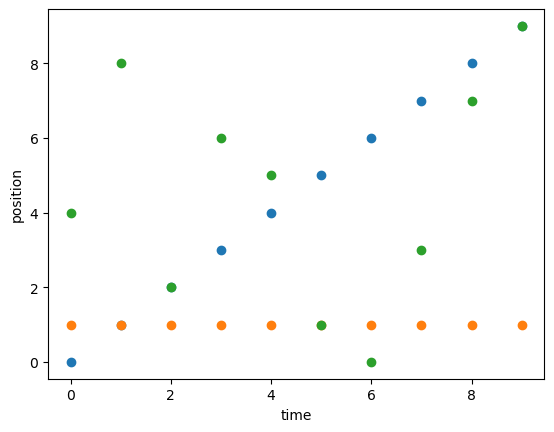

In [5]:
y = np.arange(10)
x = [1] * 10
t = np.arange(10)
plt.scatter(t, y)
plt.scatter(t, x)
plt.scatter(np.random.permutation(t), y)
plt.xlabel("time")
plt.ylabel("position")
plt.show()

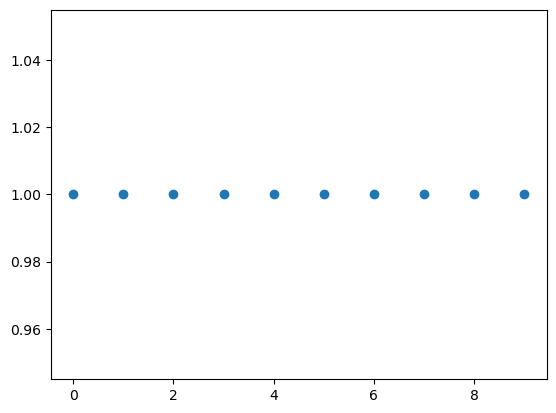

In [6]:
plt.scatter(np.random.permutation(t), x)

In [7]:
p_sum(1, 10) # probability that 1 or more items in a list of 10 is in order

0.6321208112874781

In [8]:
n = 100
x = list(range(n + 1))
y = [p(i, n) for i in x]

In [9]:
p_sum(0, 100) # probability that 0 or more items are in order

1.0000000000000002

In [10]:
p_sum(1, 100) # probability that 1 or more items are in order

0.6321205588285579

In [11]:
p(1, 100) # probability that 1 item is in order

0.36787944117144245

In [12]:
p(0, 100) # probability that 0 items are in order after permuting
p(1, 100) # probability that 1 items are in order after permuting
# I guess these are the same case

0.36787944117144245

In [13]:
p(2, 10)

0.18392857142857144

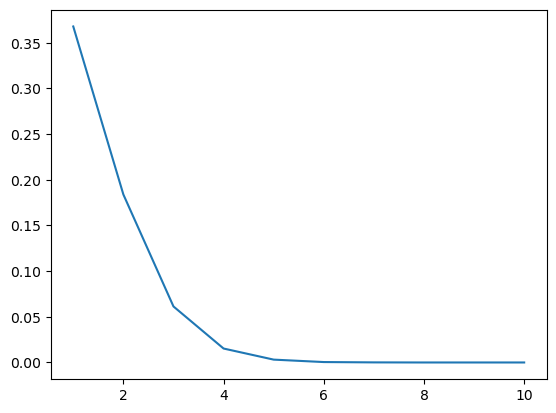

In [14]:
n = 10
x = list(range(1, n + 1))
y = [p(i, n) for i in x]

plt.plot(x, np.array(y))
# plt.xscale("log")
plt.show()

In [15]:
k = 10
n = 100
p_sum(k, n), (1 - p_sum(k, n))**1000

(1.114254783387207e-07, 0.9998885807230924)

In [16]:
p_sum(5, 100), (1 - p_sum(5, 100))**1000

(0.003659846827343714, 0.025564248352542986)

In [17]:
# https://iopscience.iop.org/article/10.3847/1538-4357/aa6335/pdf
# What is the probability that n or more points will appear in a SNR>=x catalog for a SNR=y object

In [18]:
from scipy.stats import binom
from scipy.special import erfc
from scipy.stats import norm

prob_noise = norm(loc=1.33, scale=0.835)

def prob_detect(obj_snr, thresh_snr):
    return 0.5 * erfc((thresh_snr - obj_snr)*(2**-0.5))

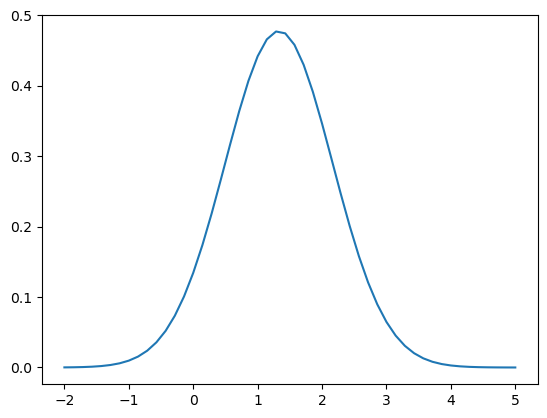

In [19]:
x = np.linspace(-2, 5)
plt.plot(x, prob_noise.pdf(x))
plt.show()

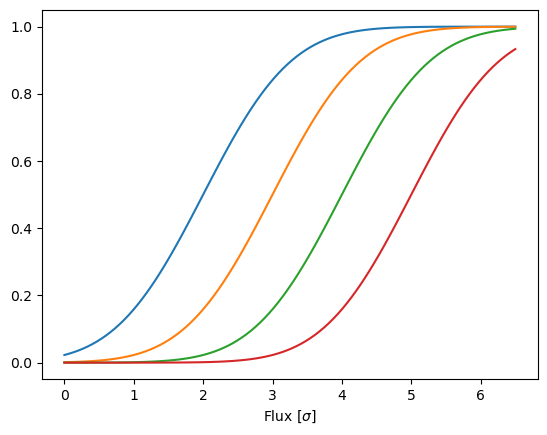

In [20]:
thresh = 3
f = np.linspace(0, 6.5, 100)
for thresh in [2, 3, 4, 5]:
    plt.plot(f, prob_detect(f, thresh))
plt.xlabel("Flux [$\sigma$]")
plt.show()

In [23]:
# binom.pmf(1, 10, p)

In [25]:
# binom(n,p).cdf(50)

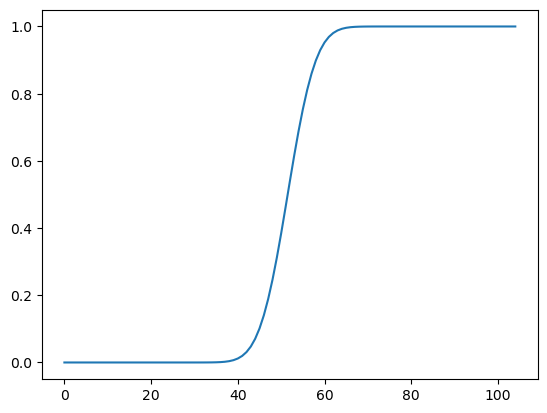

In [26]:
snr = 5
thresh = 5
n = 104
k = np.arange(n + 1)
p = prob_detect(snr, thresh)

plt.plot(k, binom(n,p).cdf(k))
plt.show()
# plt.plot(k, binom.pmf(k, n, p))
# plt.show()

In [27]:
# a SNR=

In [28]:
5/2*np.log10(2/5)

-0.994850021680094

In [29]:
p = prob_detect(2, 3)
k = 16
n = 104
binom(n, p).pmf(np.arange(k, n + 1)).sum()

0.5946044656432817

In [31]:
# prob_noise = 

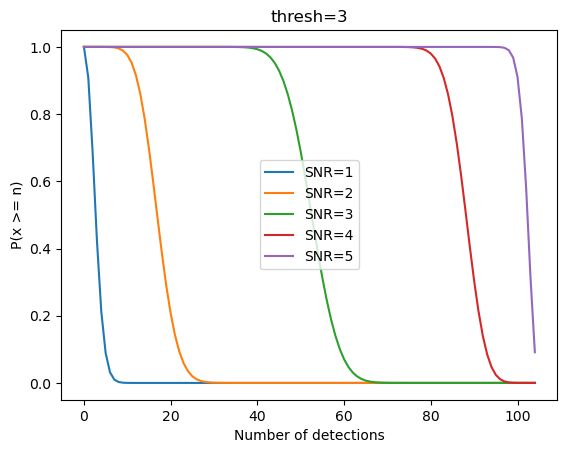

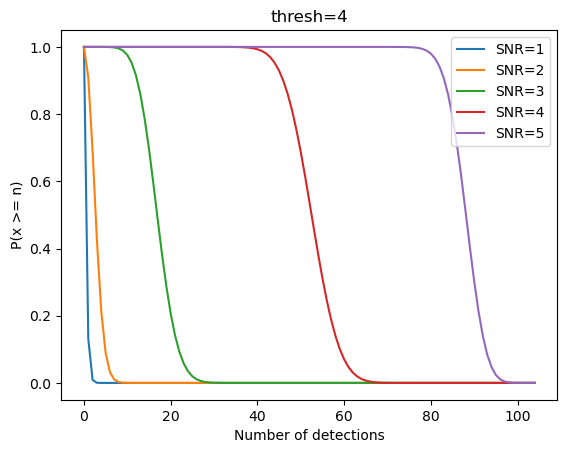

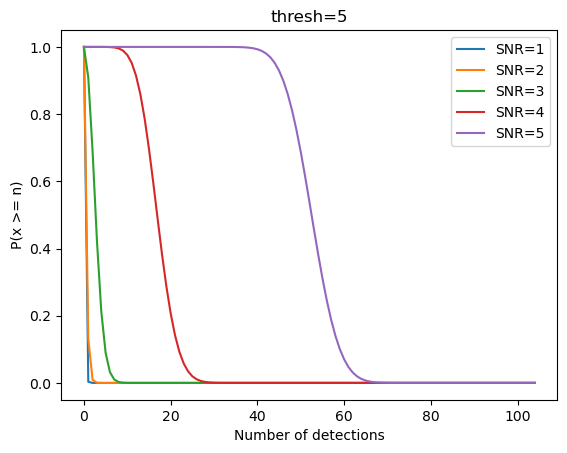

In [32]:
snr = 5
thresh = 5
n = 104
k = np.arange(n + 1)
x = np.arange(n + 1)
for thresh in [3, 4, 5]:
    for snr in [1, 2, 3, 4, 5]:
        p = prob_detect(snr, thresh)
        y = []
        for k in x:
            y.append(binom(n,p).pmf(np.arange(k, n + 1)).sum())

        plt.plot(x, y, label=f"SNR={snr}")#, ls={3: "-.", 4: ":", 5: "-"}.get(thresh), color=f"C{snr-3}")
    # plt.plot(x, 1 - binom(n, p).cdf(x))
    plt.title(f"thresh={thresh}")
    plt.xlabel("Number of detections")
    plt.ylabel("P(x >= n)")
    plt.legend()
    plt.show()

In [ ]:
# What is the probability that n or more points will appear within 1 arcsecond?

# n = 104
# p = prob_detect(snr, thresh)
# y = []
# for k in x:
#     y.append(binom(n,p).pmf(np.arange(k, n + 1)).sum())


NameError: name 'fwhm' is not defined

In [34]:
fwhm = 1 # arcsec
s = fwhm / 2.355

def prob_position(thresh_position, obj_snr):
    sigma_x = (2 * s**2 / snr**2)**0.5
    norm()

In [36]:
# 2 * norm(0, scale=0.30025765655479725).cdf(-1)

In [37]:
# https://iopscience.iop.org/article/10.3847/1538-3881/ab76ba/pdf
# we expect ~0.2 arcsec position errors with 1 arcsec seeing
print("fwhm =", fwhm, "arcsec")
print("s =", s, "arcsec")
print("snr", "sigma_x")
for snr in [100, 10, 5, 4, 3, 2, 1]:
    sigma_x = (2 * s**2 / snr**2)**0.5
    print(str(snr).ljust(3, " "), sigma_x)

fwhm = 1 arcsec
s = 0.42462845010615713 arcsec
snr sigma_x
100 0.006005153131095946
10  0.06005153131095945
5   0.1201030626219189
4   0.15012882827739862
3   0.2001717710365315
2   0.30025765655479725
1   0.6005153131095945


In [41]:
def prob_contain(snr, dx, fwhm=1):
    s = fwhm / 2.355 # arcsec

    sigma_x = (2 * s**2 / snr**2)**0.5
    x = np.vstack([np.zeros_like(np.atleast_1d(dx)), np.atleast_1d(dx)]).T
    mean = np.array([0, 0])
    cov = np.array(
        [
            [sigma_x**2, 0], 
            [0, sigma_x**2]
        ]
    )
    md = (mean - x) @ np.linalg.inv(cov) @ (mean - x).T # mahalanobis distance
    return chi2(2).cdf(np.diag(md))

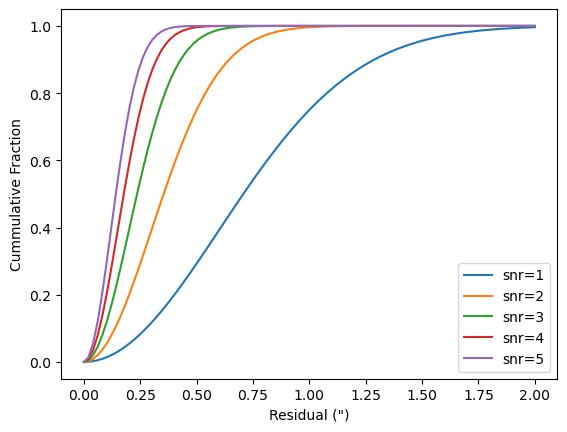

In [44]:
dx = np.linspace(0, 2, 100)

for snr in [1, 2, 3, 4, 5]:
    plt.plot(dx, prob_contain(snr, dx), label=f"snr={snr}")

plt.ylabel("Cummulative Fraction")
plt.xlabel("Residual (\")")
plt.legend()
plt.show()

In [204]:
binom(n, p).pmf(104)

array([1.])

In [210]:
binom(15, prob_contain(2, 1)).pmf(15)

array([0.94302861])

In [228]:
# can I verify this with a real detection?
# as a function of dx how many detections are within the line?
# let me look at a recovered fake

In [229]:
# this should also let me limit the expected RMS scatter...
# or place a distribution on the values of the RMS scatter 
# My variable is the brightness of the object
# That tunes the number of times it appears in the detection catalog
# And that also tunes the number of times it appears within a distance of the line
# And that also tunes the expected RMS scatter which is a filter I can use

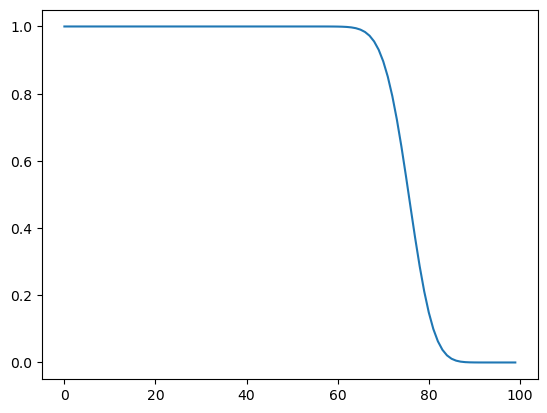

In [46]:
snr = 1
dx = 1
n = 100
x = np.arange(n)
y = []
for k in x:
    p = prob_contain(snr, dx)
    y.append(binom(n, p).pmf(np.arange(k, n + 1)).sum())
    
plt.plot(x, y)
plt.show()

In [ ]:
# I should plot SNR vs astrometric scatter of inlier points for real objects vs fake objects
# and use that as the final discriminator

In [388]:
from salad.serialize import read
from salad.cluster.join import join
from salad.analysis.plot import plot_cluster, plot_result
from salad.gather import gather
from salad.refine import refine
from pathlib import Path
import astropy.units as u

In [254]:


catalog = read(
    Path(
        "../search/single_search/DEEP/20190403/A0c/detector_1/snr_3.0/catalog.pkl"
    )
)

clusters = read(
    Path(
        "../search/single_search/DEEP/20190403/A0c/detector_1/snr_3.0/unshuffled/single_search/filtered.pkl"
    )
)

images = read("../search/single_search/DEEP/20190403/A0c/detector_1/images.pkl")

In [245]:
len(clusters)

25

In [282]:
cluster.extra['result'].outliers_r.shape

(93,)

In [283]:
cluster.points.shape

(94, 4)

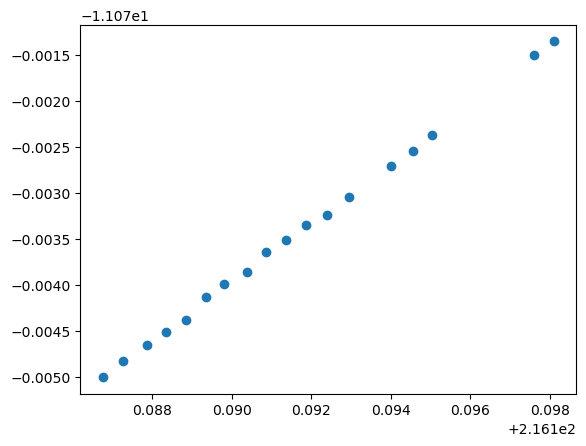

(18, 4)


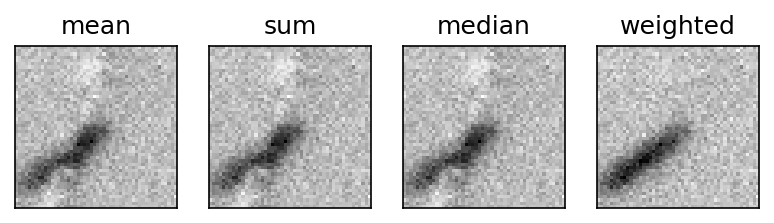

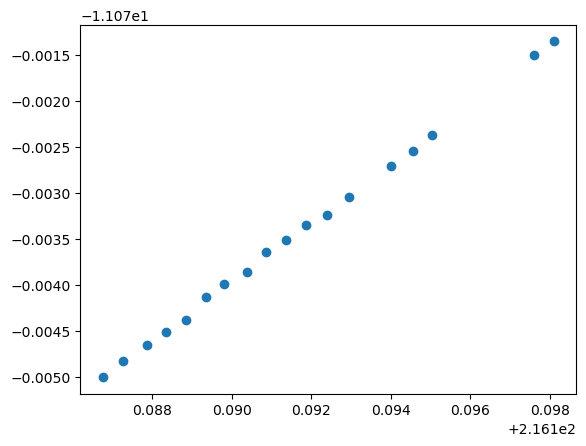

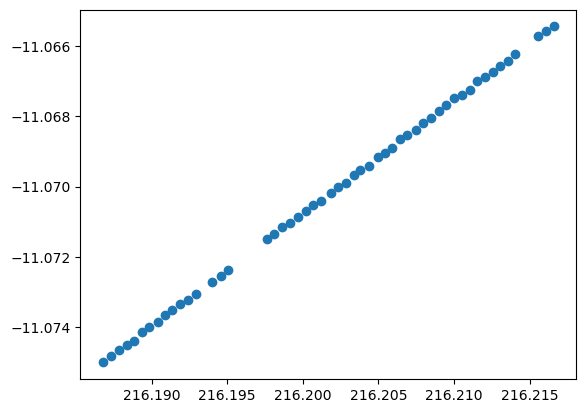

In [401]:
from salad.cluster import Cluster
cluster = clusters[19]
print(cluster.points.shape)
plot_summary_coadds(cluster.summary)
plt.show()
plot_cluster(cluster)
plt.show()
X = catalog.X()
joined = join(cluster, catalog)
pred = cluster.line.predict(joined['time'] * u.day)
result = regression(cluster.points[:, 2][:, None], cluster.points[:, :2])
result.alpha *= u.deg
result.beta *= u.deg/u.day

new = Cluster(
    points=X[gather(result, X[:, 0]*u.deg, X[:, 1]*u.deg, X[:, 2]*u.day, 1*u.arcsec)]
)
plot_cluster(new)
plt.show()

(25, 4)


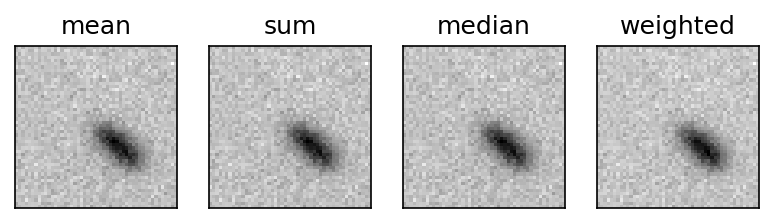

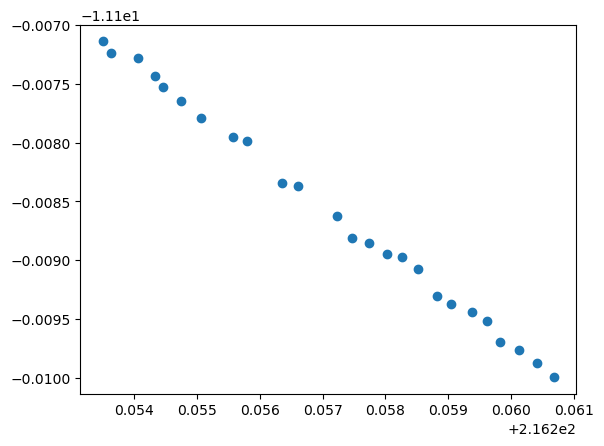

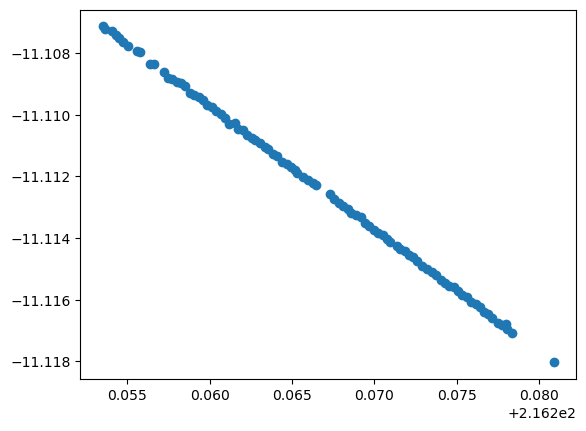

In [404]:
from salad.cluster import Cluster
cluster = clusters[24]
print(cluster.points.shape)
plot_summary_coadds(cluster.summary)
plt.show()
plot_cluster(cluster)
plt.show()
X = catalog.X()
joined = join(cluster, catalog)
pred = cluster.line.predict(joined['time'] * u.day)
# result = regression(cluster.points[:, 2][:, None], cluster.points[:, :2])
result = refine(cluster)['result']
result.alpha *= u.deg
result.beta *= u.deg/u.day

new = Cluster(
    points=X[gather(result, X[:, 0]*u.deg, X[:, 1]*u.deg, X[:, 2]*u.day, 1*u.arcsec)]
)
plot_cluster(new)
plt.show()

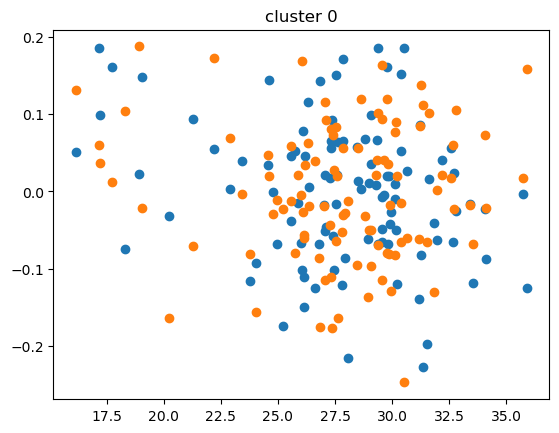

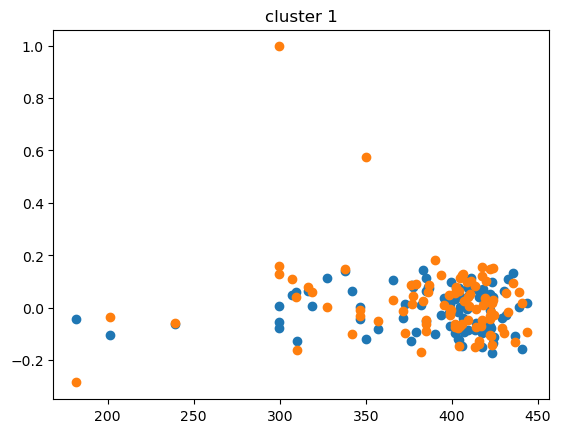

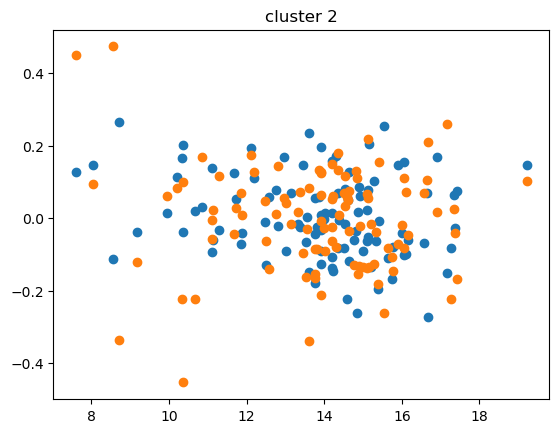

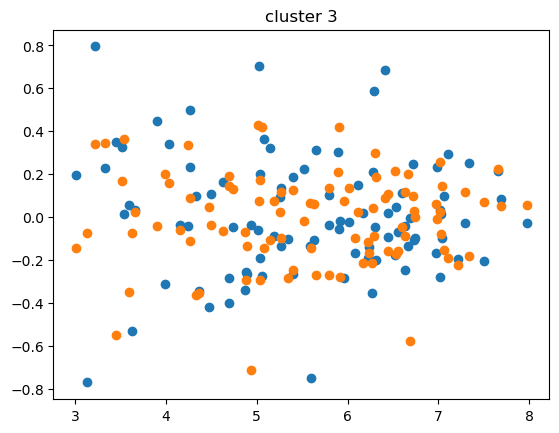

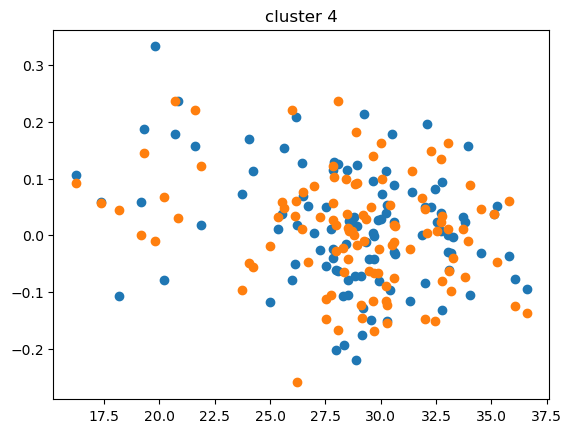

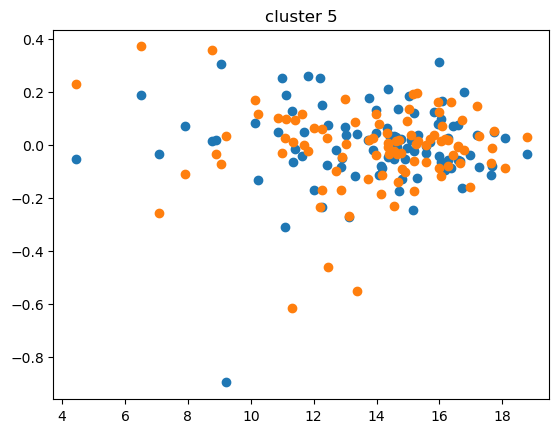

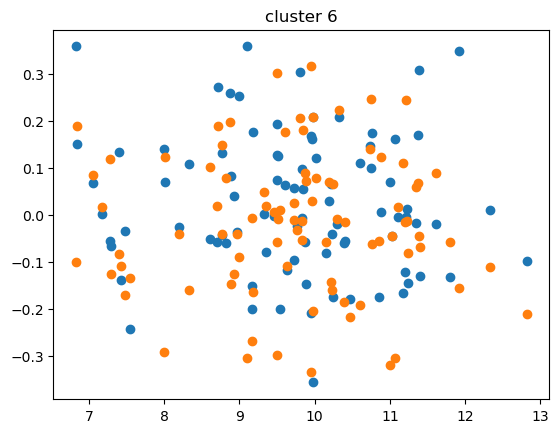

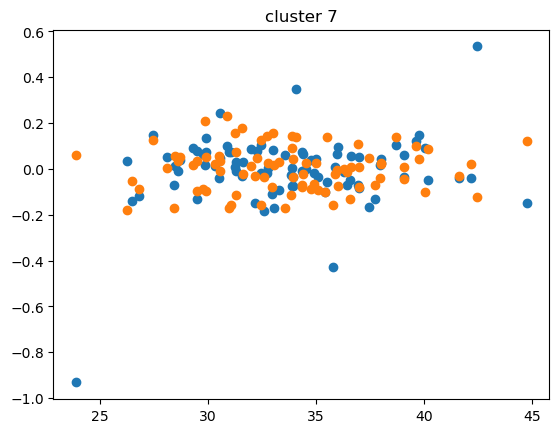

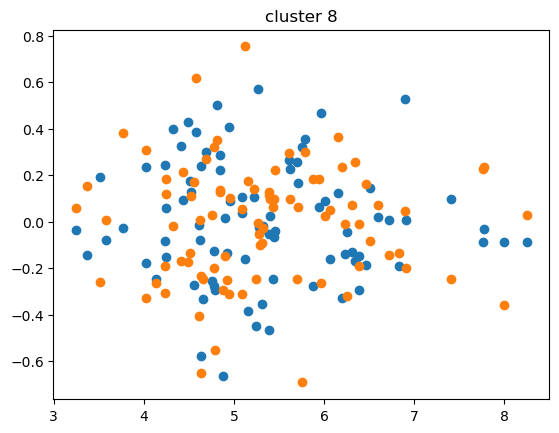

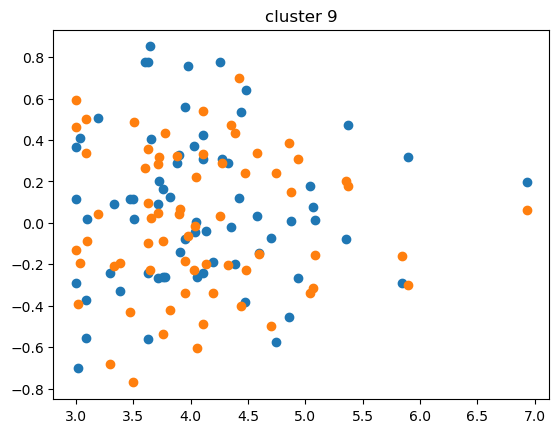

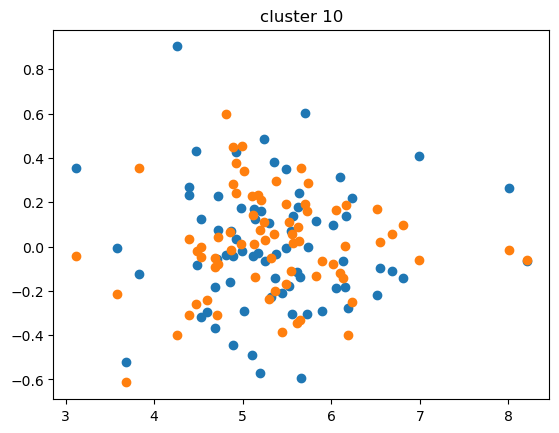

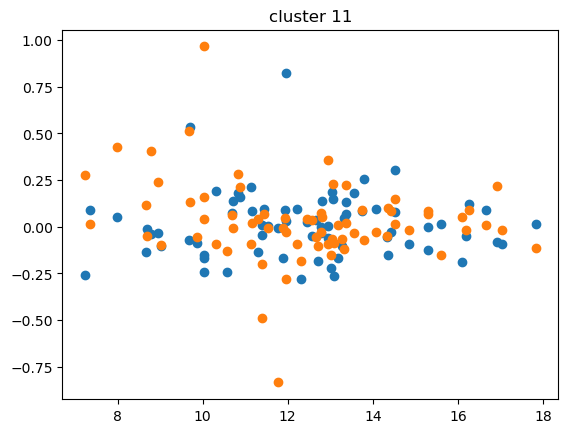

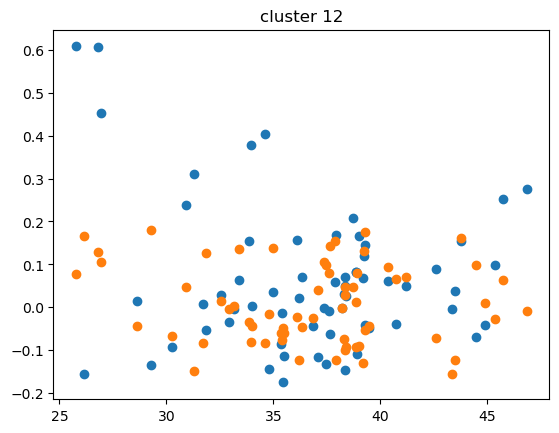

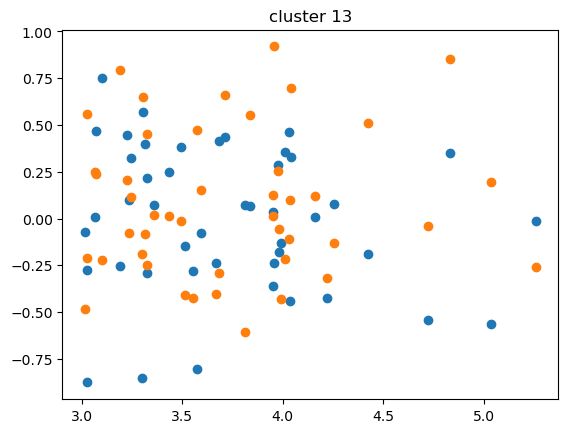

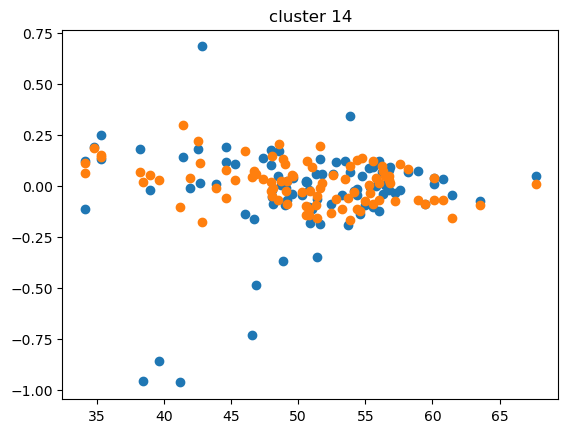

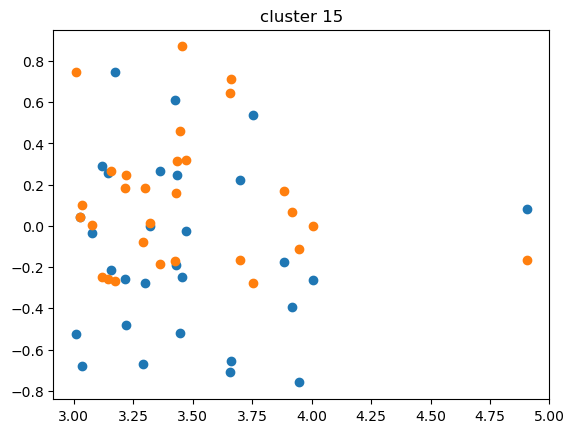

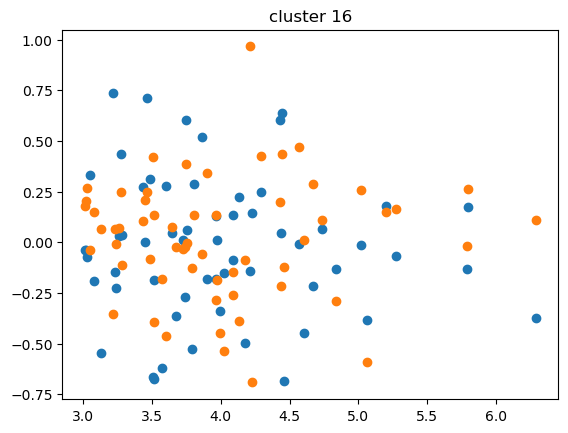

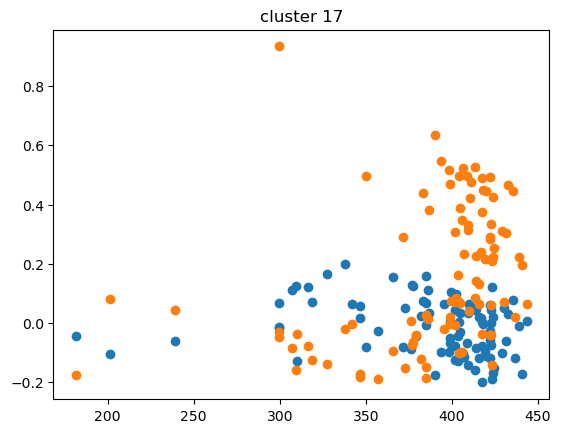

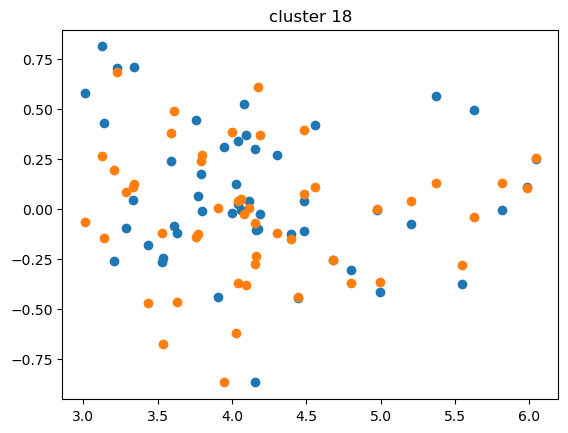

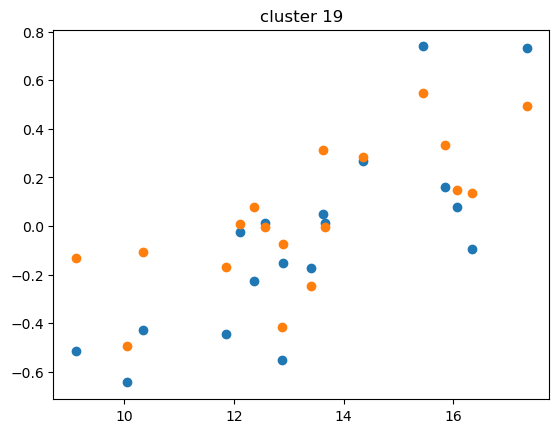

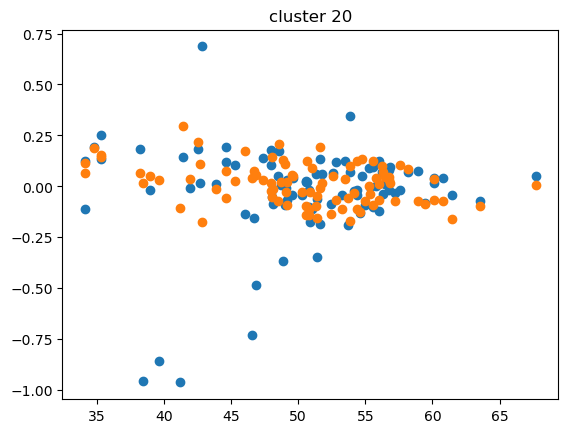

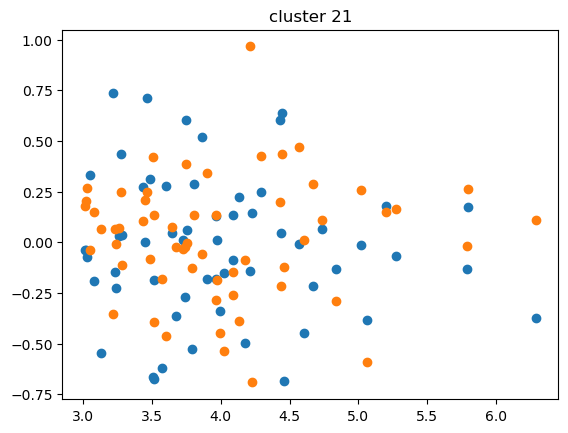

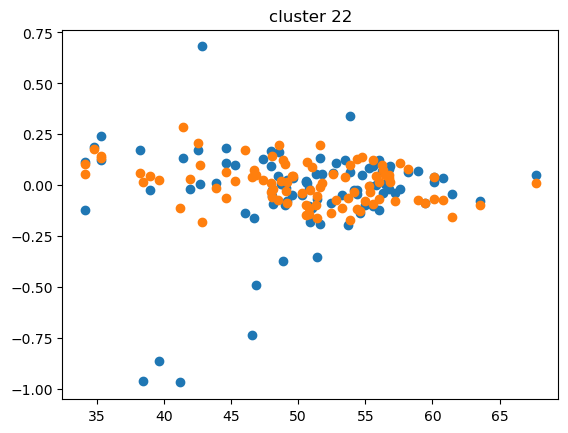

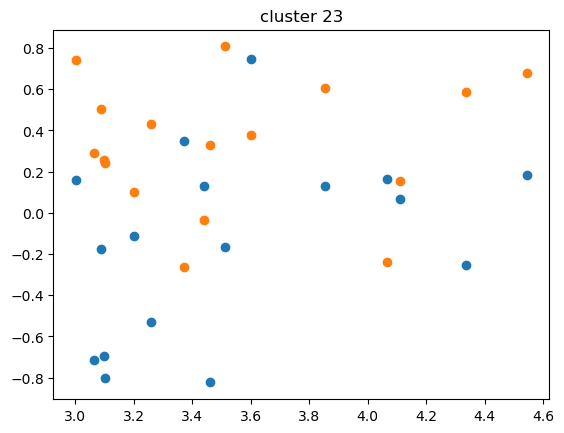

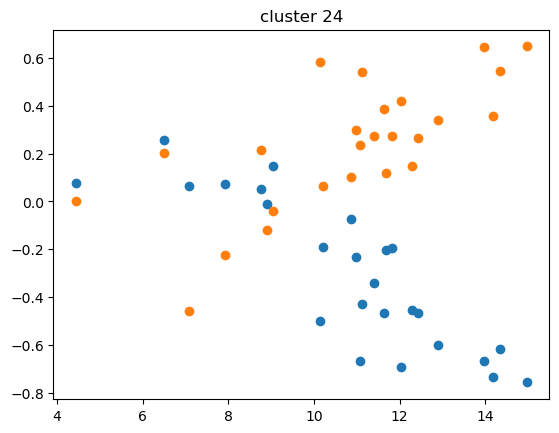

In [385]:
for i, cluster in enumerate(clusters):

    joined = join(cluster, catalog)
    pred = cluster.line.predict(joined['time'] * u.day)
    result = regression(cluster.points[:, 2][:, None], cluster.points[:, :2])
    result.alpha *= u.deg
    result.beta *= u.deg/u.day

    dra = joined['ra']*u.deg - pred[:, 0]
    ddec = joined['dec']*u.deg - pred[:, 1]

    plt.title(f"cluster {i}")
    plt.scatter(joined['significance'], ddec.to(u.arcsec))
    plt.scatter(joined['significance'], dra.to(u.arcsec))
    plt.show()

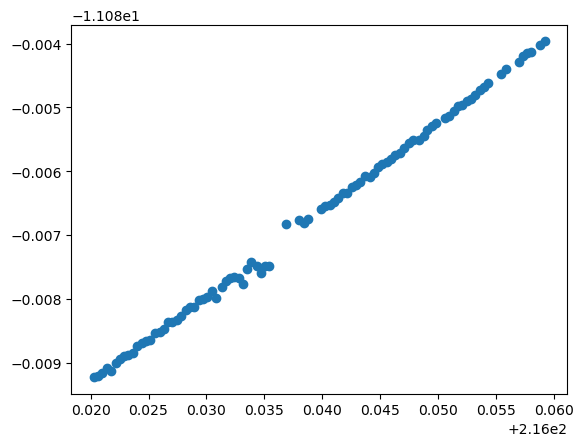

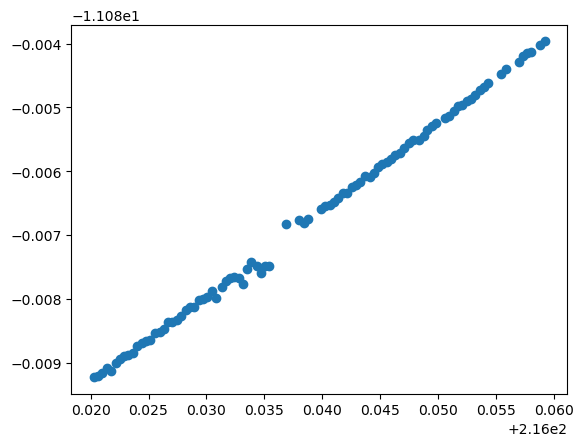

In [387]:
cluster = clusters[20]
plot_cluster(cluster)
plt.show()
cluster = clusters[22]
plot_cluster(cluster)

(102, 2) (102,)


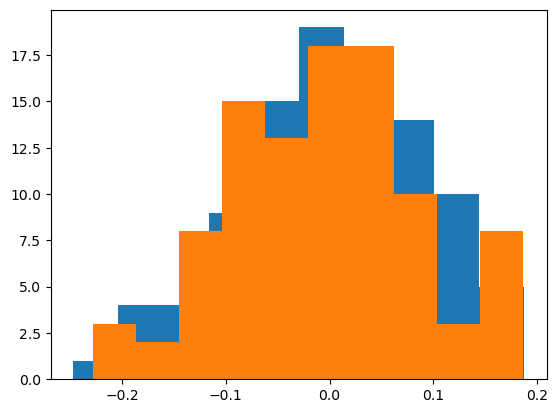

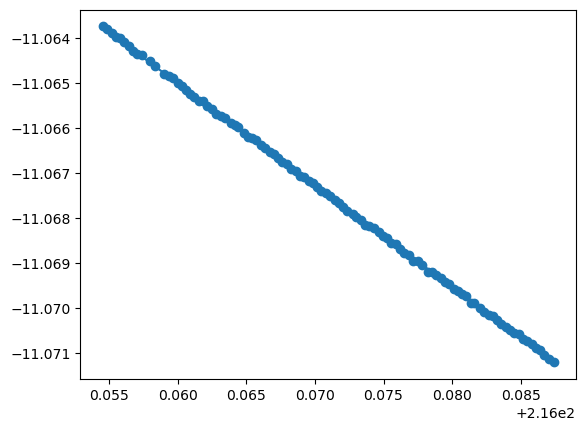

(94, 2) (94,)


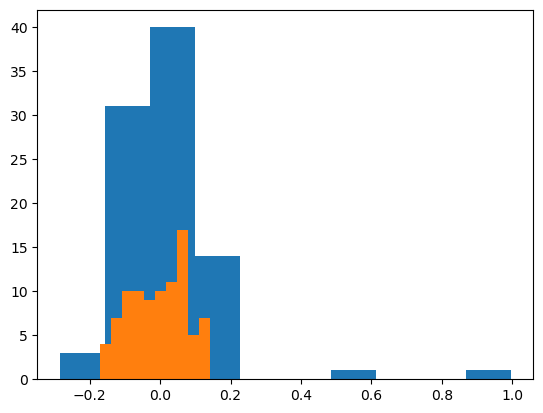

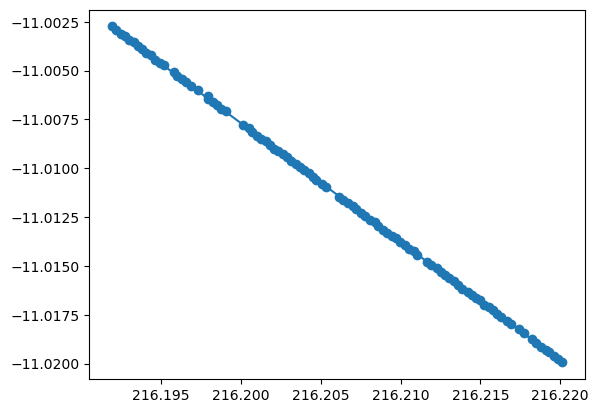

(102, 2) (102,)


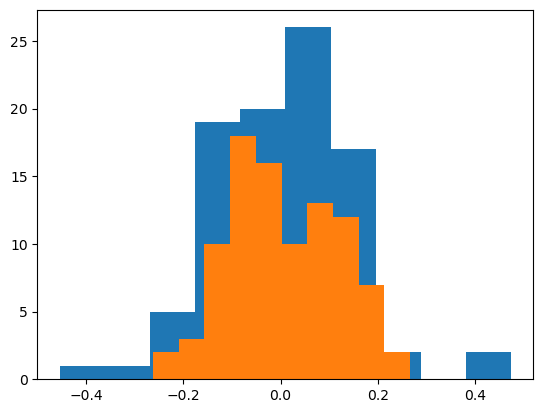

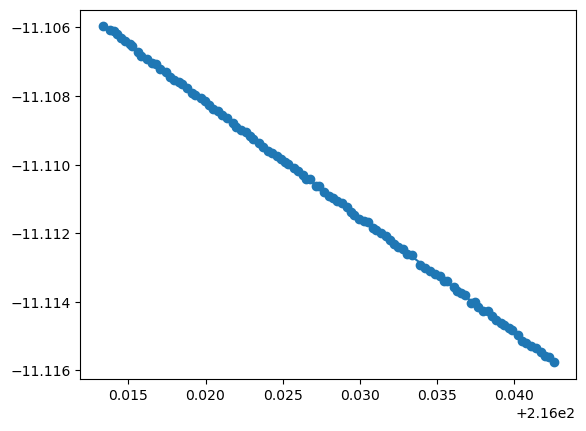

(94, 2) (94,)


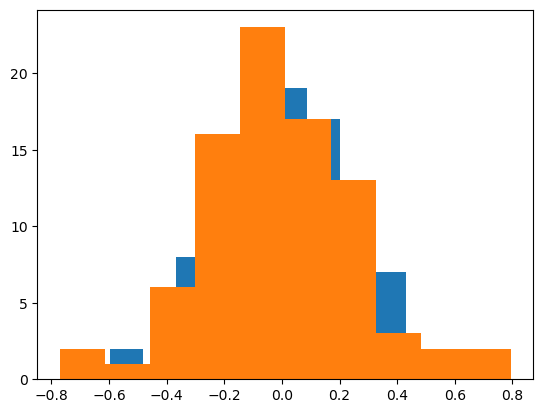

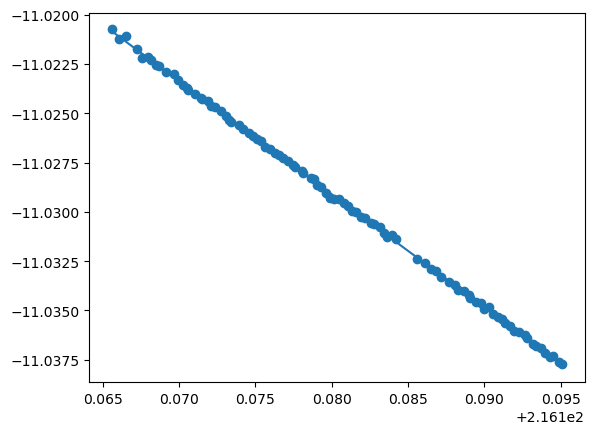

(104, 2) (104,)


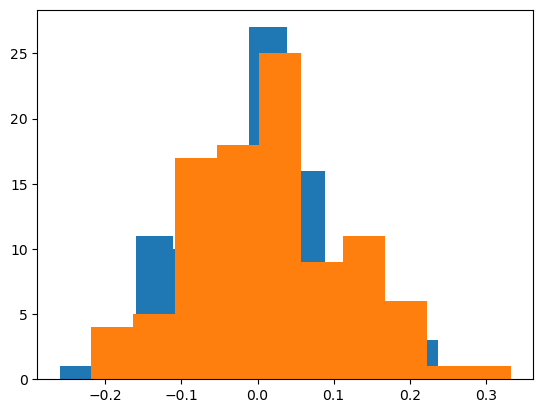

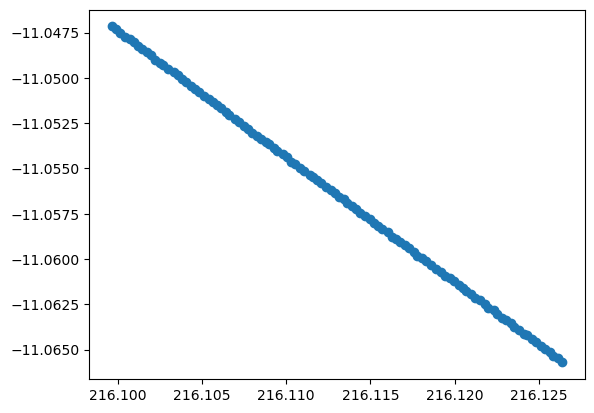

(92, 2) (92,)


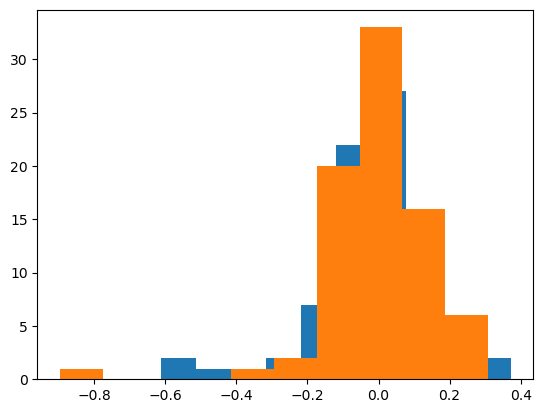

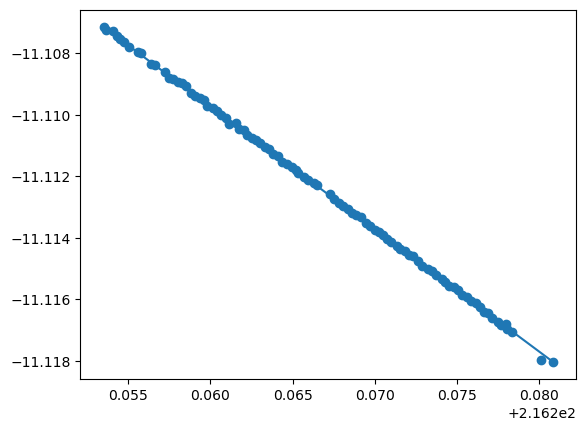

(88, 2) (88,)


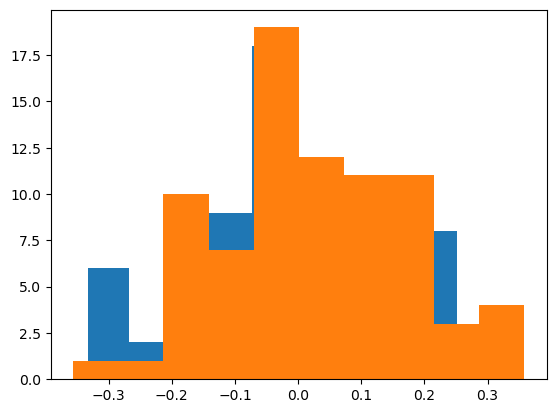

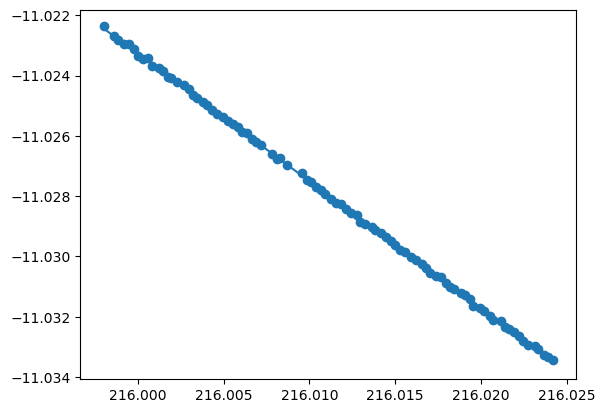

(85, 2) (85,)


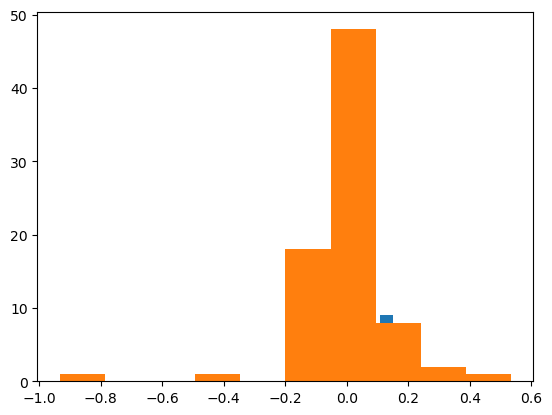

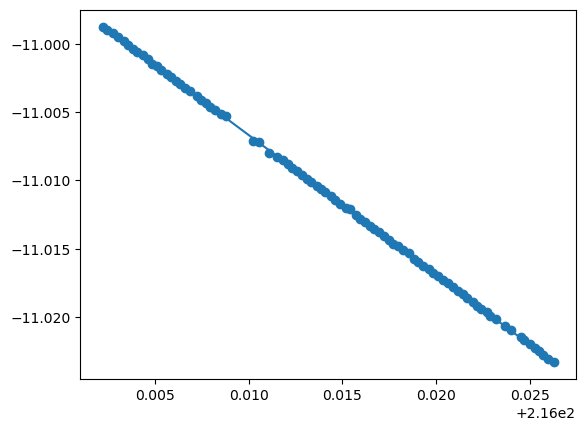

(86, 2) (86,)


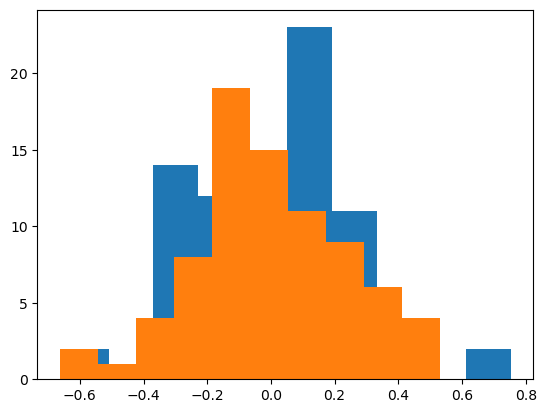

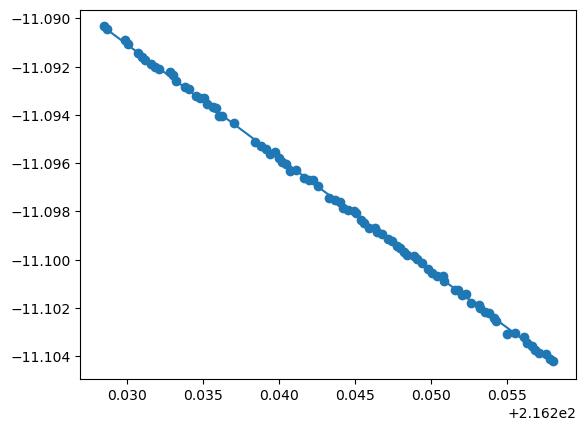

(67, 2) (67,)


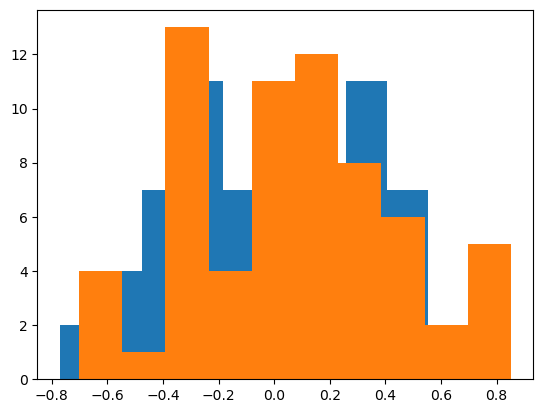

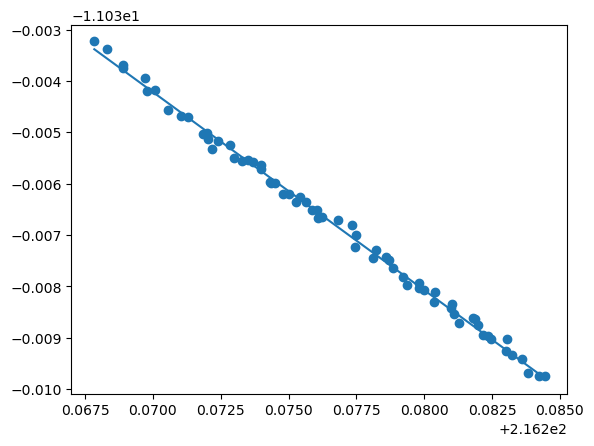

(73, 2) (73,)


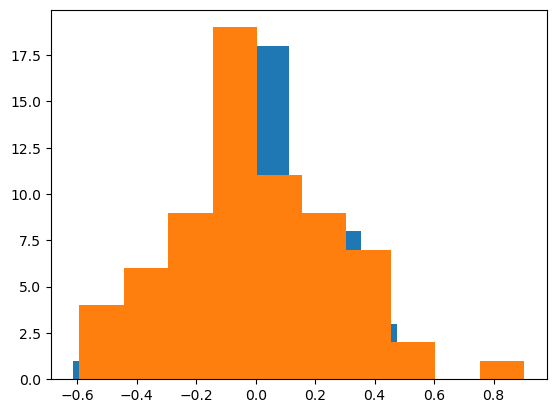

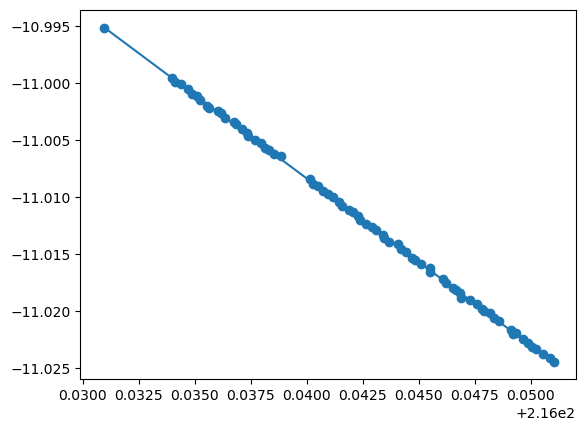

(72, 2) (72,)


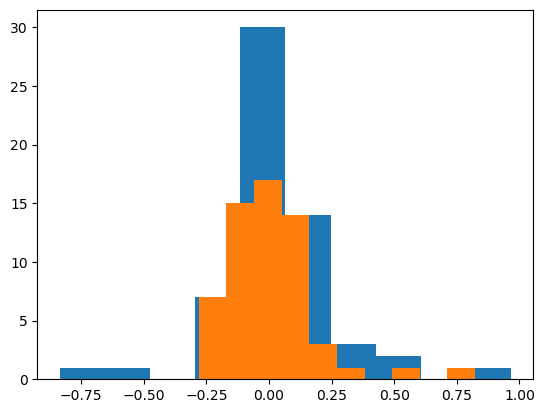

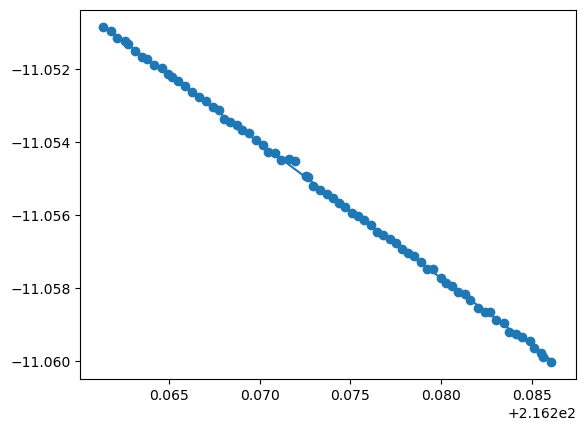

(64, 2) (64,)


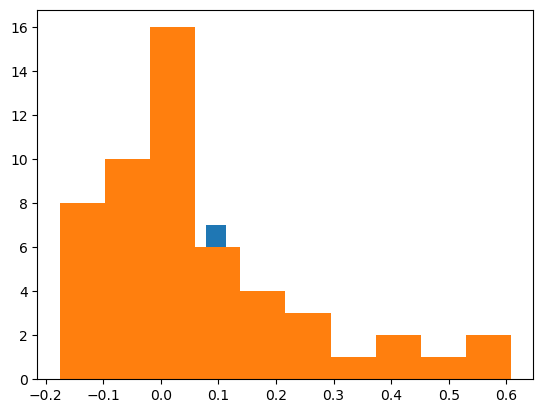

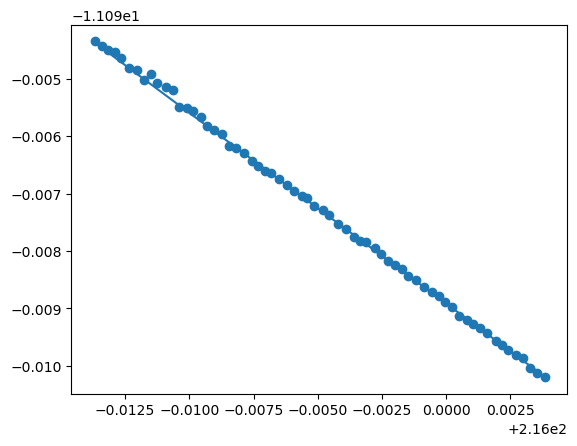

(45, 2) (45,)


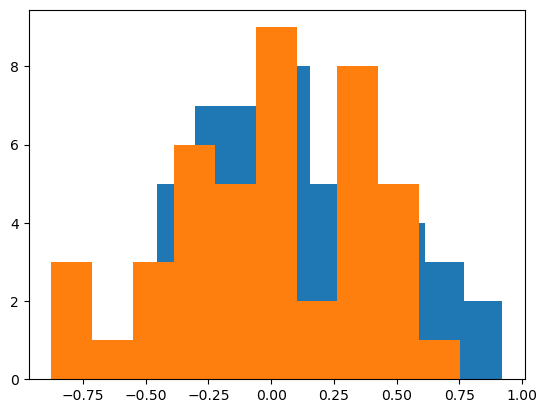

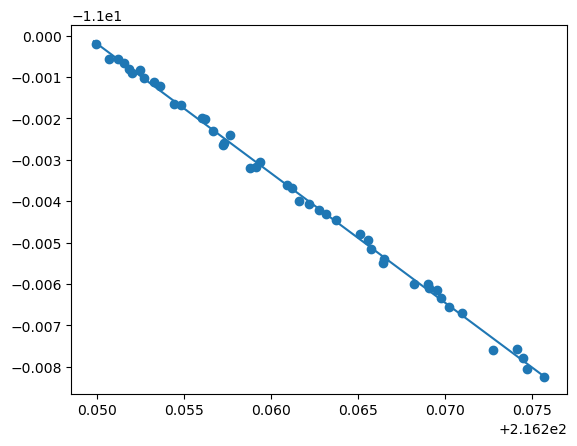

(91, 2) (91,)


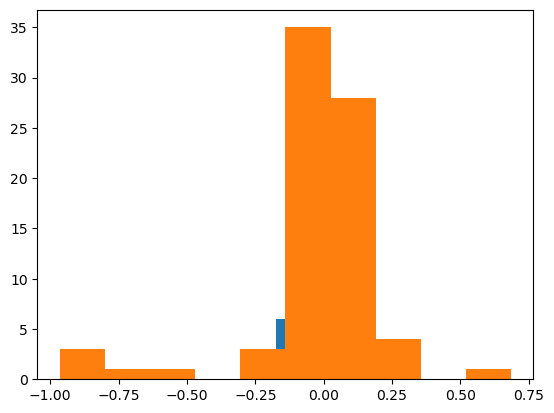

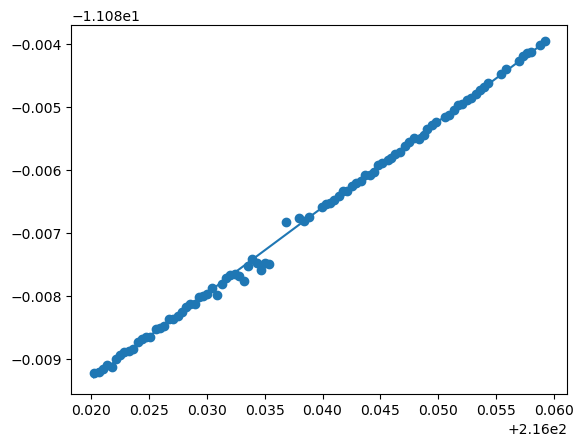

(29, 2) (29,)


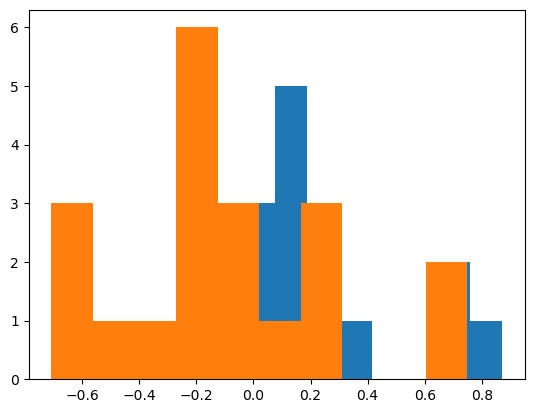

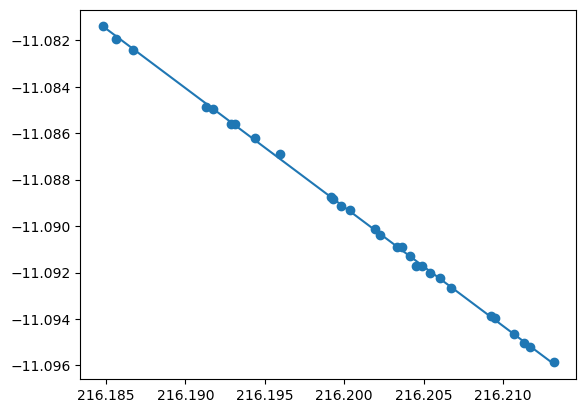

(59, 2) (59,)


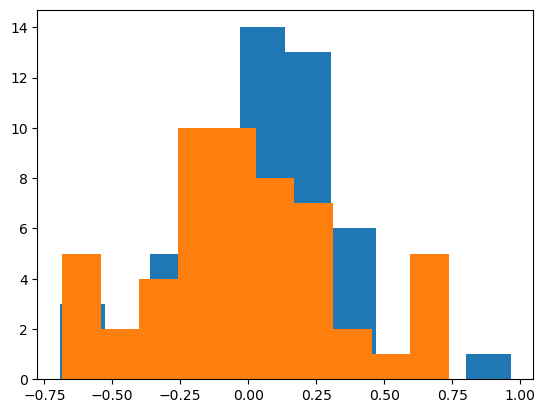

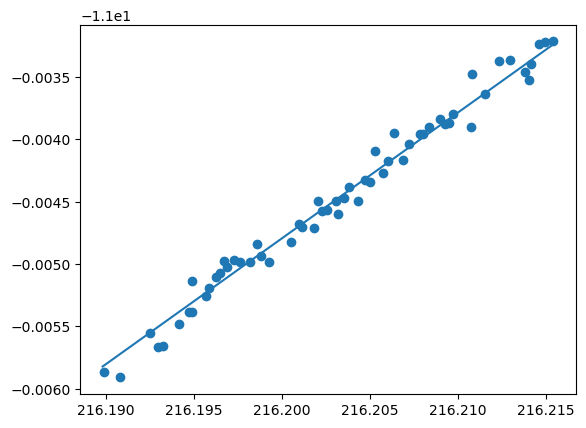

(94, 2) (94,)


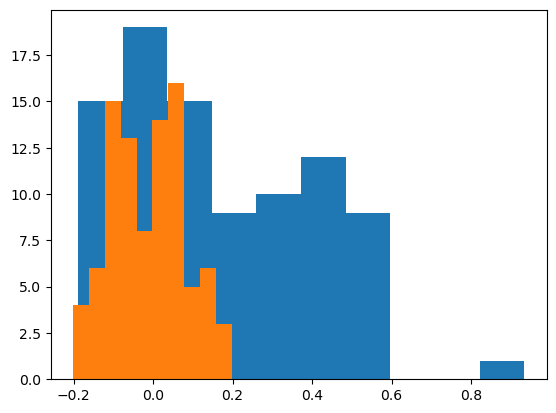

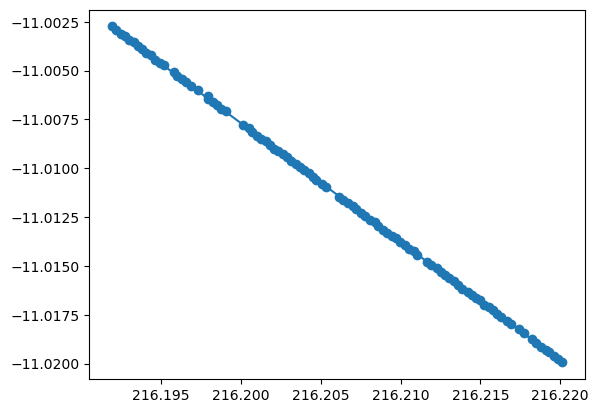

(50, 2) (50,)


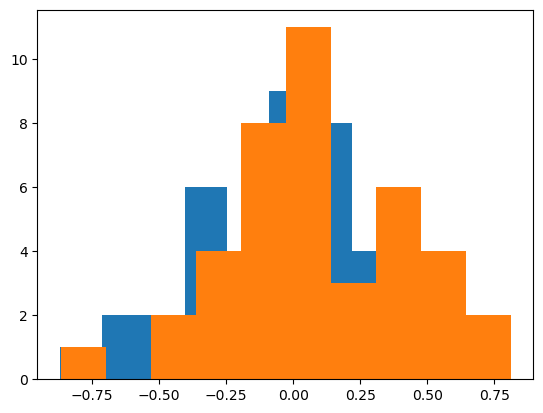

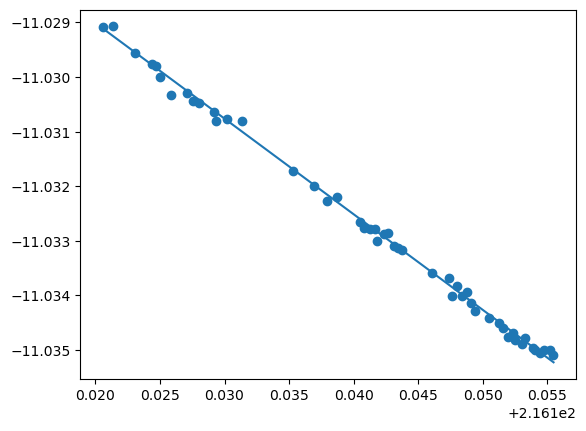

(18, 2) (18,)


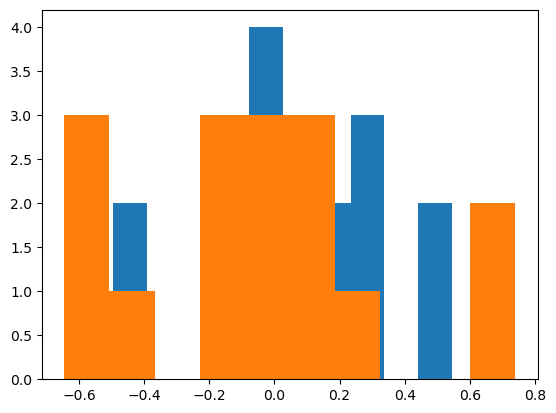

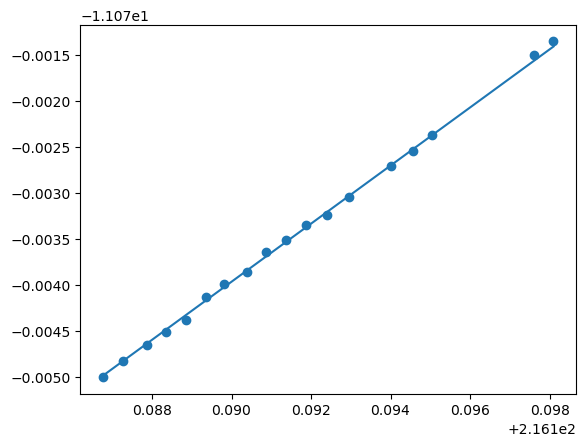

(91, 2) (91,)


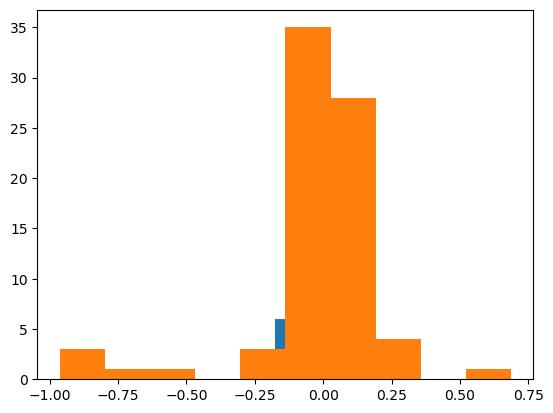

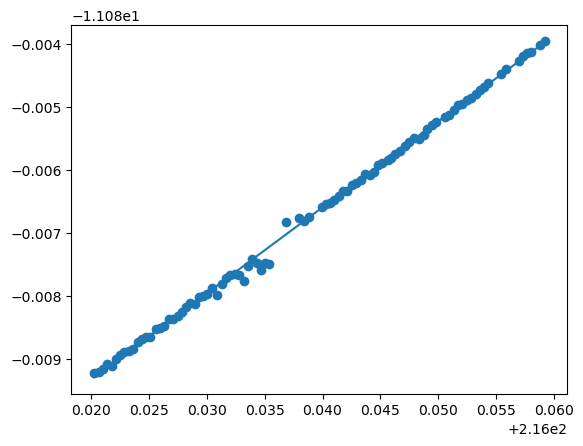

(59, 2) (59,)


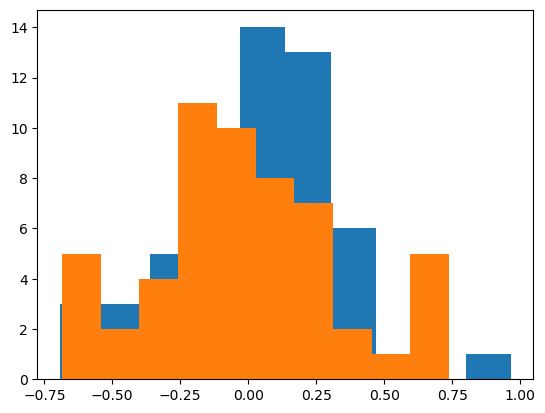

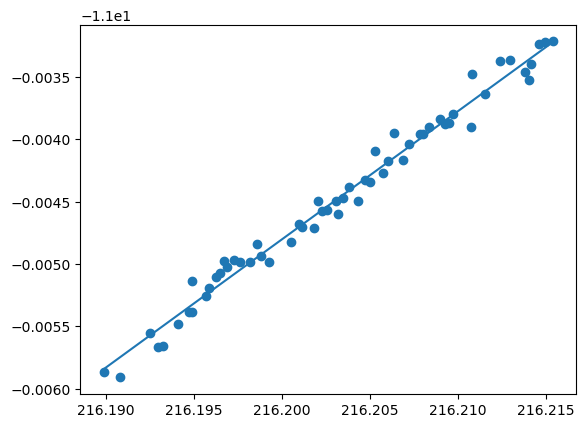

(91, 2) (91,)


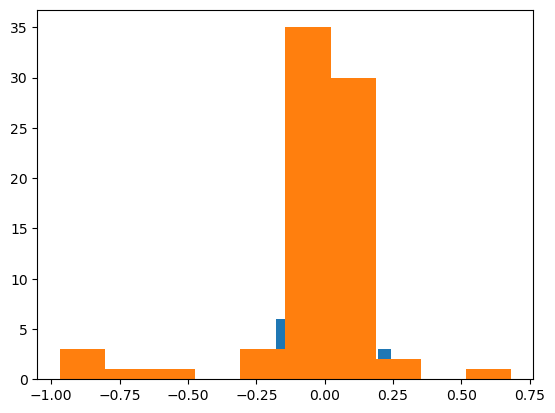

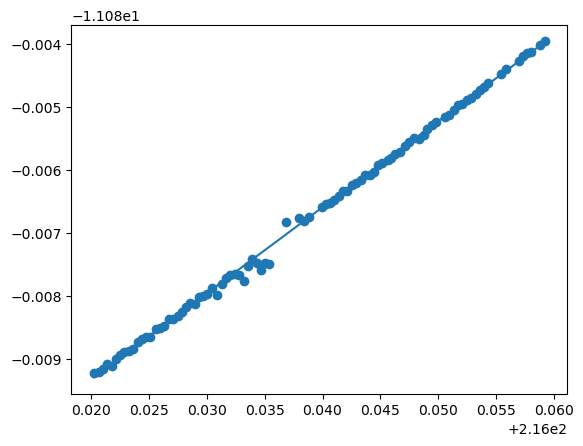

(17, 2) (17,)


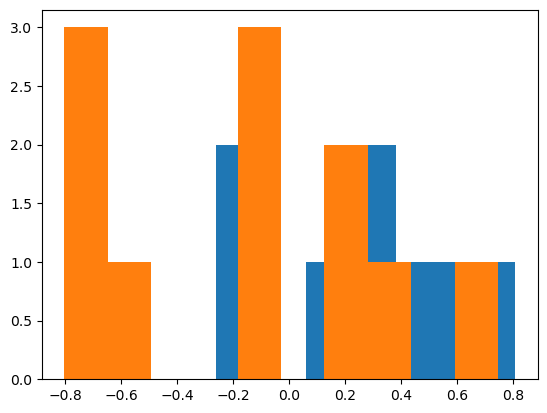

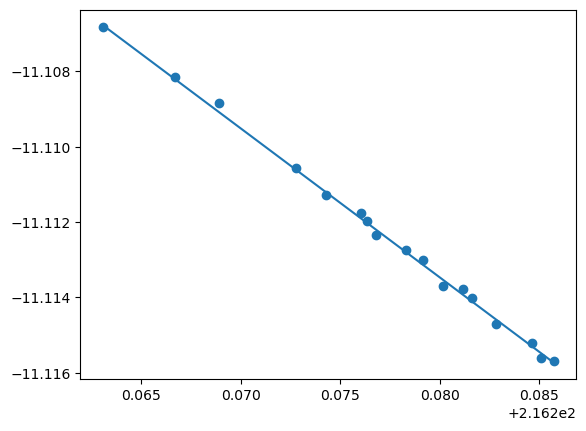

(25, 2) (25,)


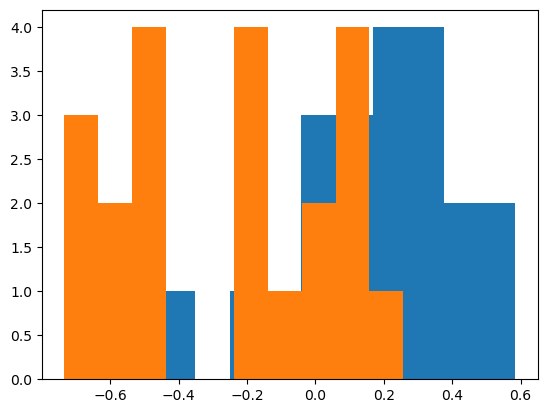

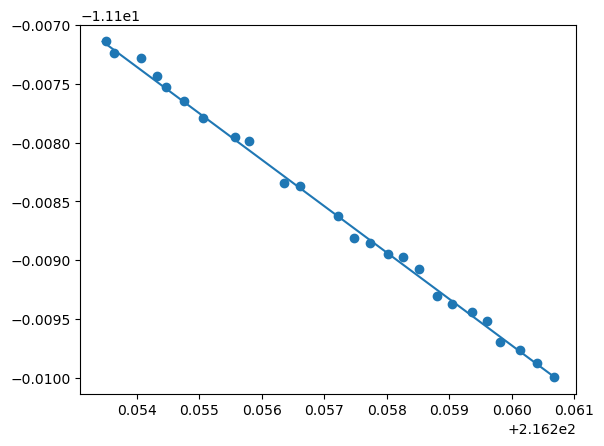

In [323]:

for i, cluster in enumerate(clusters):
# cluster = clusters[-3]
    joined = join(cluster, catalog)
    pred = cluster.line.predict(joined['time'] * u.day)
#     result = refine(cluster)['result']
    result = regression(cluster.points[:, 2][:, None], cluster.points[:, :2])
    result.alpha *= u.deg
    result.beta *= u.deg/u.day
    mask = ~result.outliers_r
    print(pred.shape, mask.shape)
    dra = joined['ra']*u.deg - pred[:, 0]
    ddec = joined['dec']*u.deg - pred[:, 1]
    fig = plt.figure()
    plt.hist(dra[mask].to(u.arcsec))
    plt.hist(ddec[mask].to(u.arcsec))
    plt.show()
    
    fig = plt.figure()
    plot_cluster(cluster)
    plot_result(result, joined['time'])
    plt.show()

In [329]:
def plot_summary_coadds(s):
    fig = plt.figure(dpi=150)
    axs = fig.subplots(1, 4)
    plt.sca(axs[0])
    plt.imshow(s['coadd']['mean'], cmap='gray_r')
    plt.title("mean")
    plt.xticks([])
    plt.yticks([])

    plt.sca(axs[1])
    plt.imshow(s['coadd']['sum'], cmap='gray_r')
    plt.title("sum")
    plt.xticks([])
    plt.yticks([])

    plt.sca(axs[2])
    plt.imshow(s['coadd']['median'], cmap='gray_r')
    plt.title("median")
    plt.xticks([])
    plt.yticks([])

    plt.sca(axs[3])
    plt.imshow(s['coadd']['weighted'], cmap='gray_r')
    plt.title("weighted")
    plt.xticks([])
    plt.yticks([])

    return fig

def plot_summary_light_curve(s):
    fig = plt.figure(dpi=150)
    axs = fig.subplots(3, 1, sharex=True)
    plt.sca(axs[0])
    plt.errorbar(
        np.arange(len(s['light_curve']['flux'])), 
        s['light_curve']['flux'], 
        yerr=s['light_curve']['sigma'],
        fmt='o',
    #     c=s['light_curve']['mask'],
        ms=2,
        lw=1,
    )
    plt.title("Flux (zp=31)")
    plt.sca(axs[1])
    plt.scatter(
        np.arange(len(s['light_curve']['flux'])), 
        s['light_curve']['mag'],
        c=s['light_curve']['mask'] != 0,
        s=2
    )
    plt.title("Mag")
    plt.sca(axs[2])
    plt.scatter(
        np.arange(len(s['light_curve']['flux'])), 
        s['light_curve']['snr'],
        c=s['light_curve']['mask'] != 0,
        s=2
    )
    plt.title("SNR")
    return fig



0


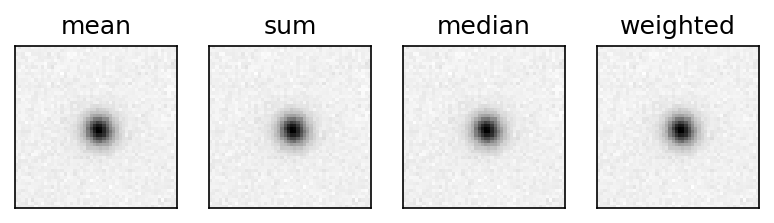

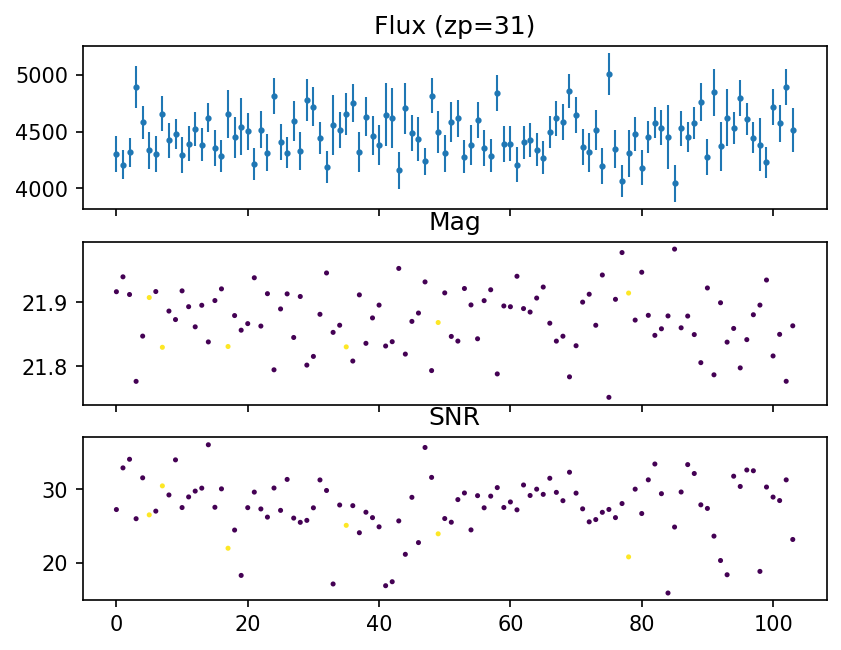

1


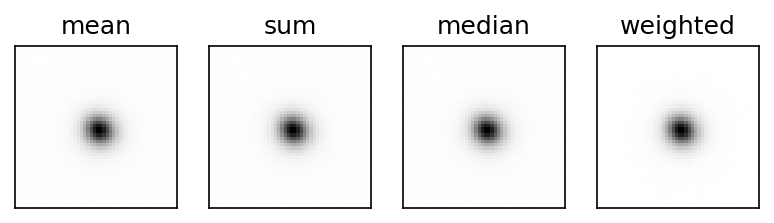

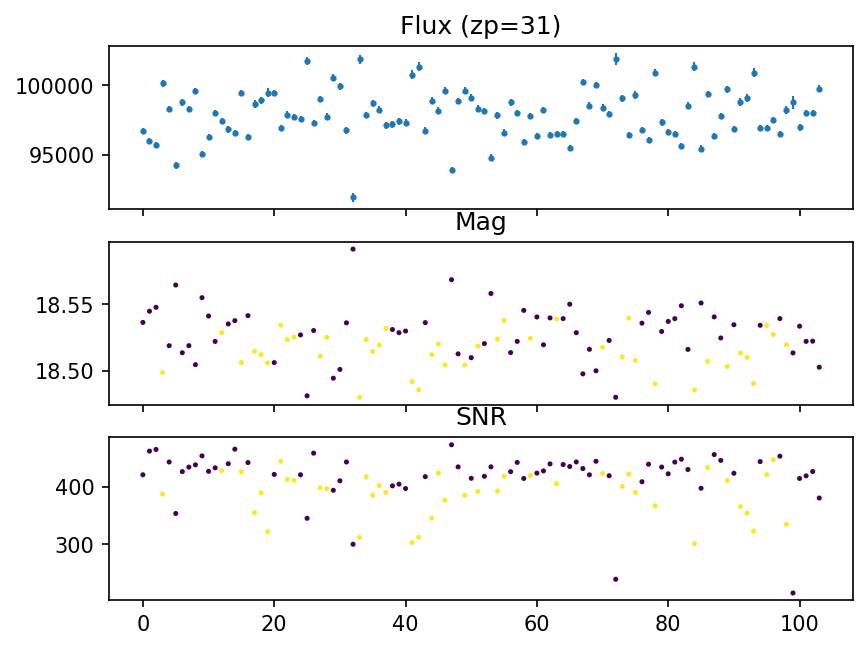

2


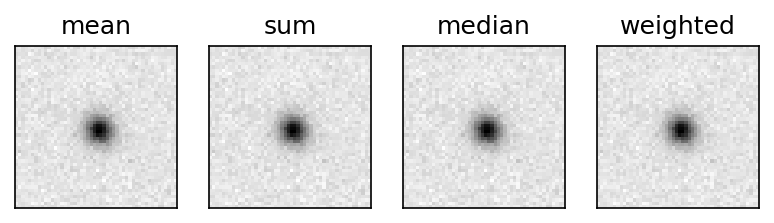

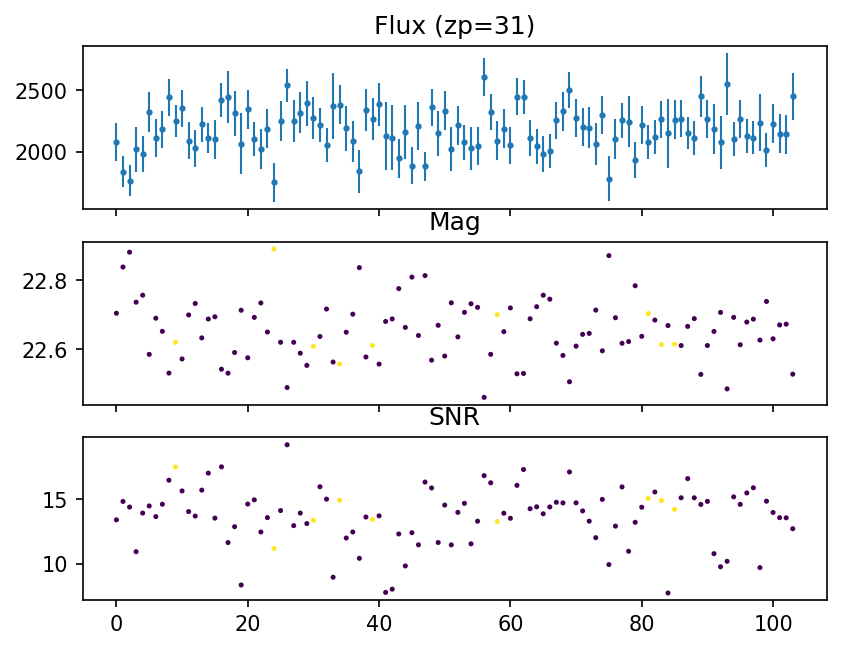

3


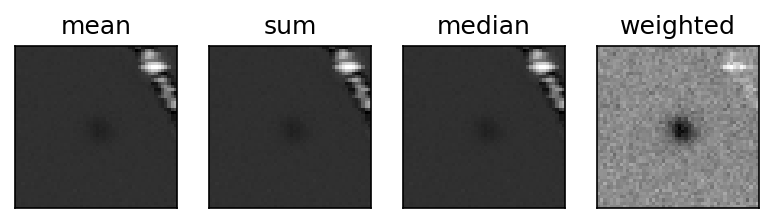

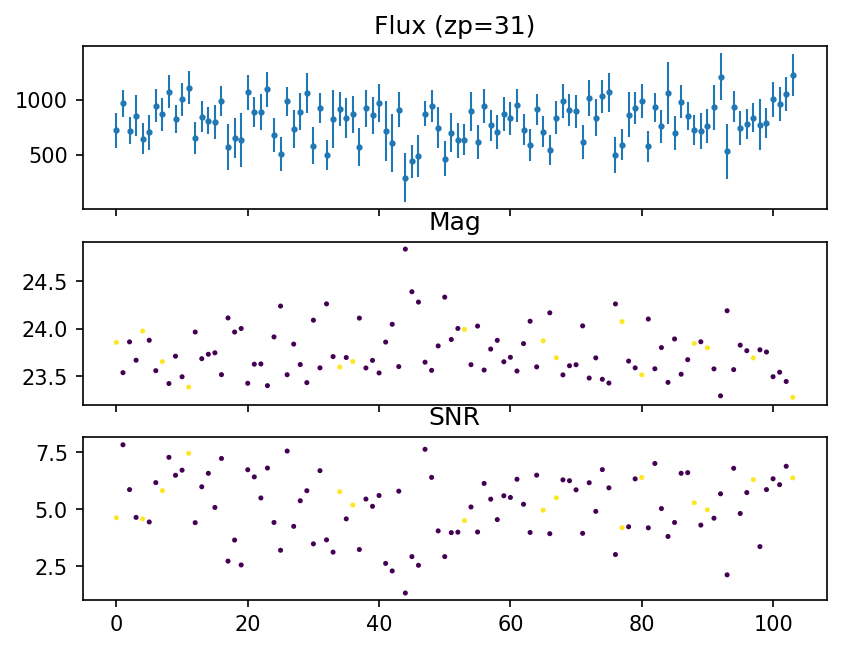

4


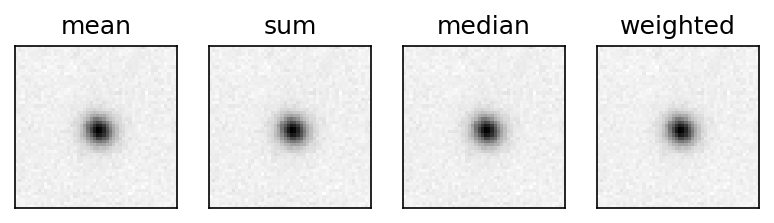

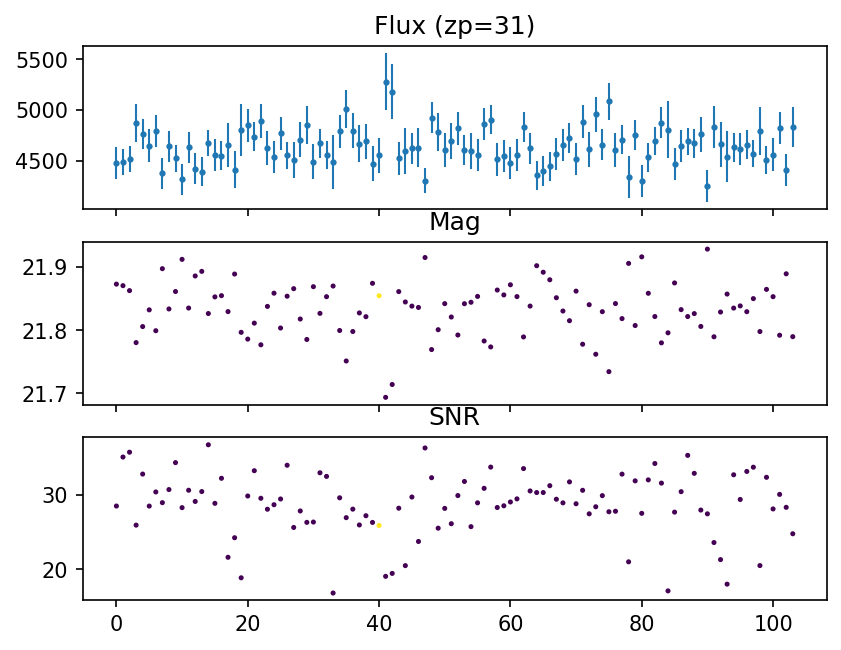

5


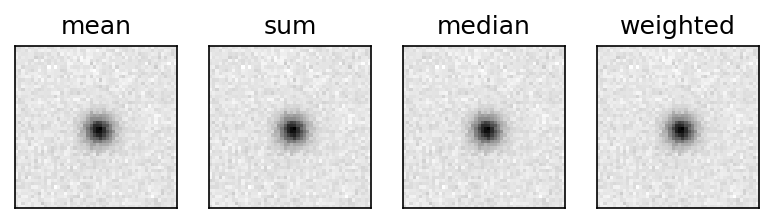

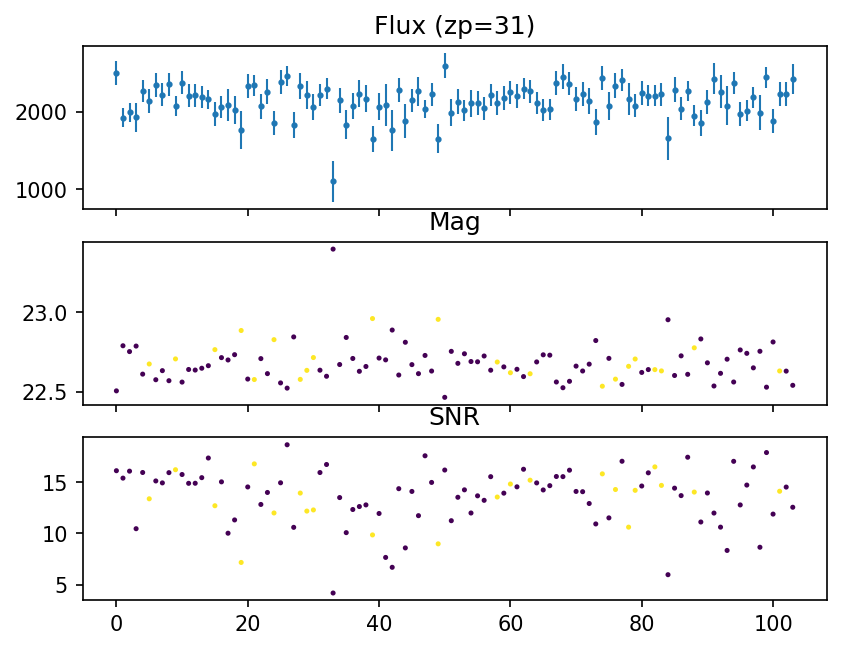

6


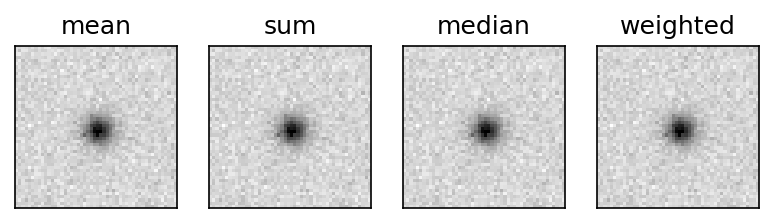

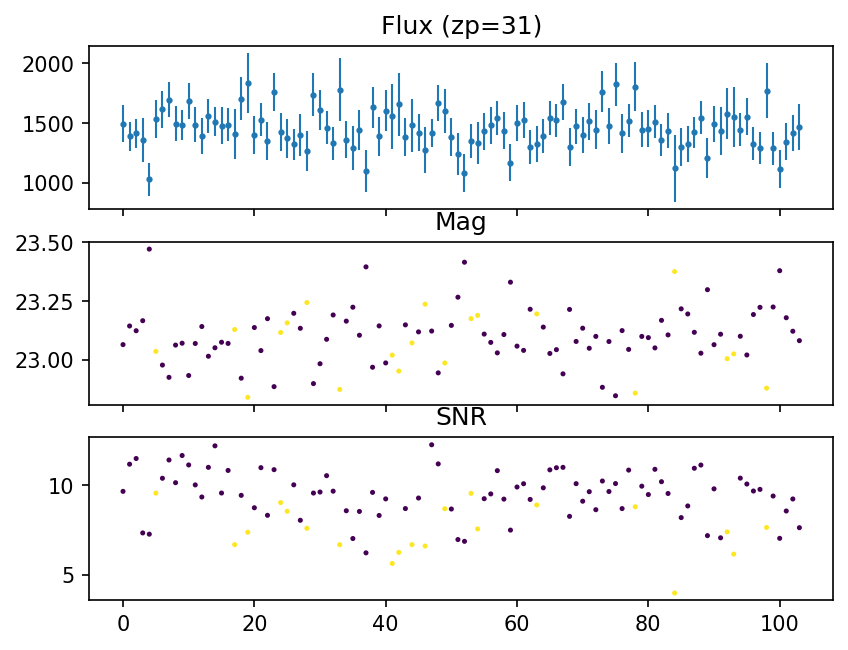

7


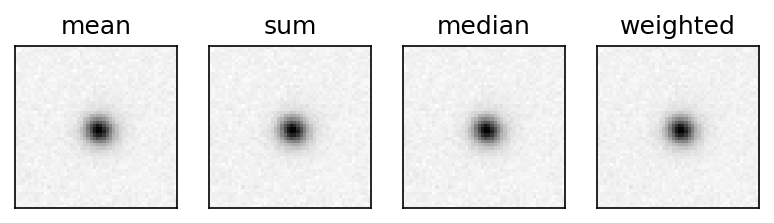

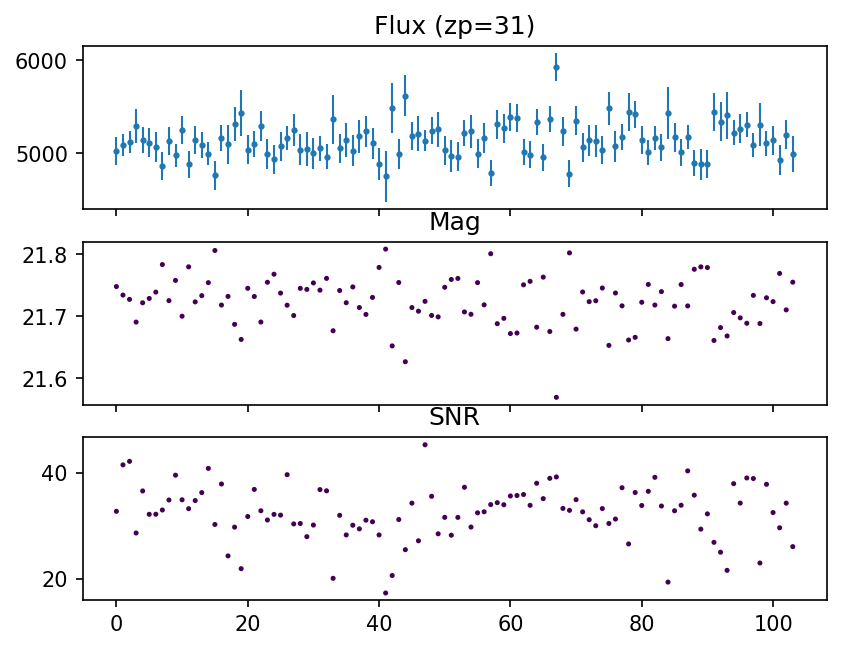

8


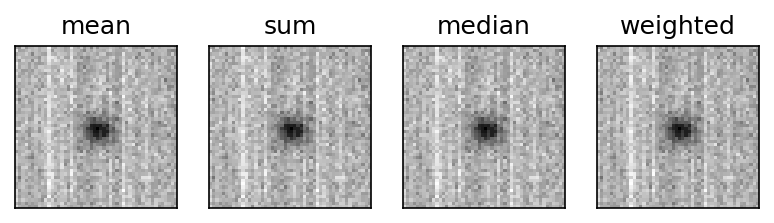

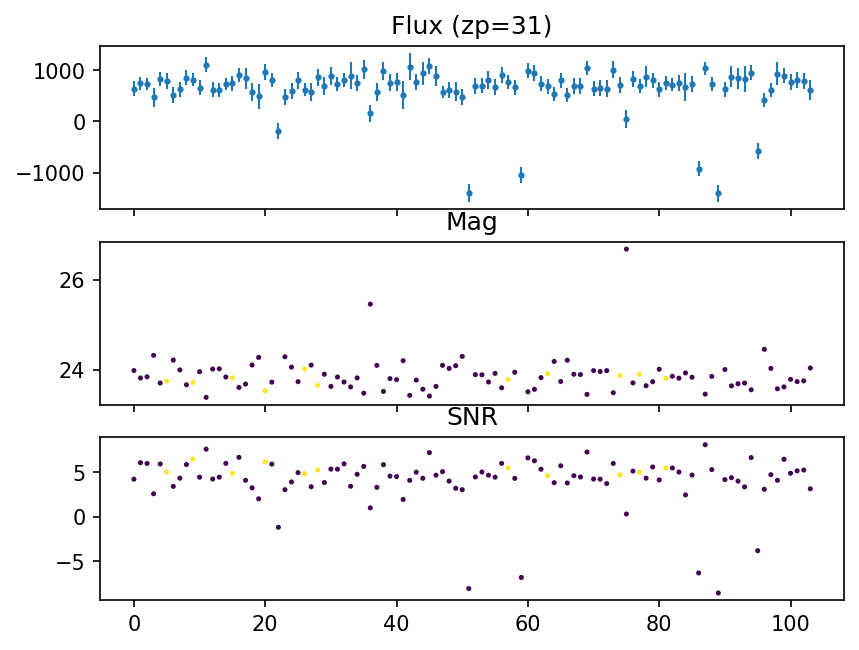

9


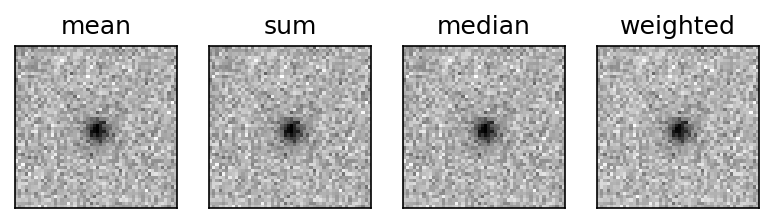

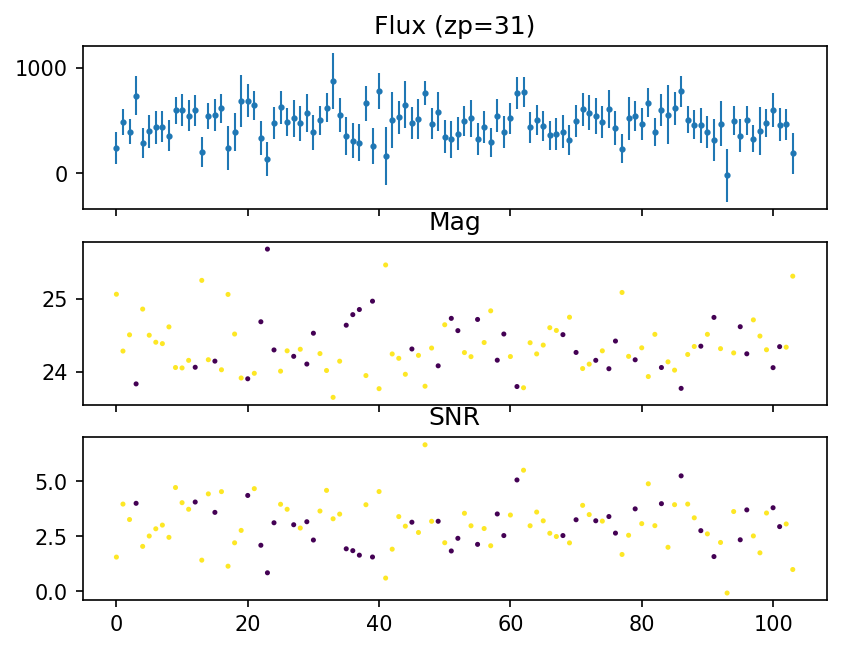

10


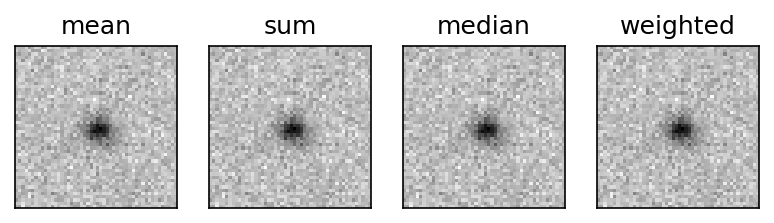

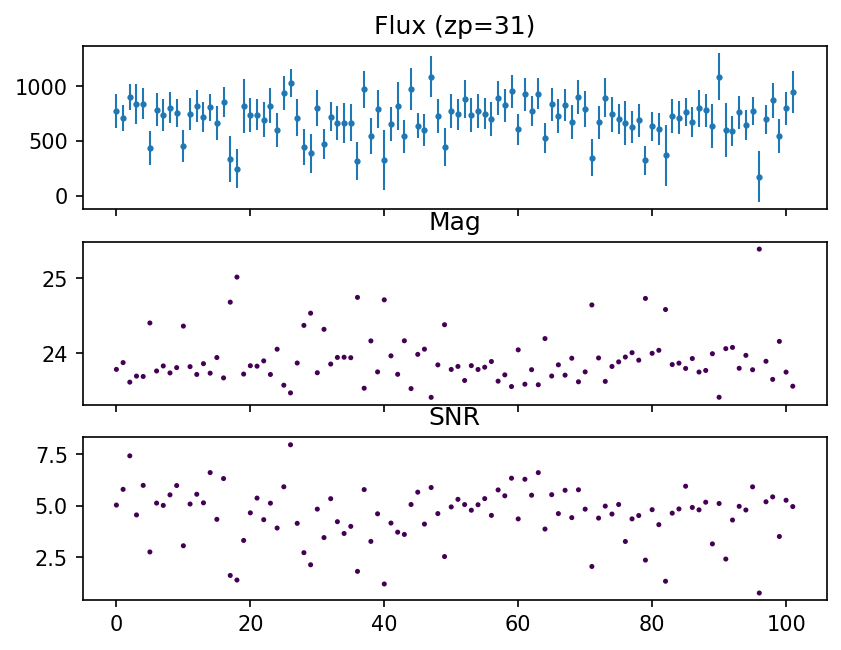

11


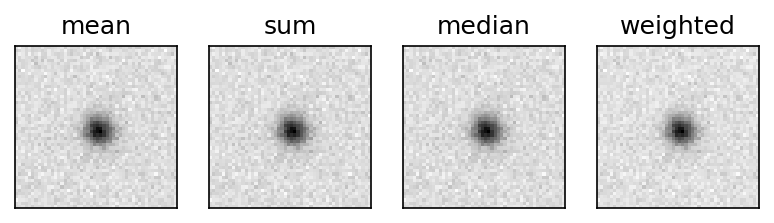

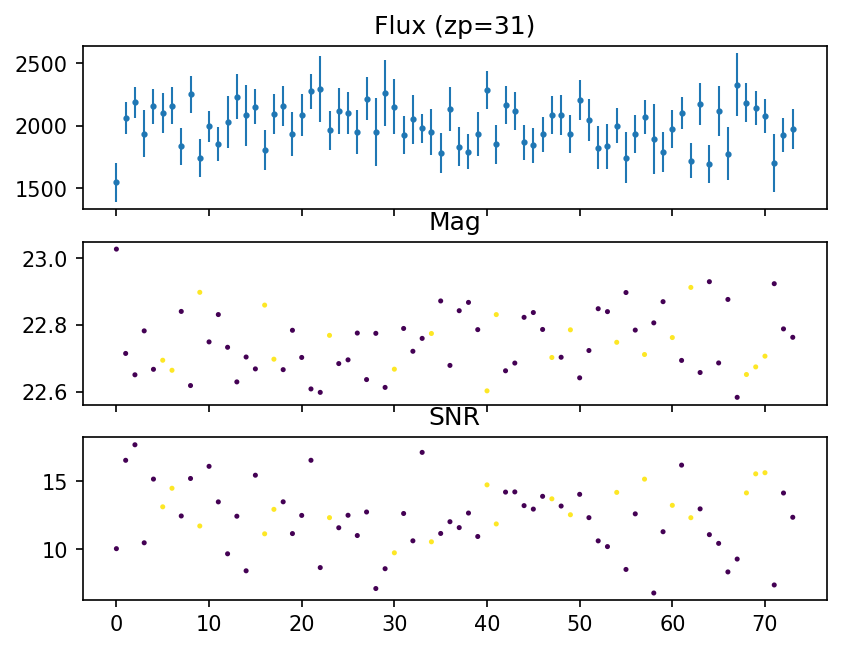

12


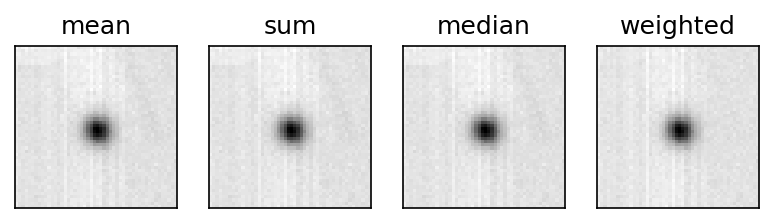

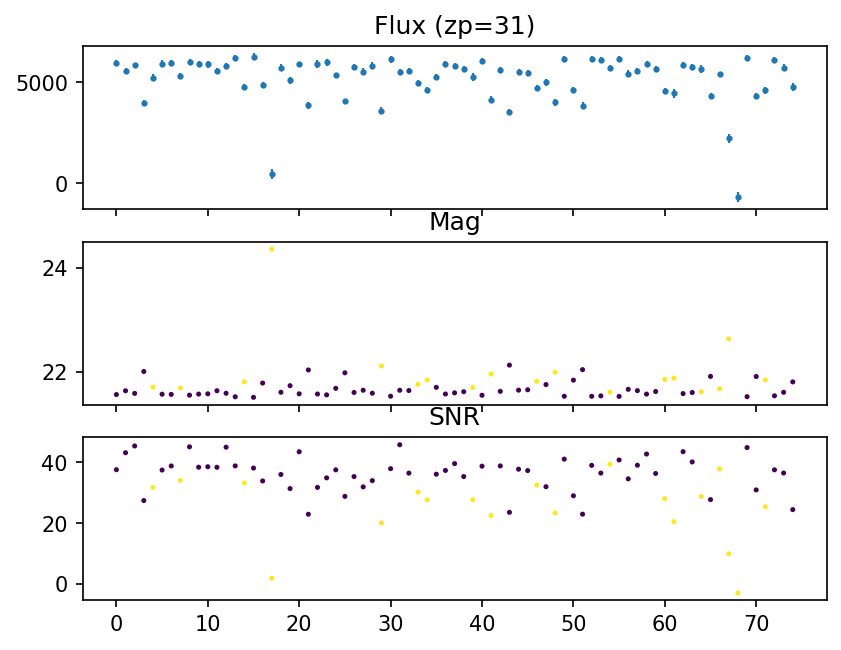

13


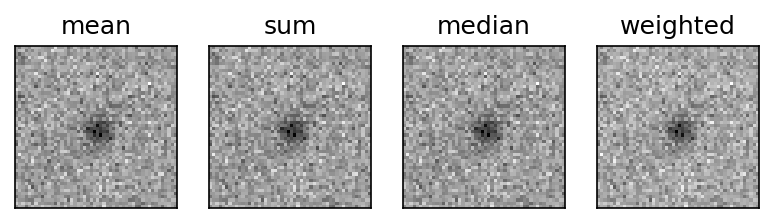

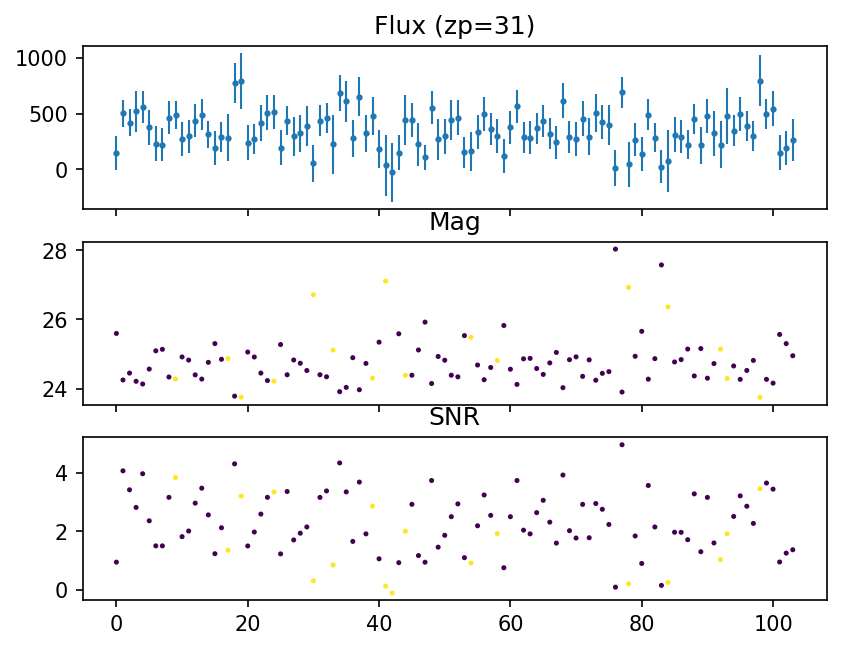

14


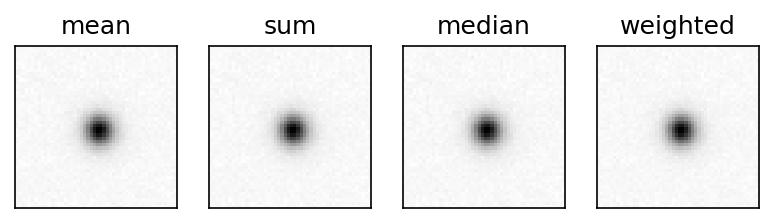

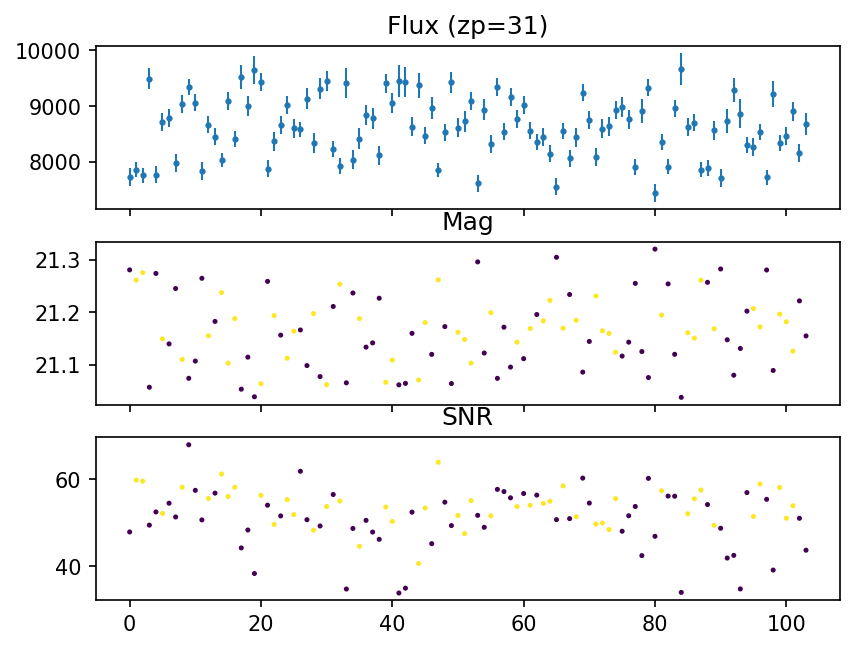

15


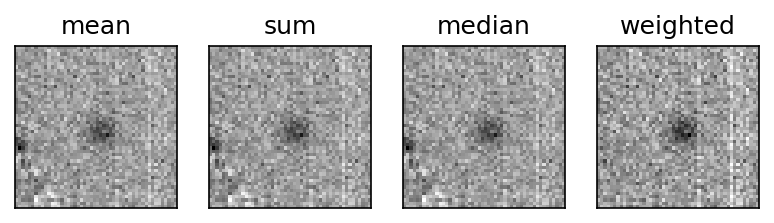

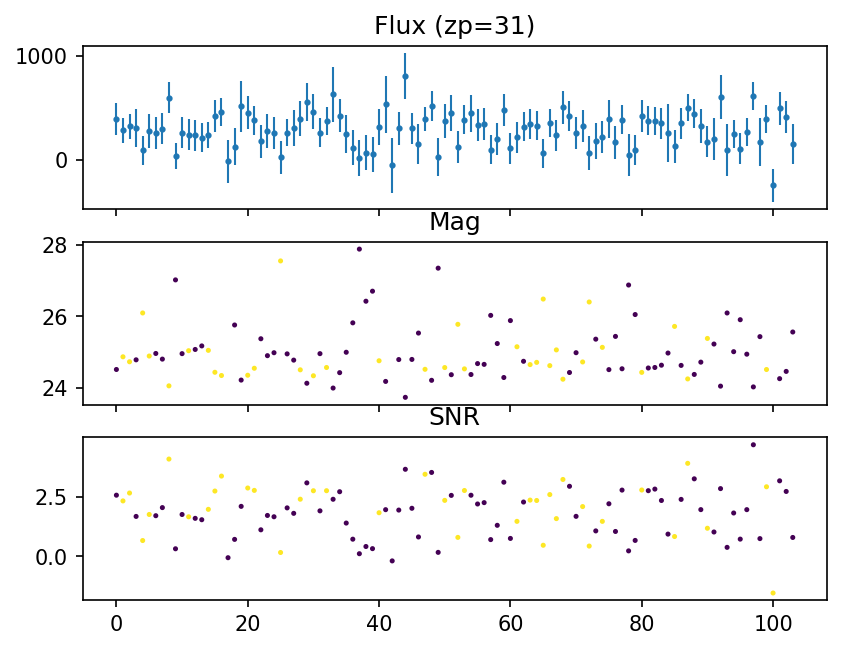

16


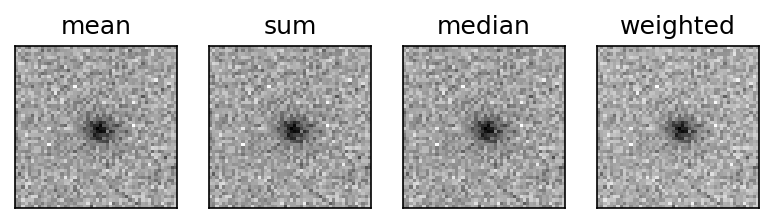

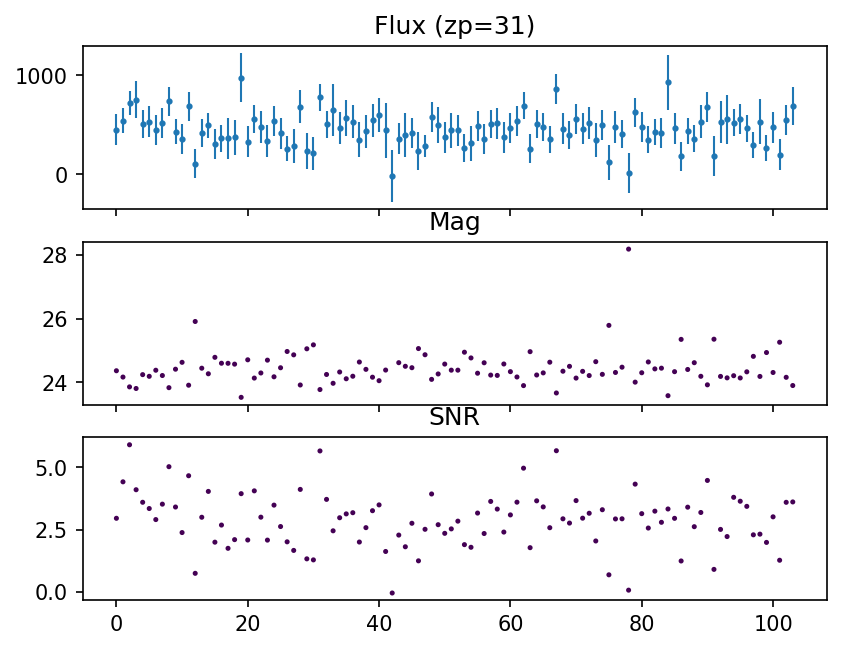

17


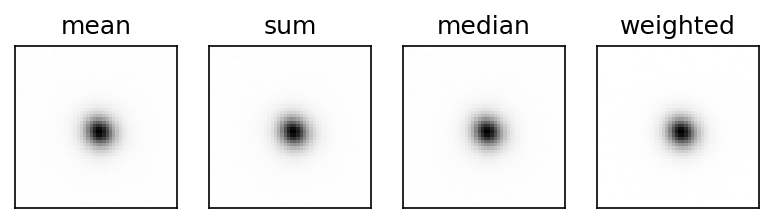

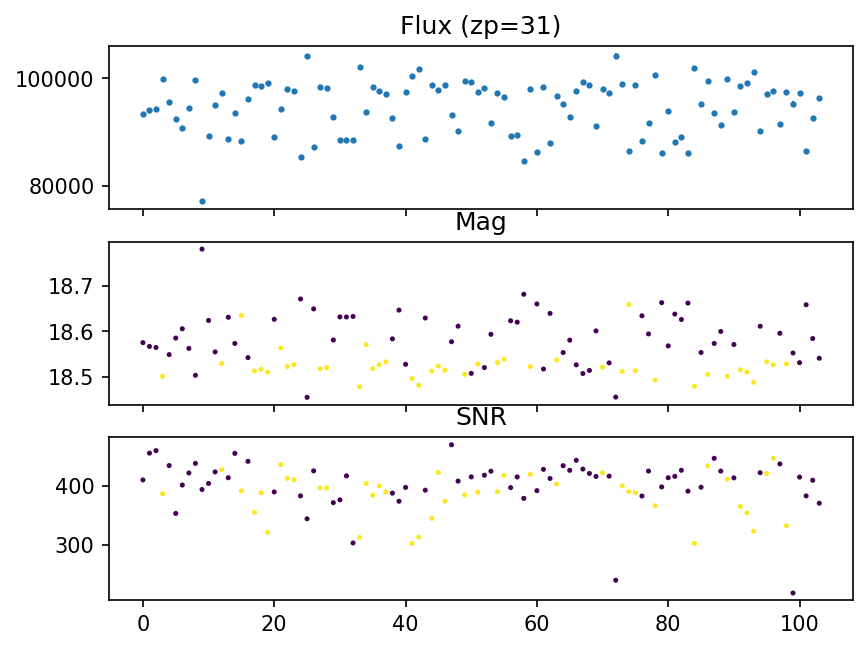

18


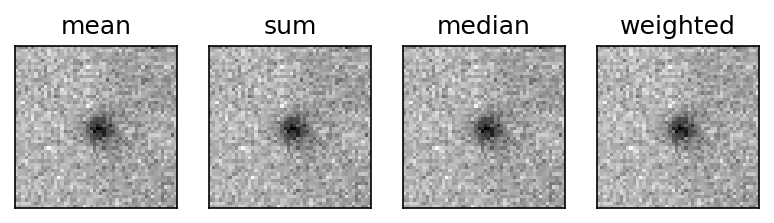

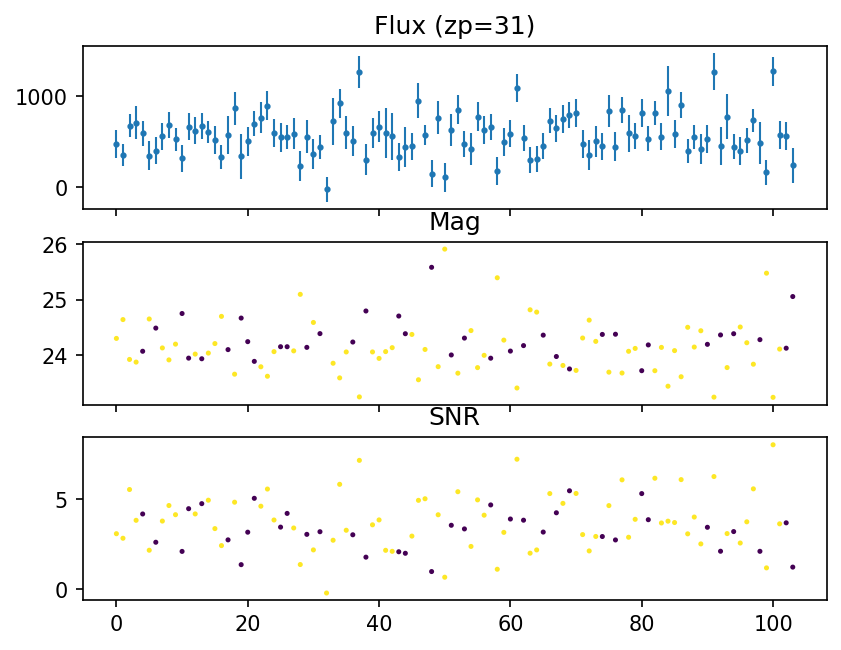

19


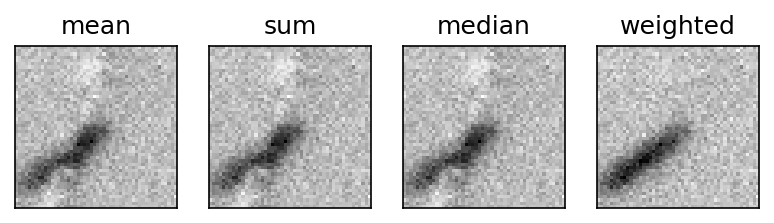

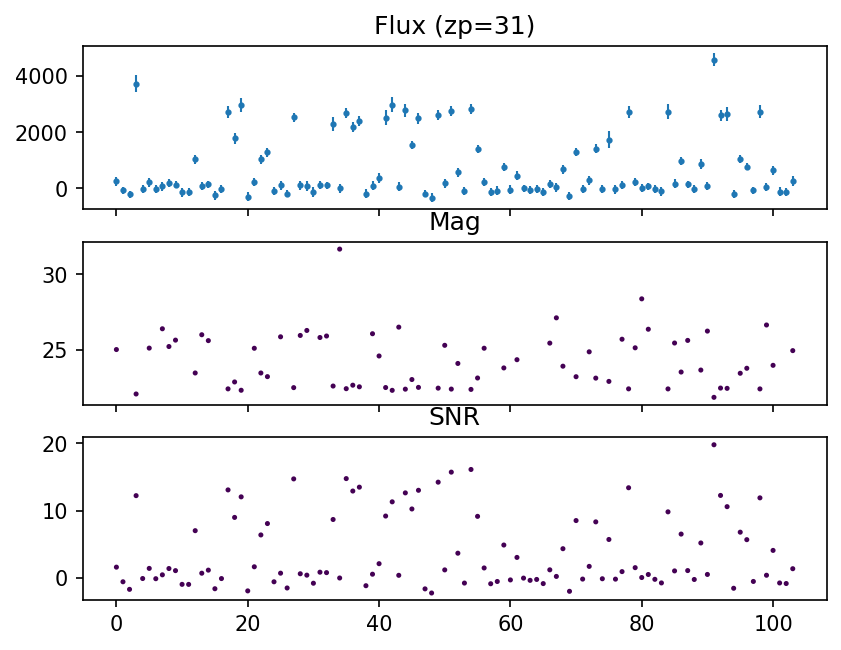

20


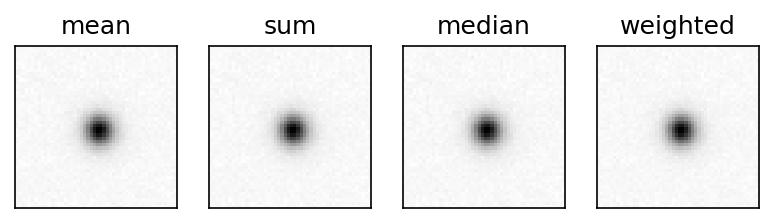

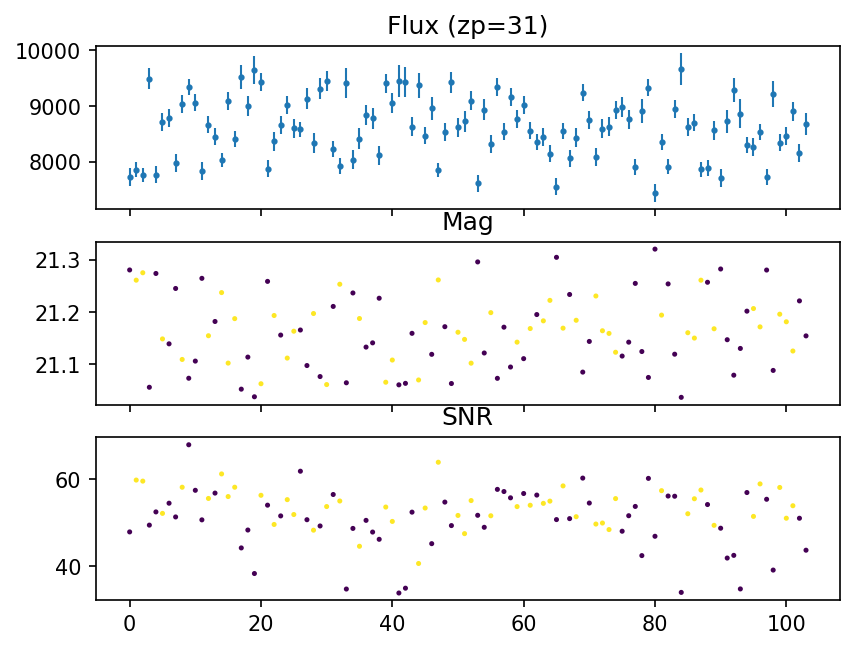

21


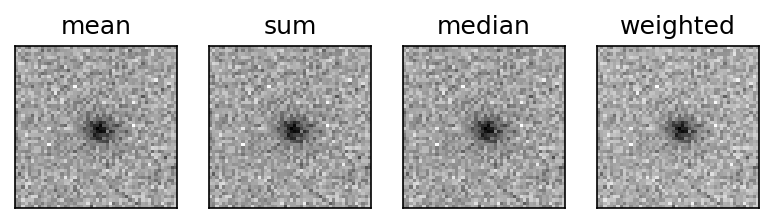

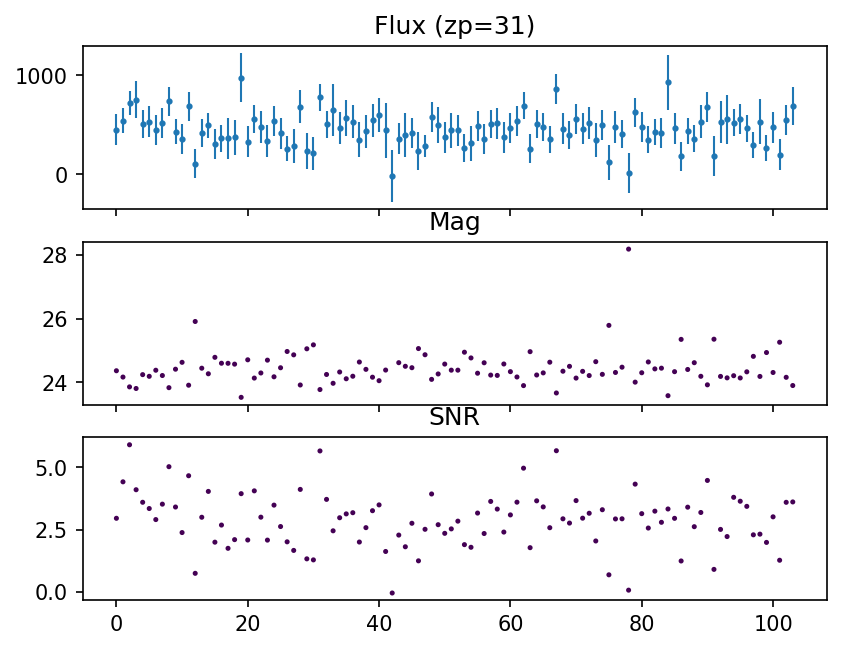

22


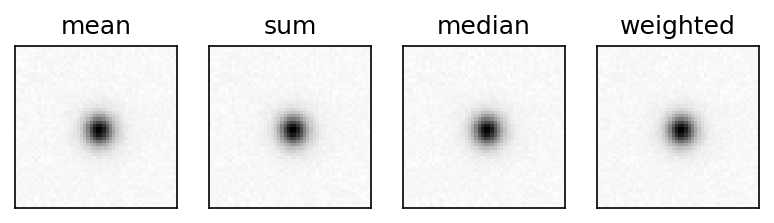

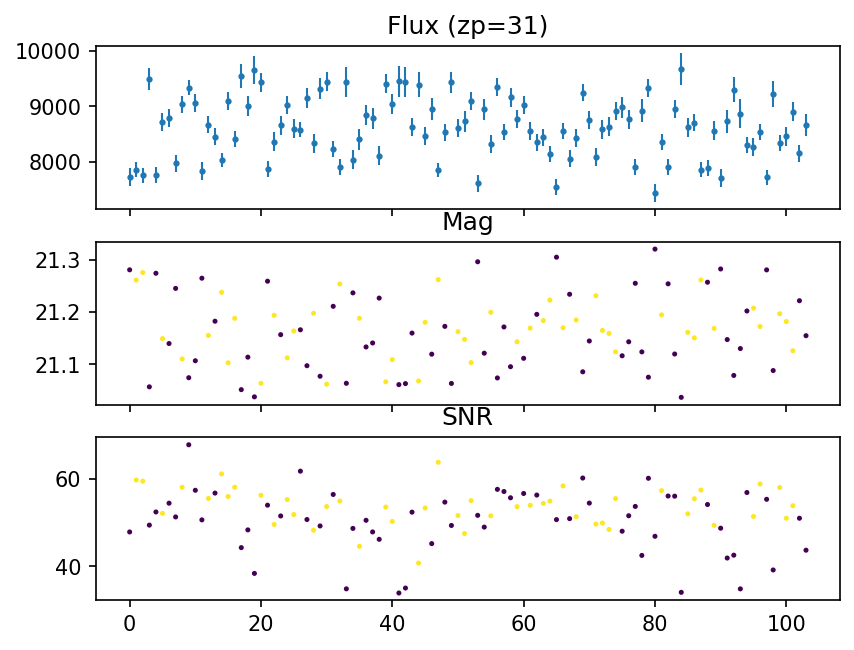

23


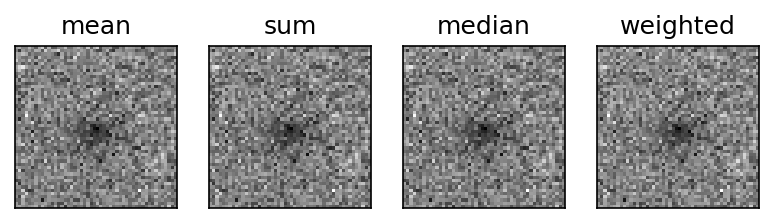

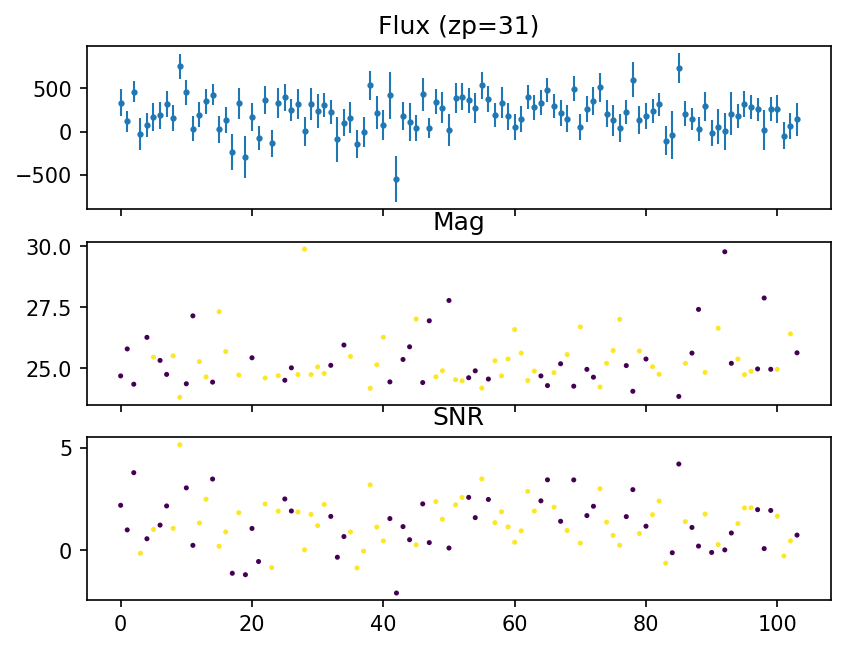

24


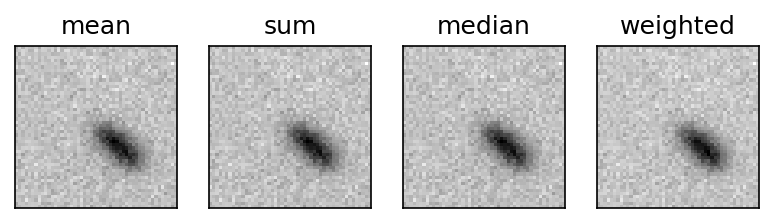

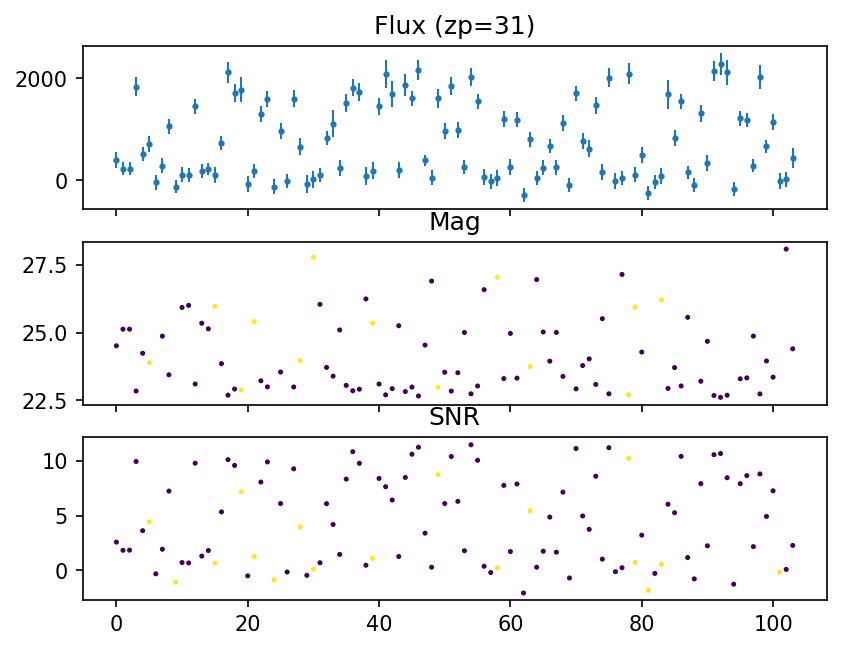

In [334]:
for i, cluster in enumerate(clusters):
    print(i)
    fig = plot_summary_coadds(cluster.summary)
    plt.show()
    fig = plot_summary_light_curve(cluster.summary)
    plt.show()

In [342]:
clusters[19].line

In [336]:
def plot_summary_cutouts(
    summary, 
    cols=None, rows=None, 
    component="", 
    title="{visit}",#"\n({x}, {y})\nSNR={significance:0.1f}", 
    show_colorbar=False, 
    highlight_points=True,
    limit=None,
    only_points=False,
    stretch="linear",
    scale="zscale",
    **kwargs
):
    import matplotlib.pyplot as plt
    import lsst.afw.display as afwDisplay
    import lsst.geom
    import numpy as np
    
    expnum = sorted(list(cluster.cutouts.keys()))
    
    if only_points:
        expnum = sorted(list(set(cluster.points[:, 3])))
    
    if limit:
        expnum = expnum[:limit]
    
    if len(expnum) == 0:
        return None, None
    
    afwDisplay.setDefaultBackend("matplotlib")
    if rows is not None and cols is None:
        cols = len(expnum) / rows
    elif rows is None and cols is not None:
        rows = len(expnum) / cols
    elif rows is None and cols is None:
        cols = round((len(expnum))**0.5 + 0.5)
        rows = len(expnum)/cols
                
    if cols > len(expnum):
        cols = len(expnum)
        rows = 1

    if (cols - int(cols)) != 0:
        cols += 1
    cols = int(cols)
        
    if (rows - int(rows)) != 0:
        rows += 1
    rows = int(rows)

    print(rows, cols)
    fig = plt.figure(figsize=(cols*2, rows*2), **kwargs)
    axs = fig.subplots(rows, cols)
    axs = np.atleast_2d(axs)
    display = afwDisplay.Display(frame=fig)
    display.scale(stretch, scale)
    
    for ax, e in zip(axs.flatten(), expnum):
        plt.sca(ax)
        cutout = cluster.cutouts[e]
        center = cluster.centers[e]
        a = cutout
        if component:
            a = getattr(cutout, component)
        display.mtv(a)

        visit = cutout.getInfo().getVisitInfo().getId()
#         x = center.getX()
#         y = center.getY()
#         snr = 
#         x = int(row['i_x'])
#         y = int(row['i_y'])
#         significance = get_significance(row)
        plt.title(title.format(**locals()))

        if highlight_points:
            if np.isin(visit, cluster.points[:, 3]):
                mask = cluster.points[:, 3] == visit
                ax.spines['bottom'].set_color('red')
                ax.spines['top'].set_color('red')
                ax.spines['left'].set_color('red')
                ax.spines['right'].set_color('red')
                for ra, dec, _, _ in cluster.points[mask]:
                    p = cutout.wcs.skyToPixel(lsst.geom.SpherePoint(ra, dec, lsst.geom.degrees))
                    display.dot("+", p.getX(), p.getY())

        display.show_colorbar(show=show_colorbar)
        
    if len(axs.flatten()) > len(expnum):
        for ax in axs.flatten()[len(expnum):]:
            ax.remove()
    return fig, axs


In [355]:
exps = [i.expnum for i in images]

In [356]:
order = np.argsort(exps)

In [375]:
# these actually are smeared trajectories

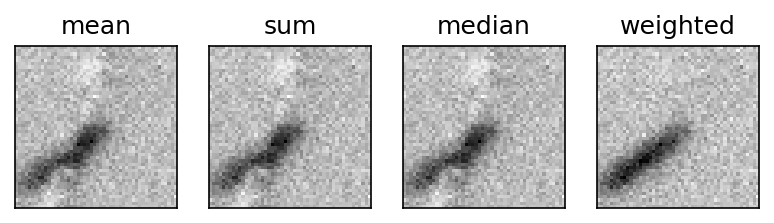

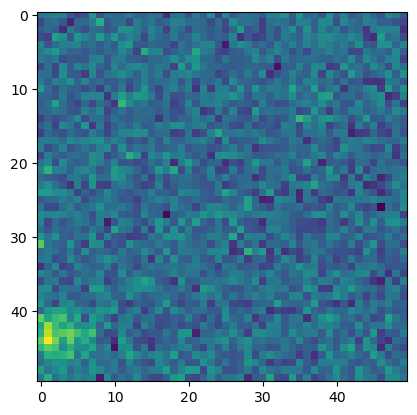

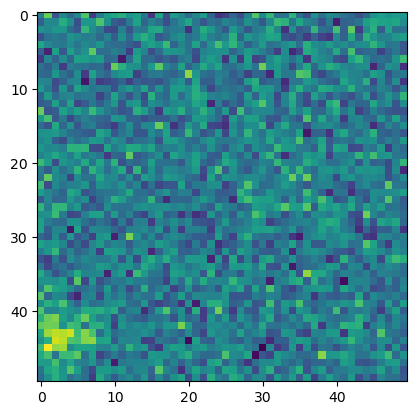

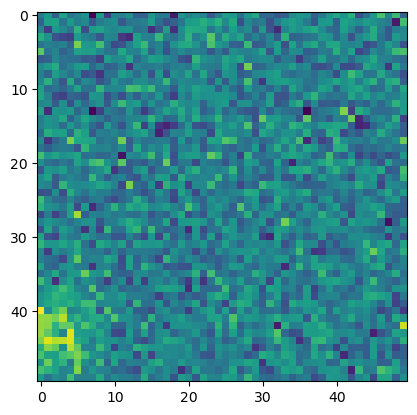

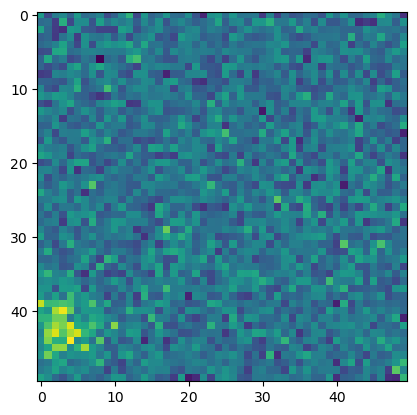

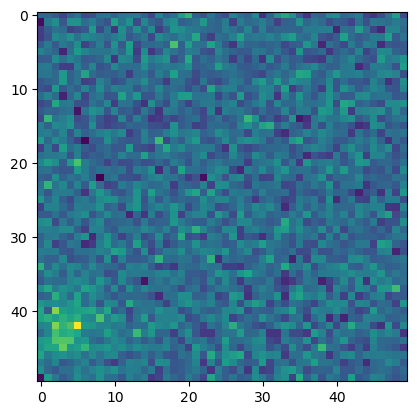

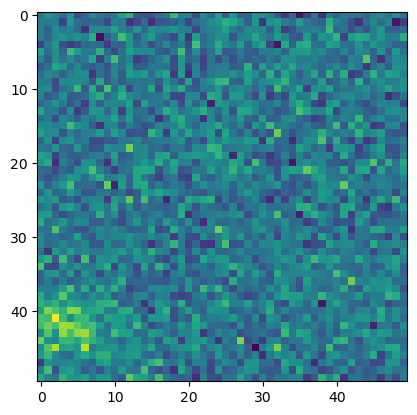

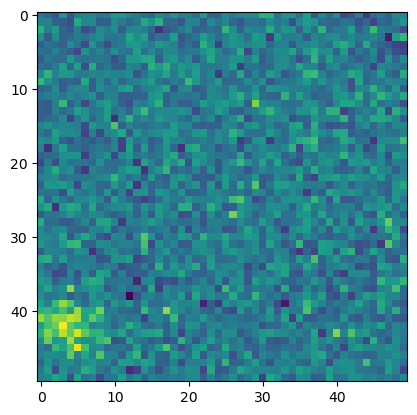

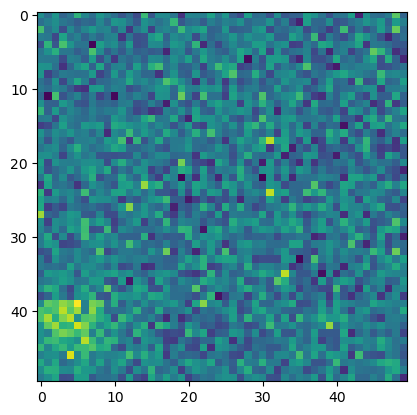

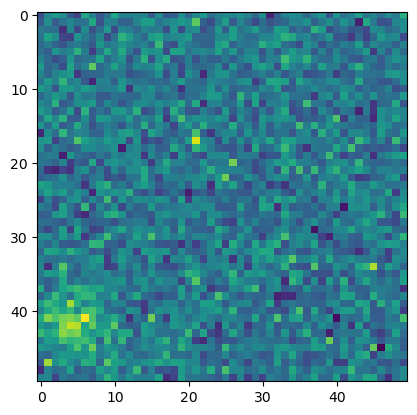

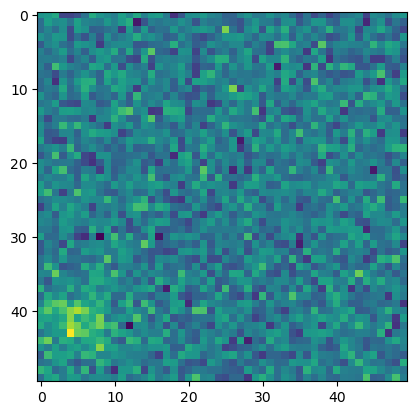

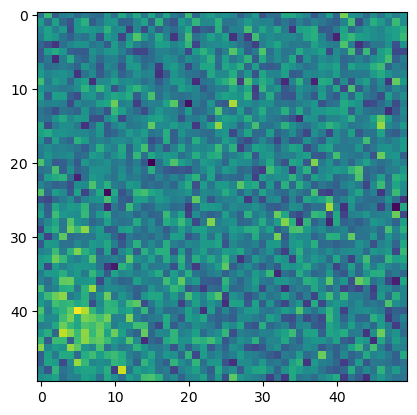

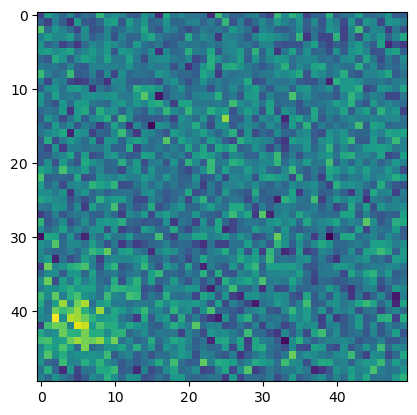

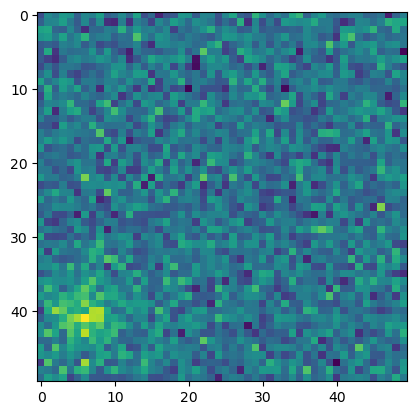

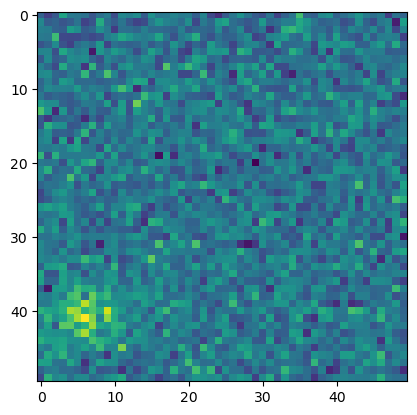

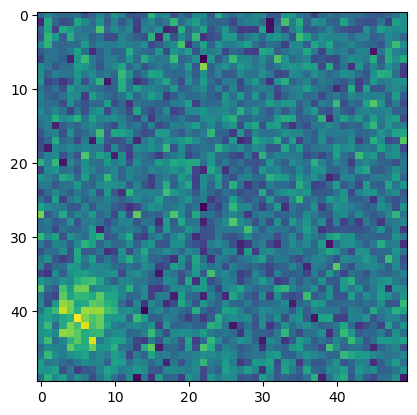

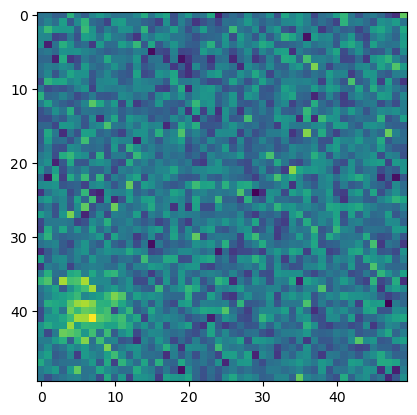

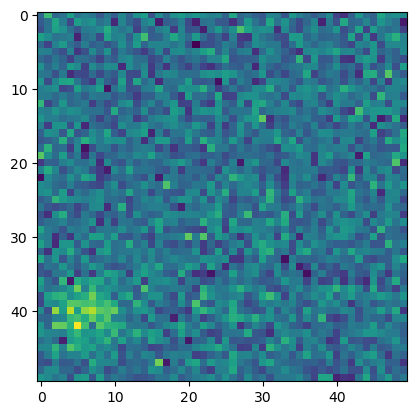

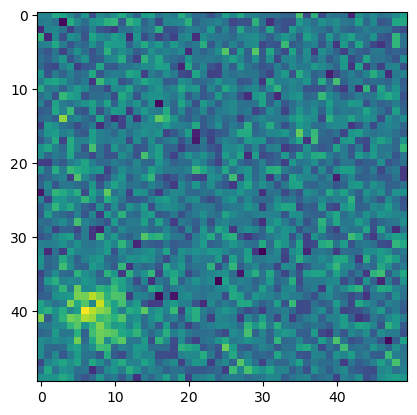

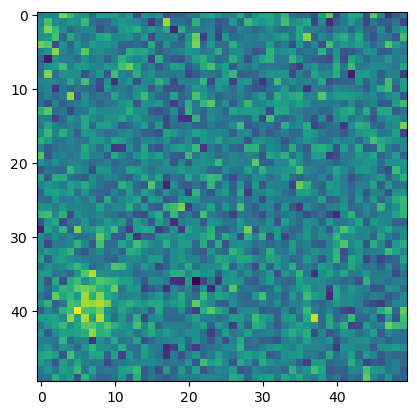

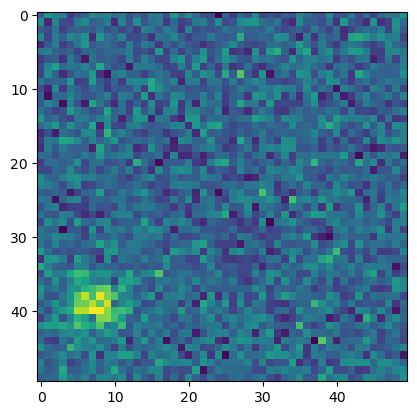

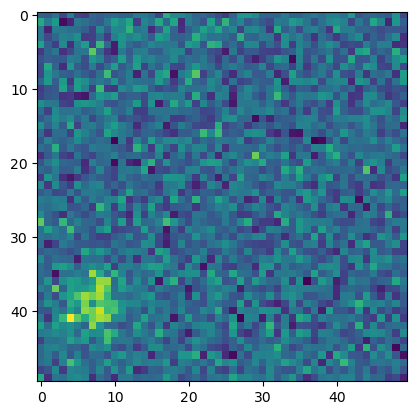

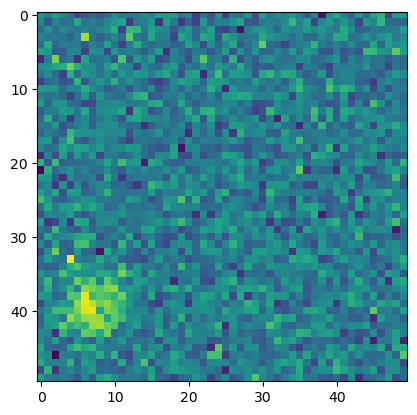

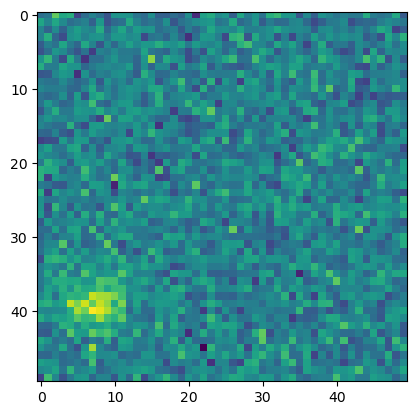

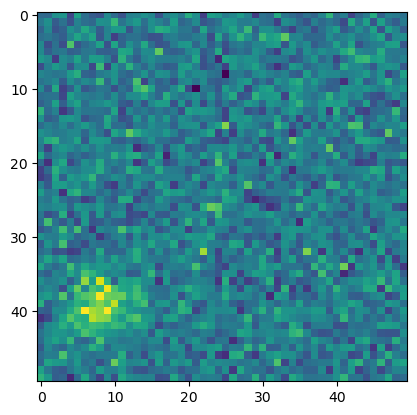

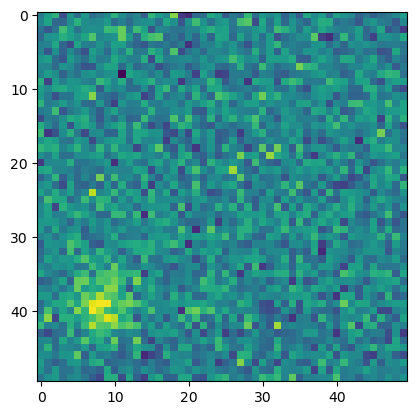

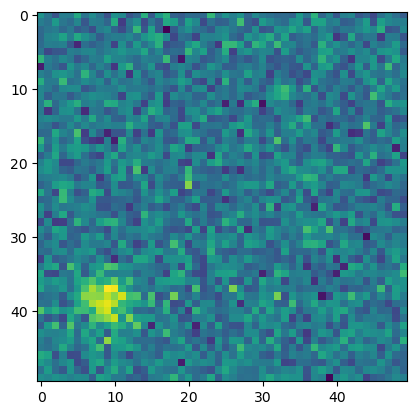

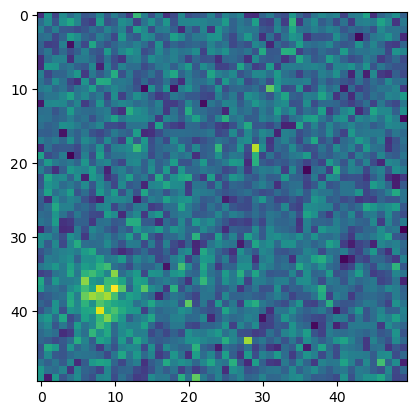

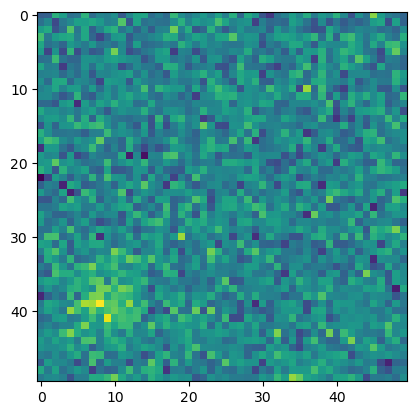

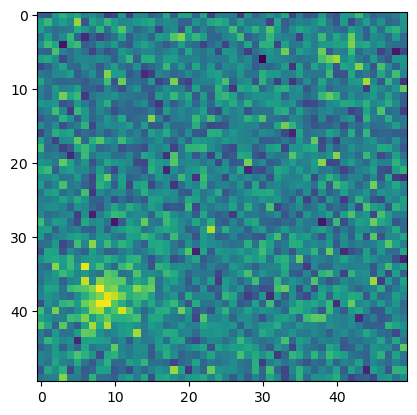

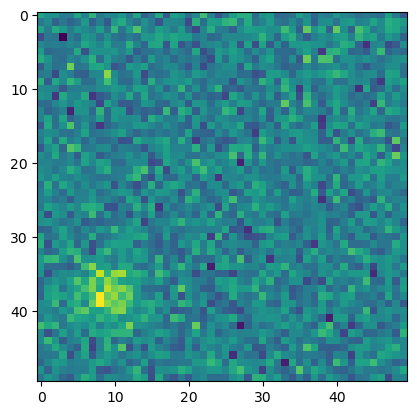

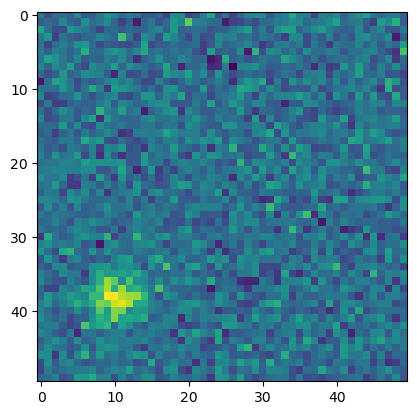

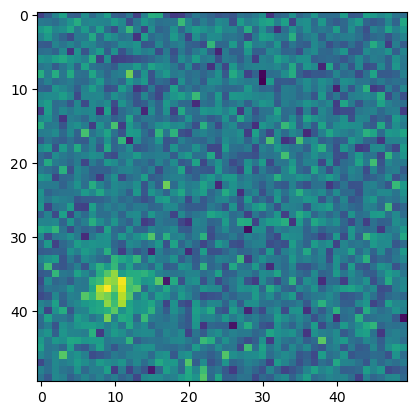

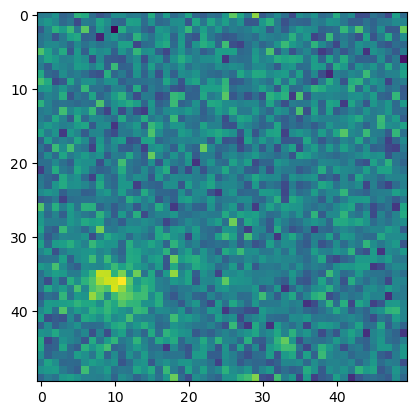

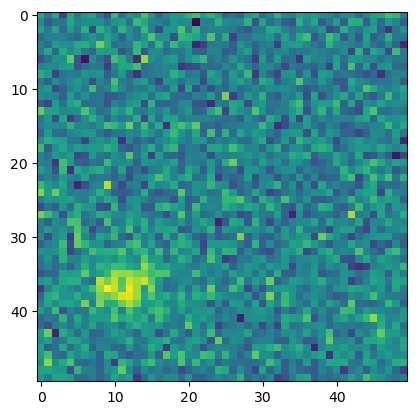

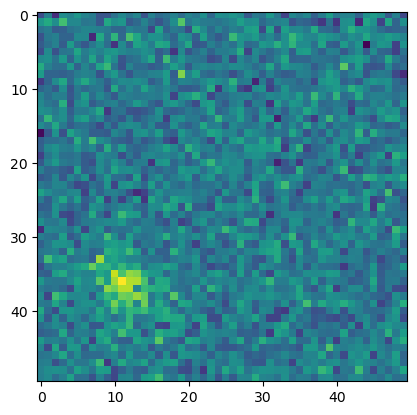

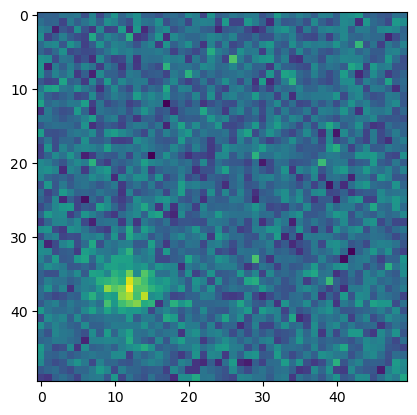

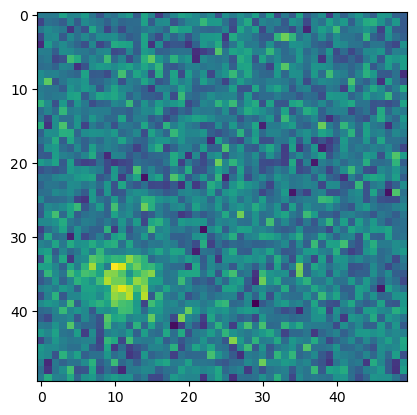

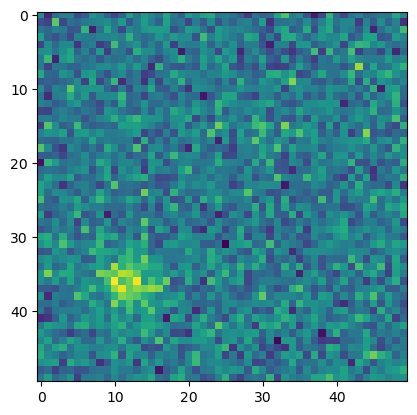

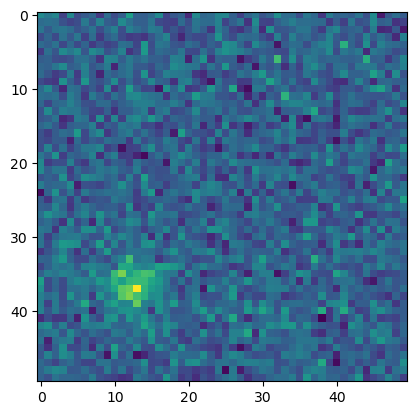

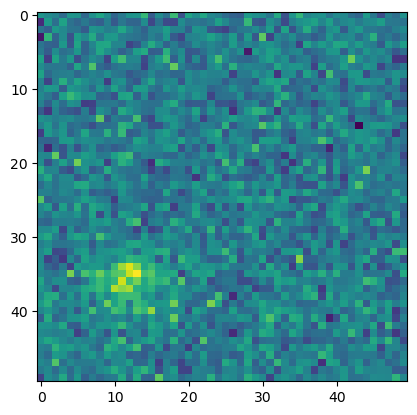

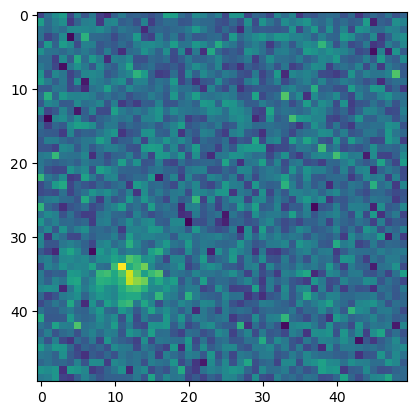

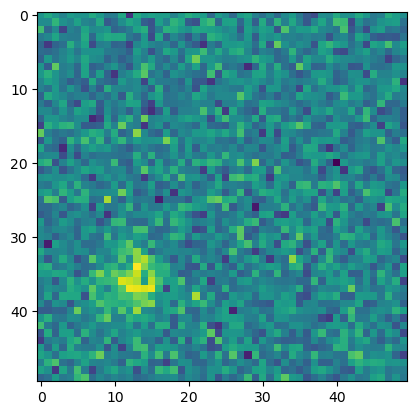

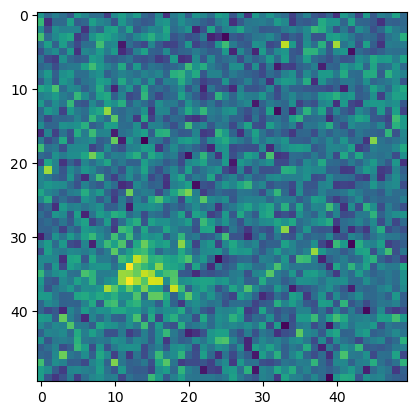

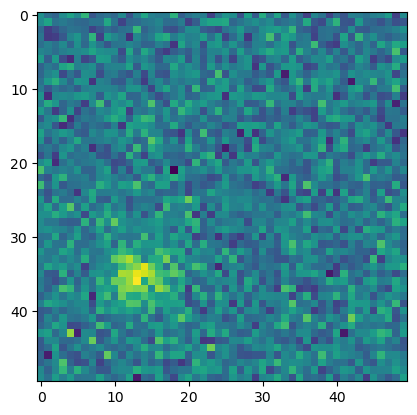

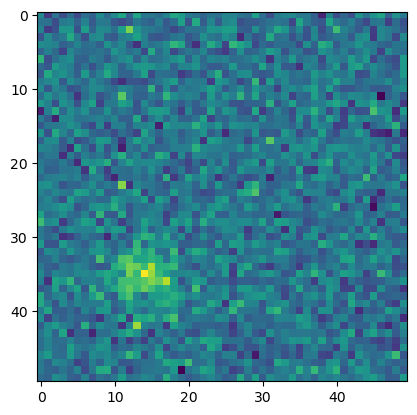

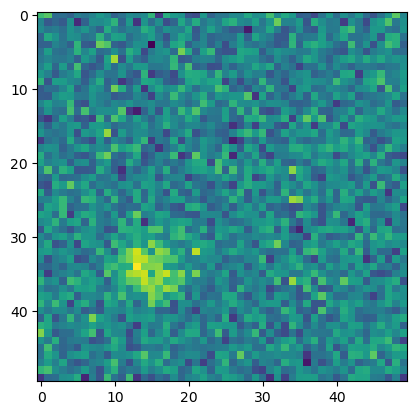

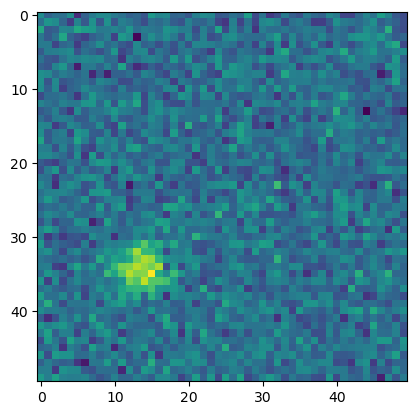

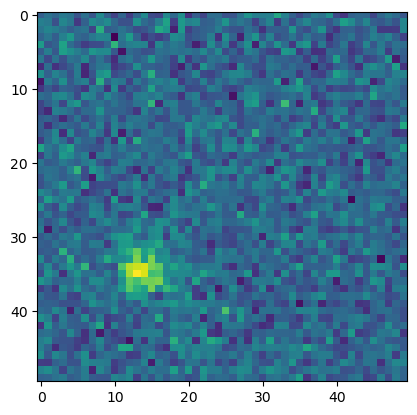

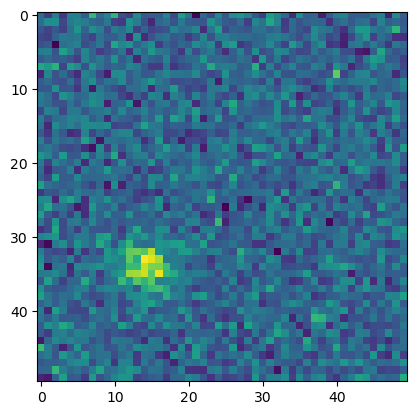

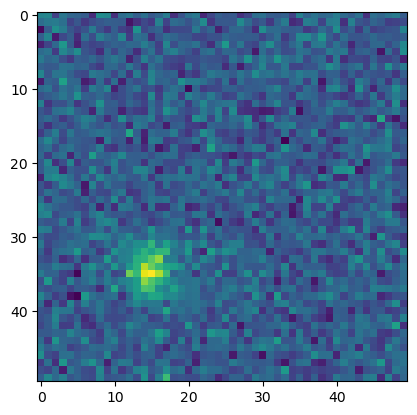

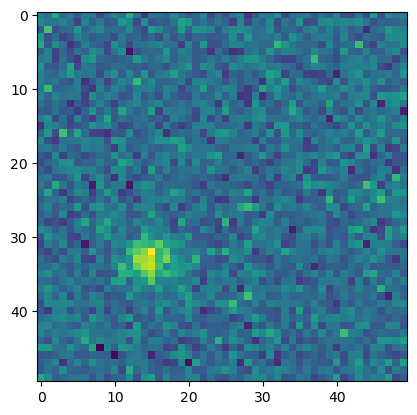

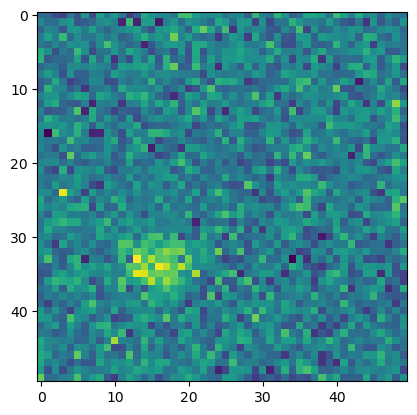

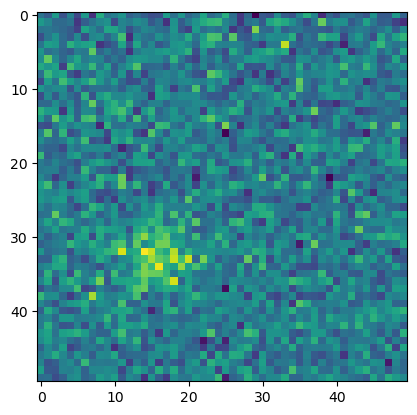

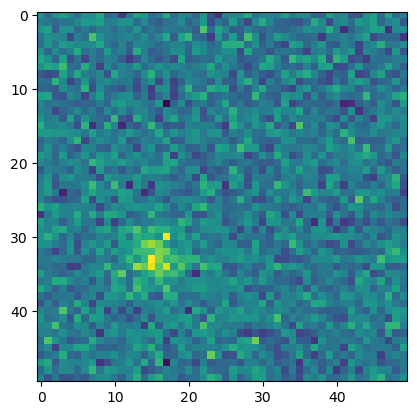

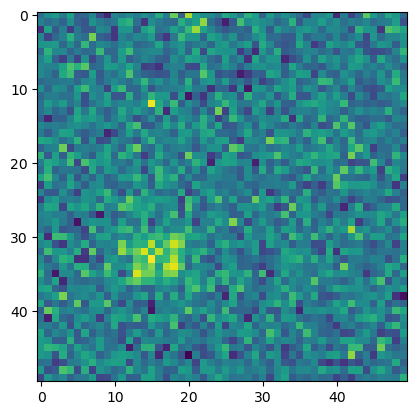

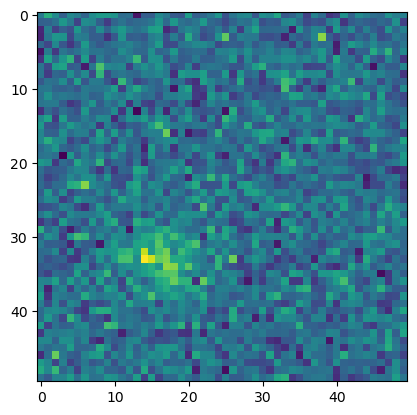

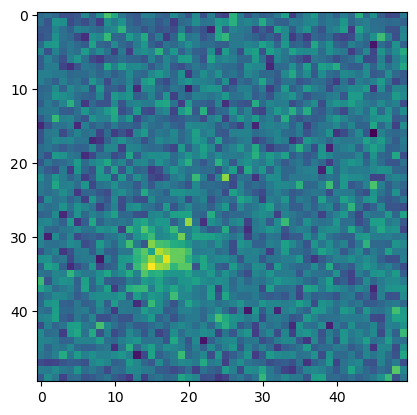

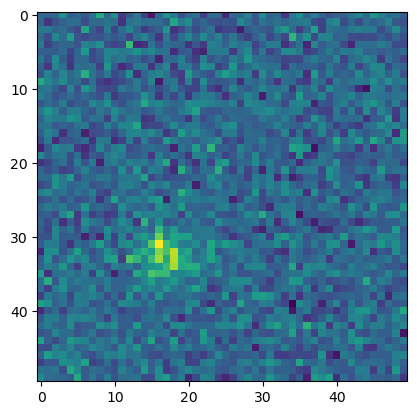

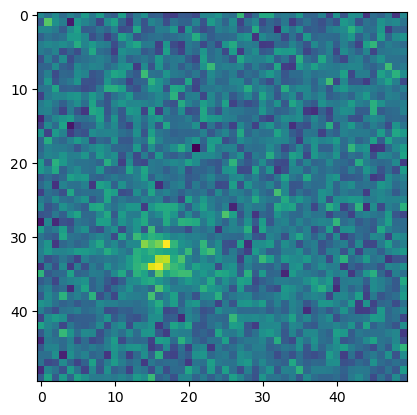

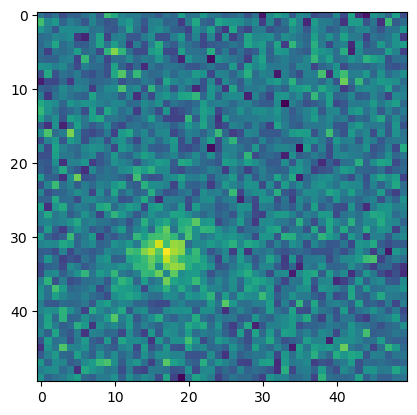

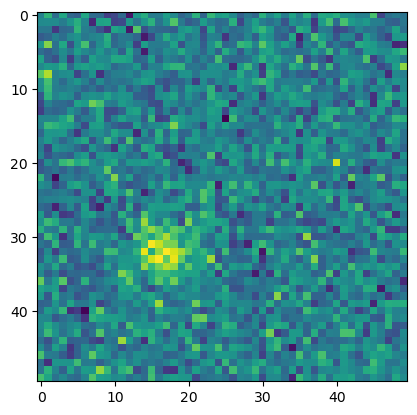

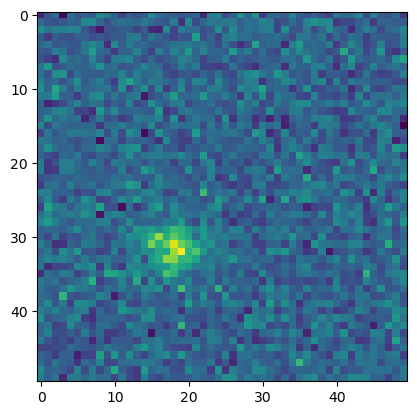

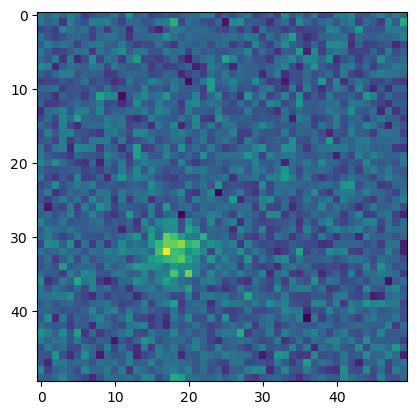

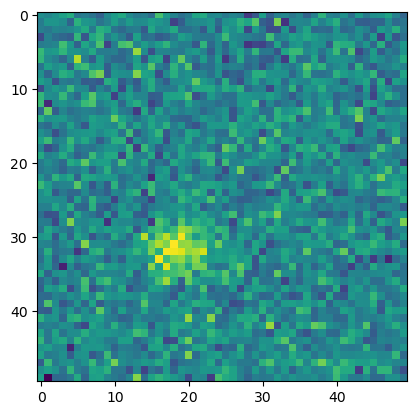

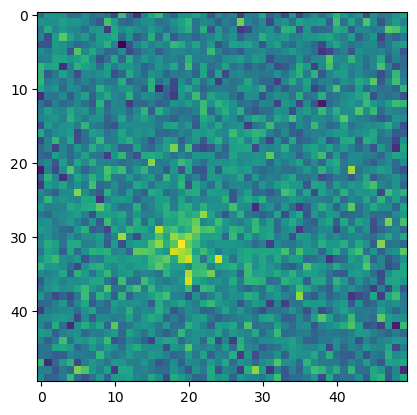

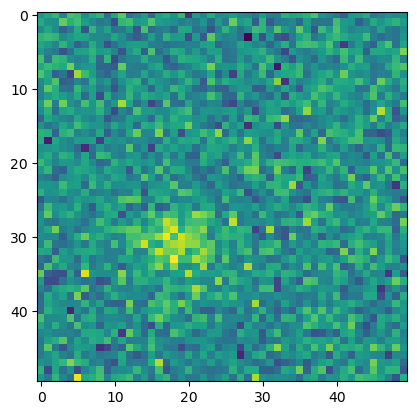

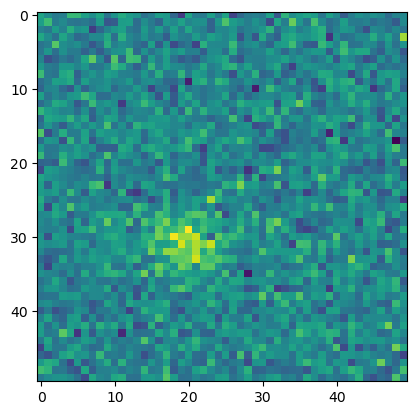

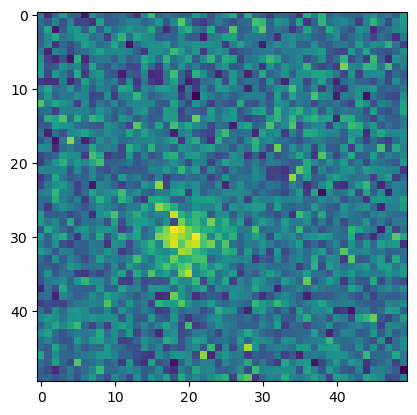

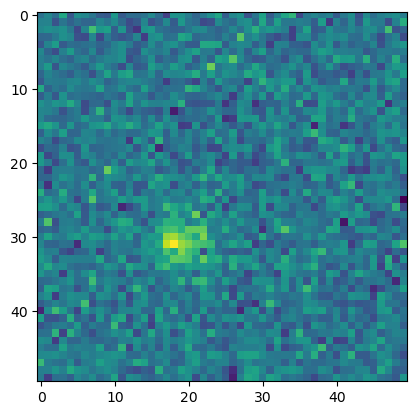

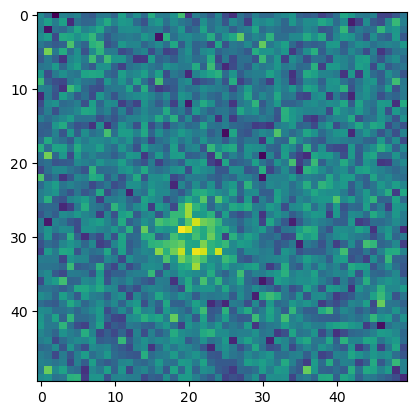

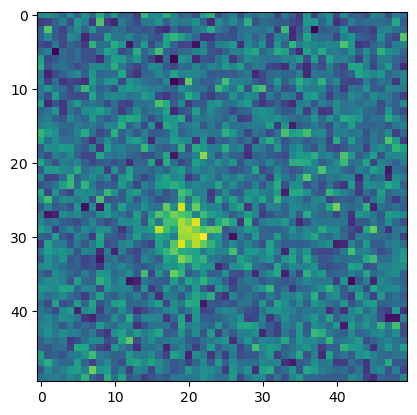

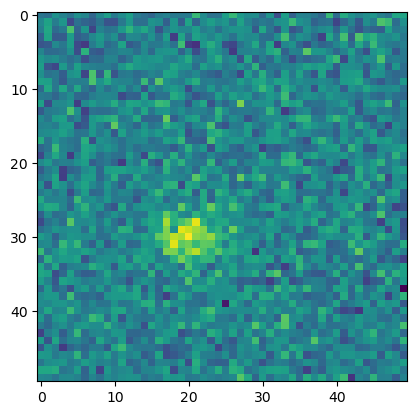

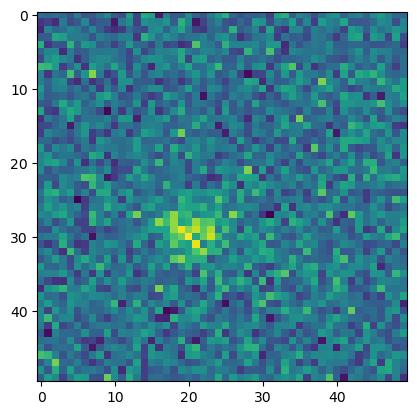

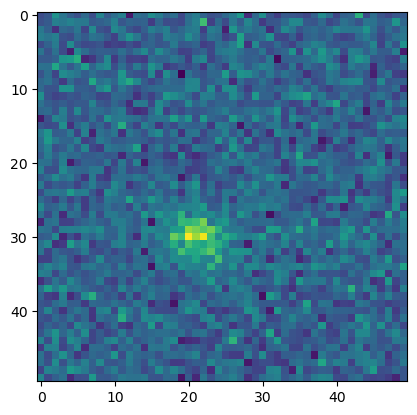

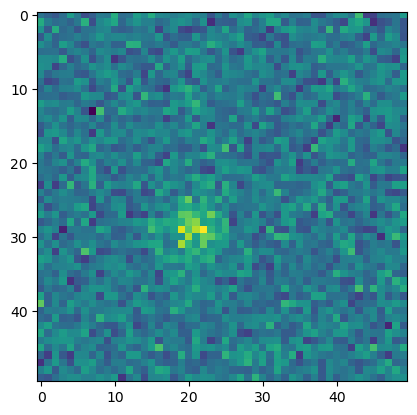

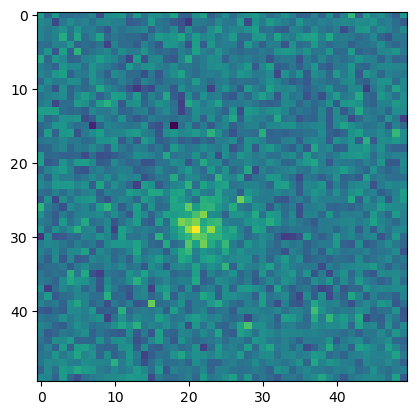

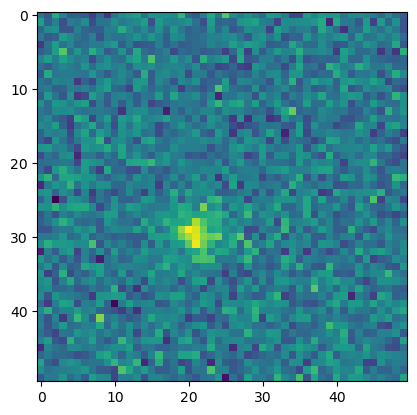

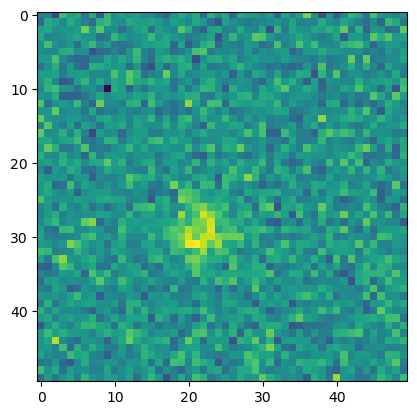

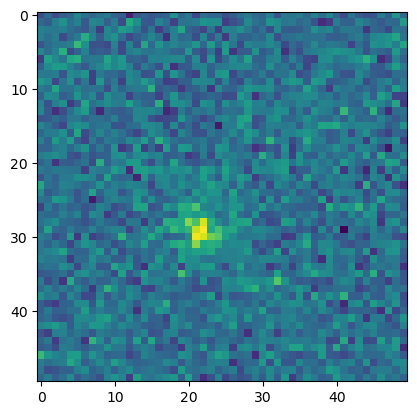

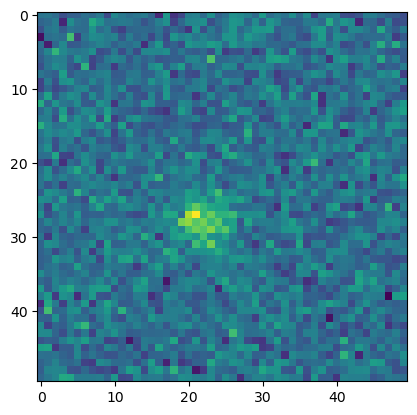

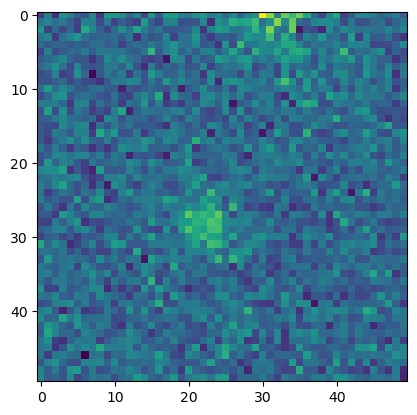

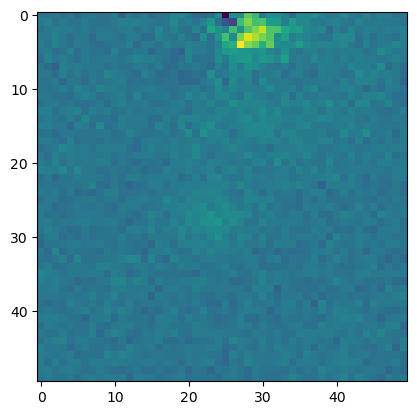

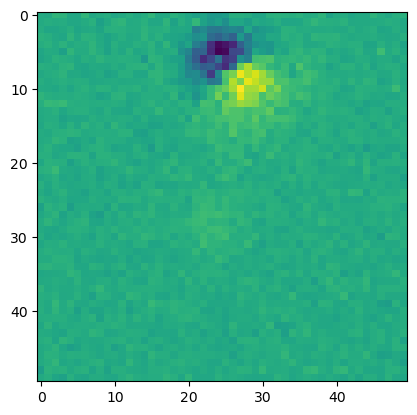

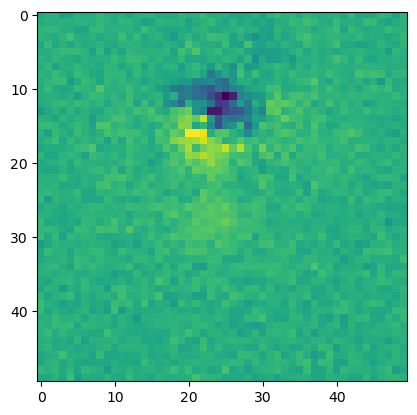

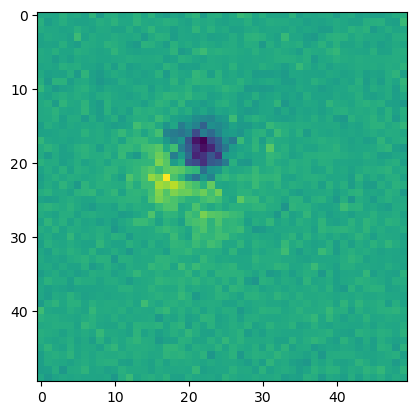

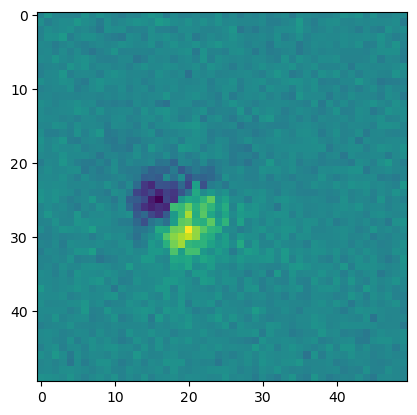

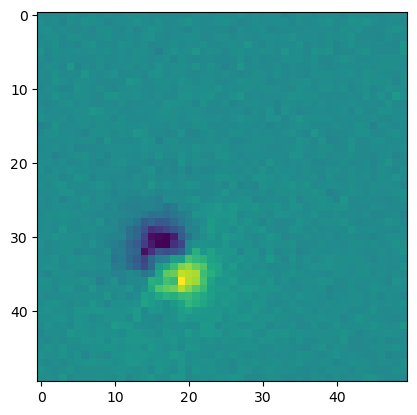

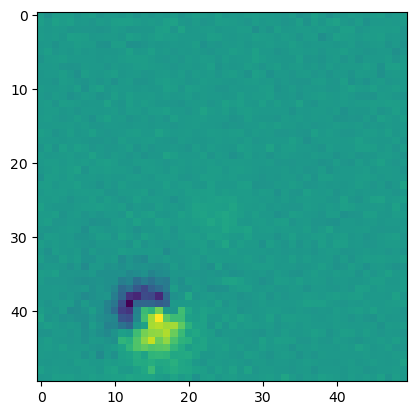

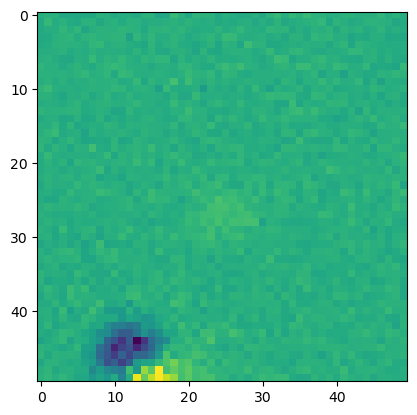

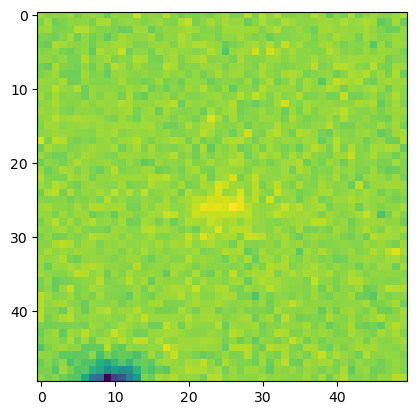

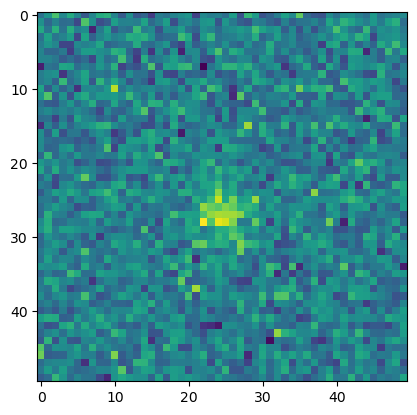

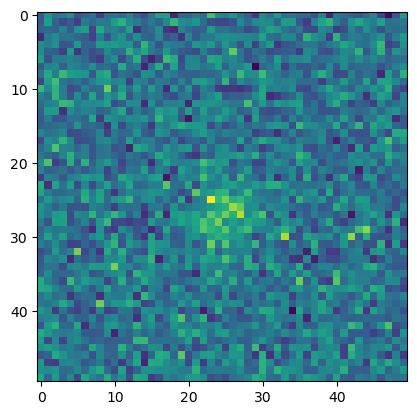

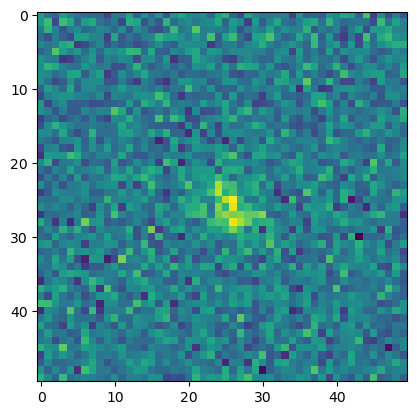

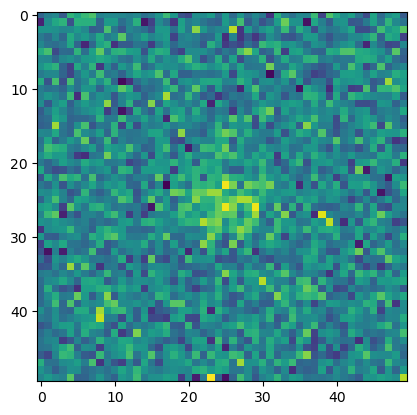

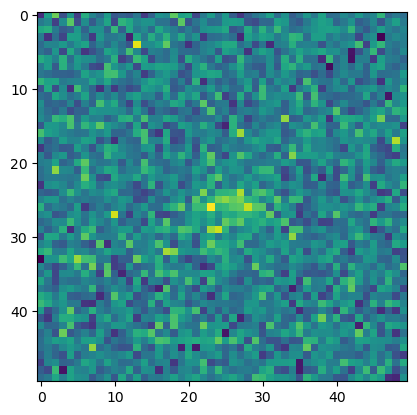

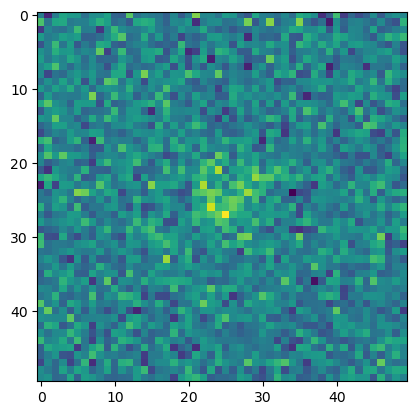

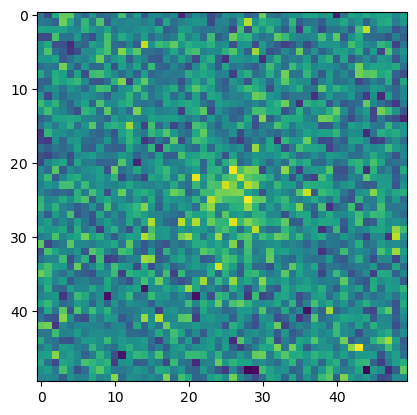

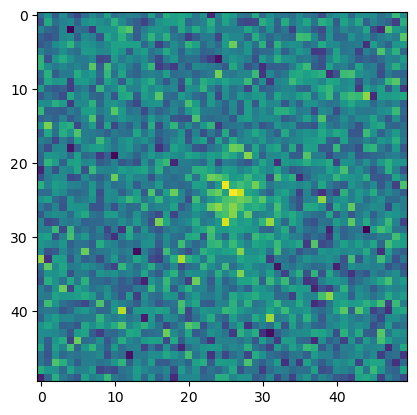

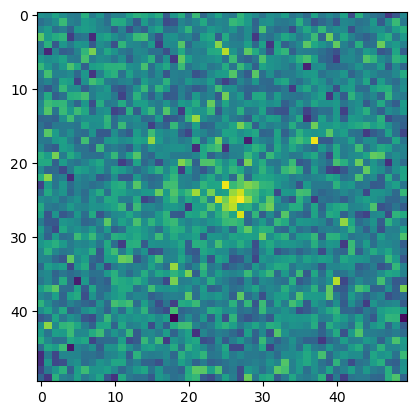

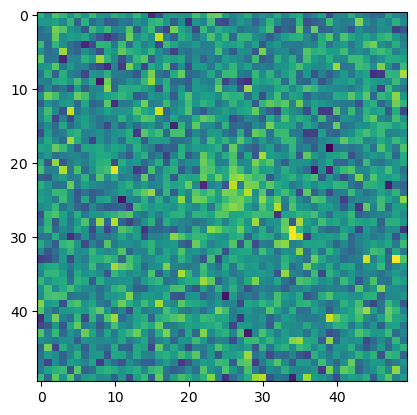

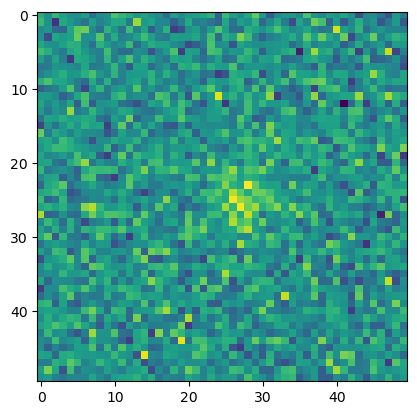

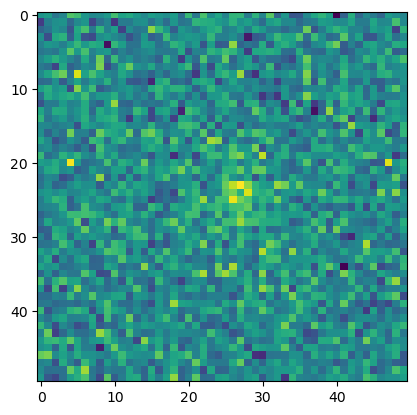

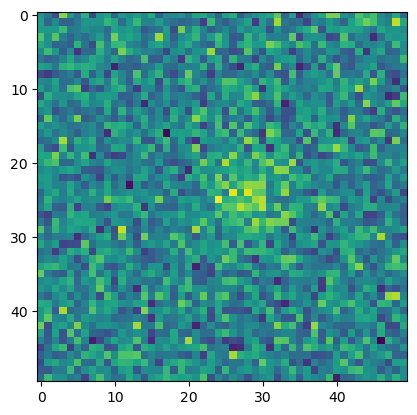

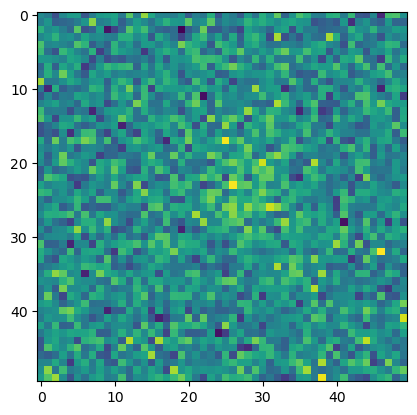

In [357]:
s = clusters[19].summary
plot_summary_coadds(s)
plt.show()
for i in s['image'][order]:
    plt.imshow(i)
    plt.show()


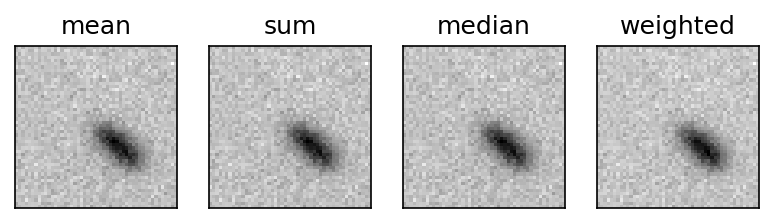

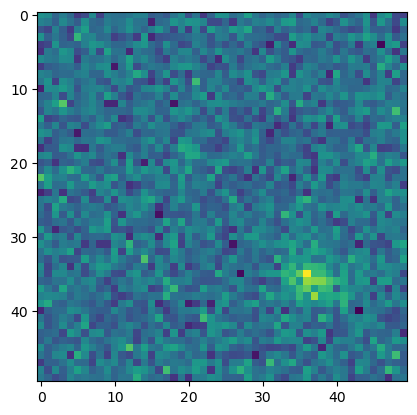

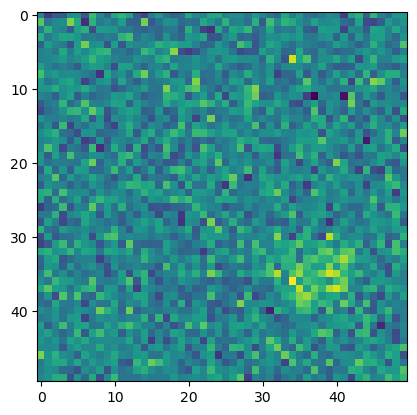

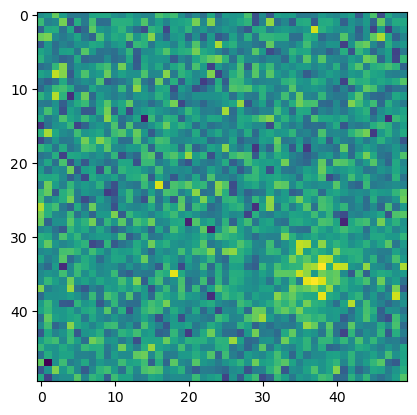

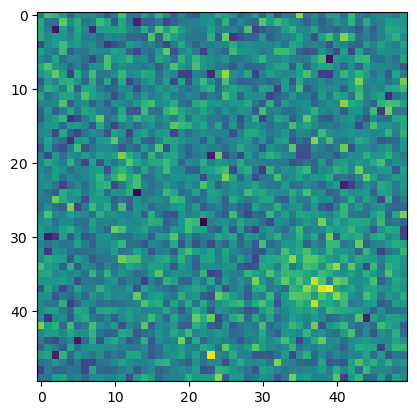

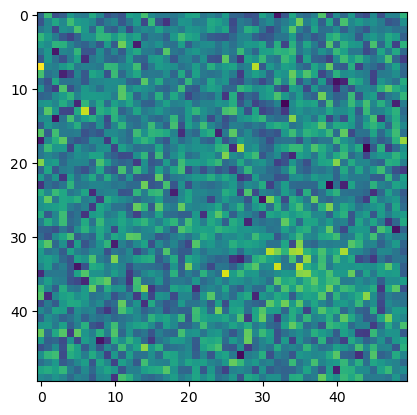

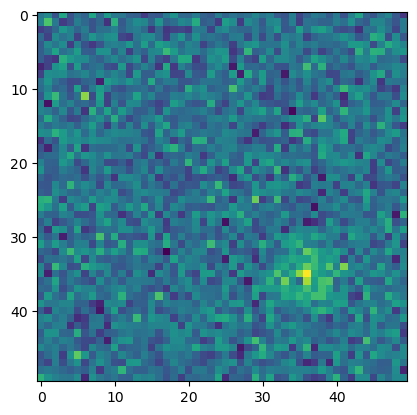

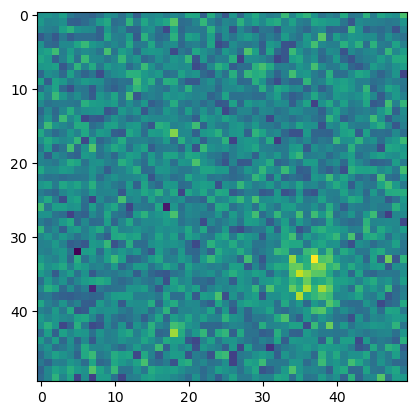

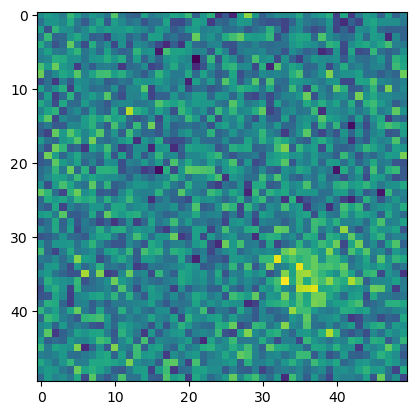

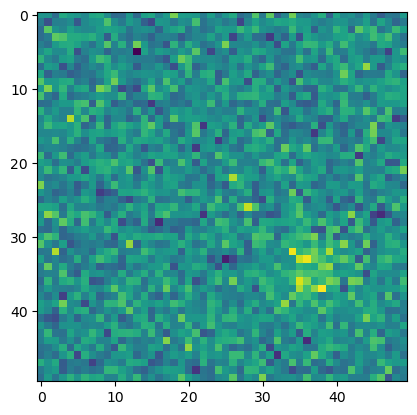

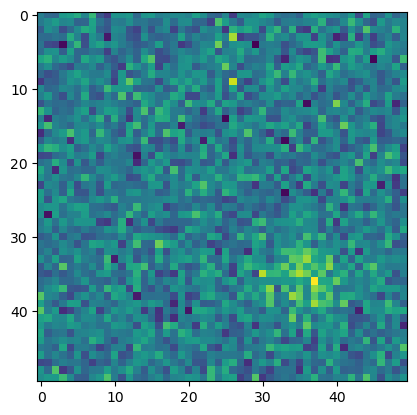

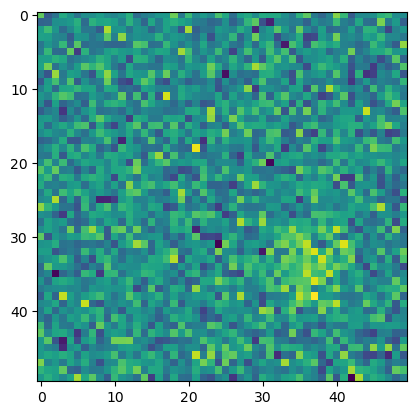

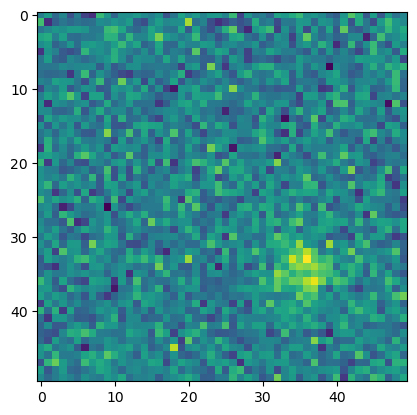

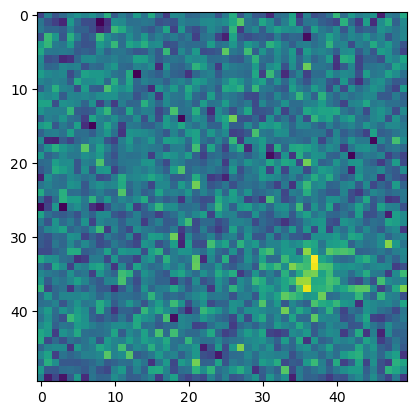

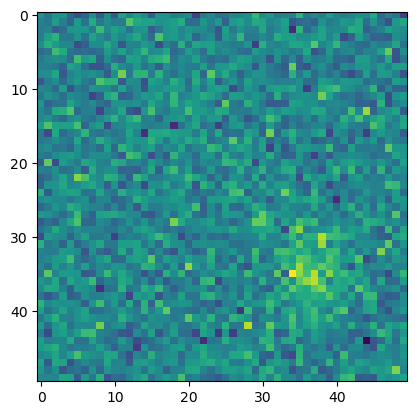

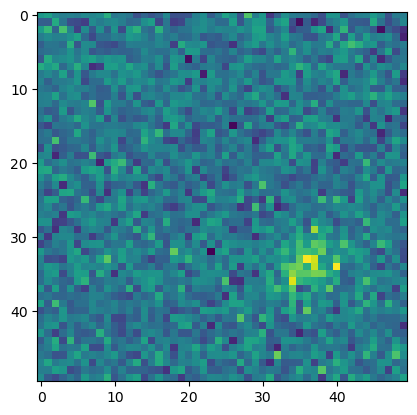

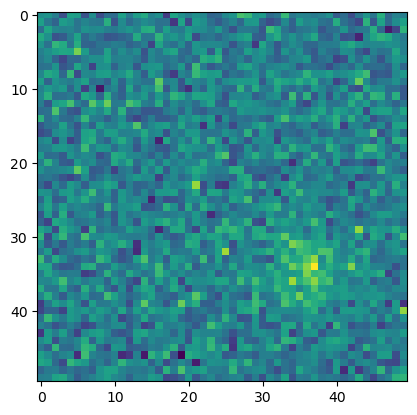

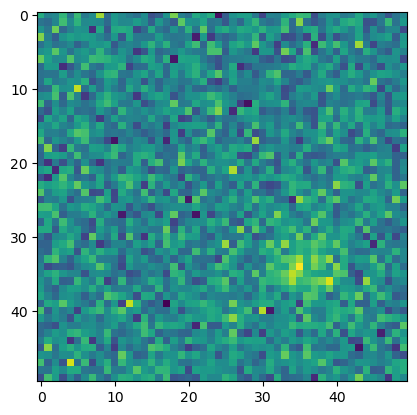

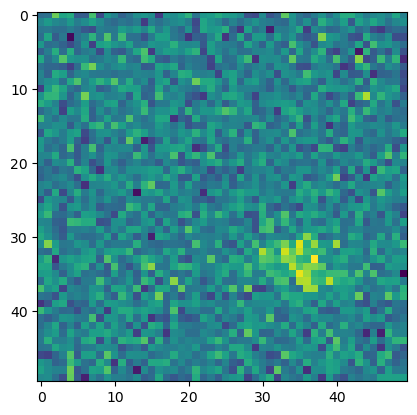

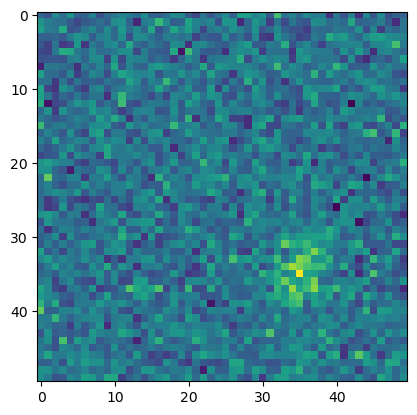

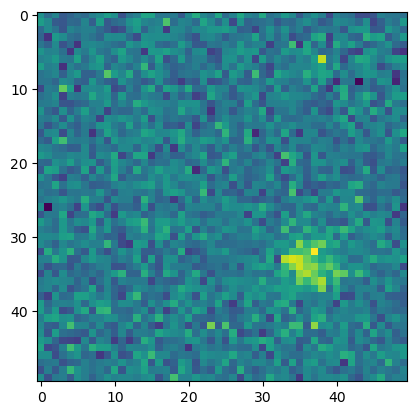

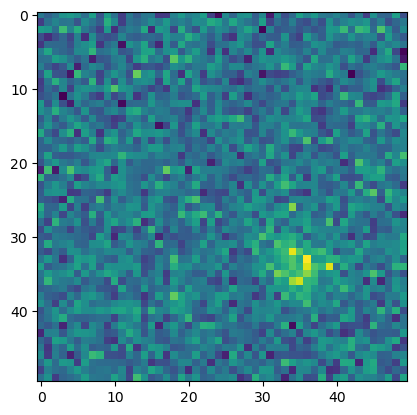

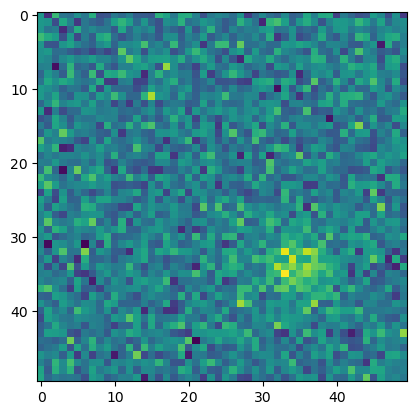

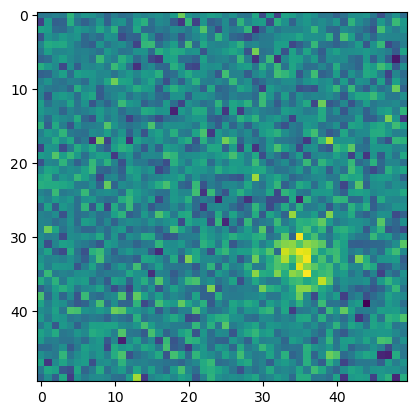

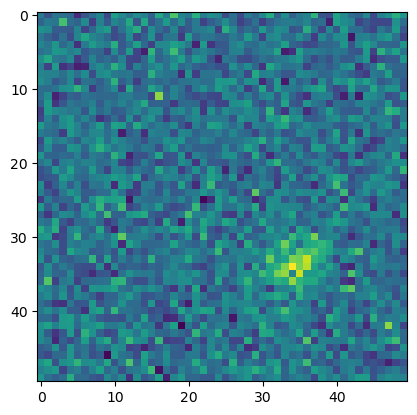

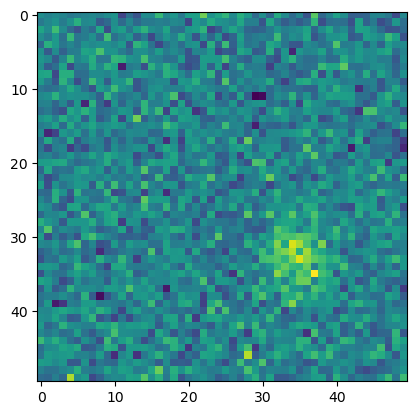

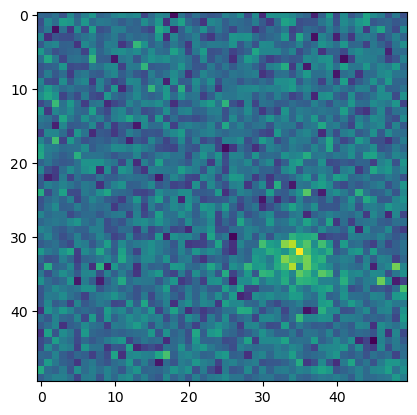

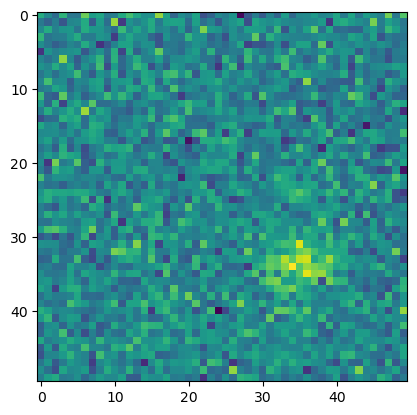

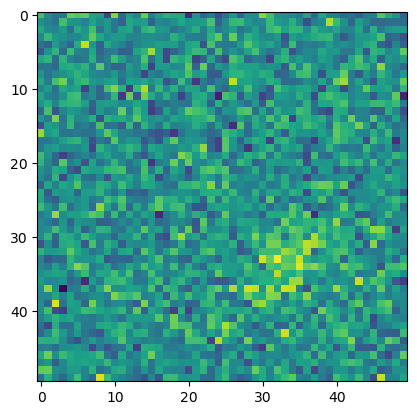

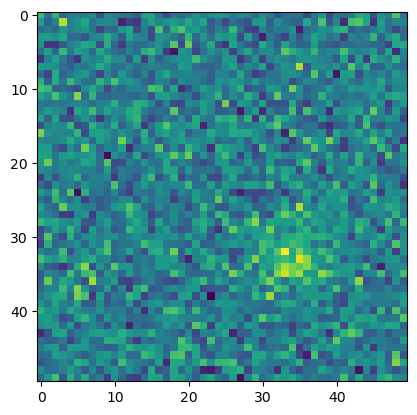

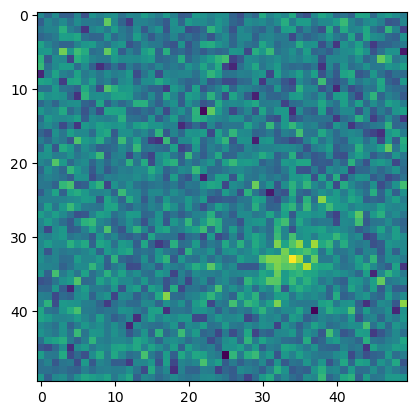

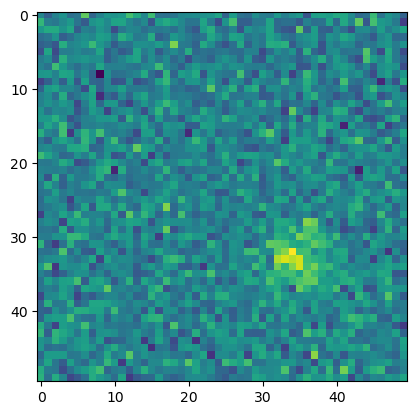

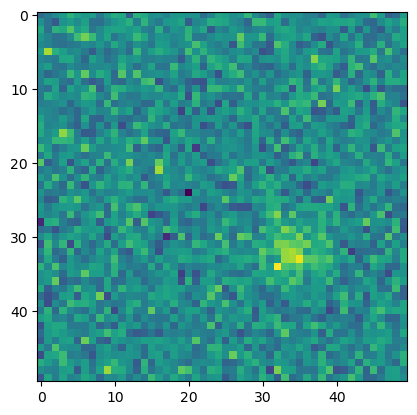

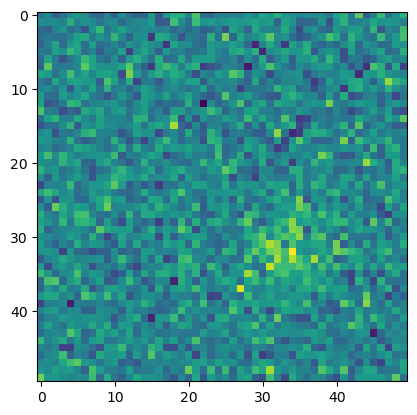

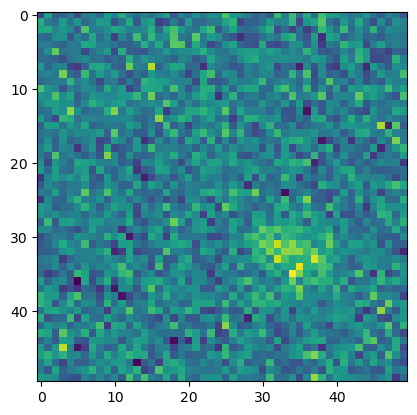

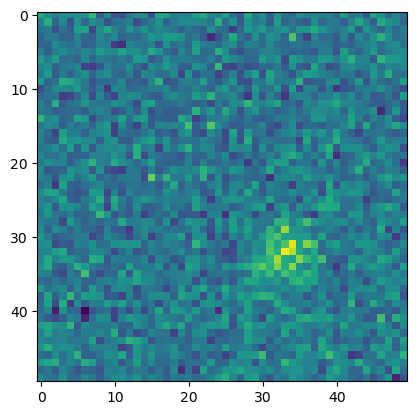

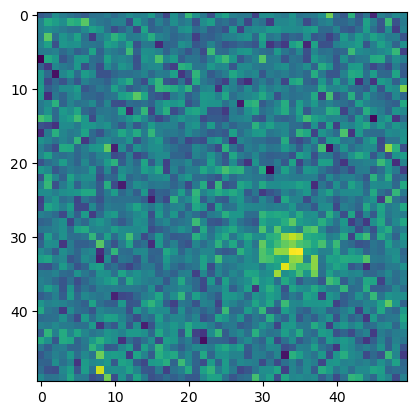

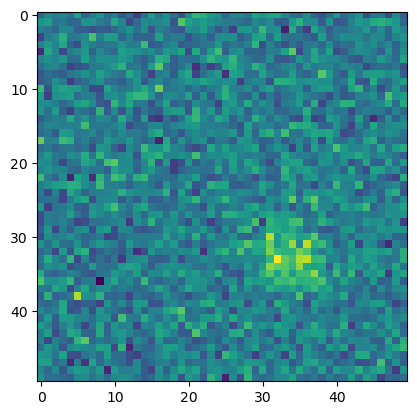

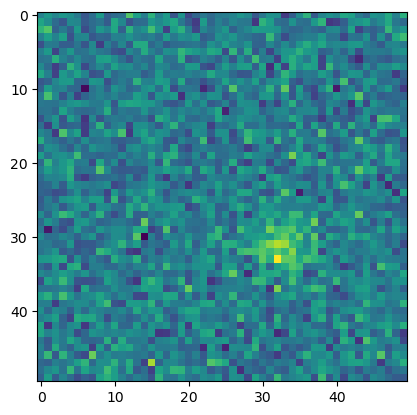

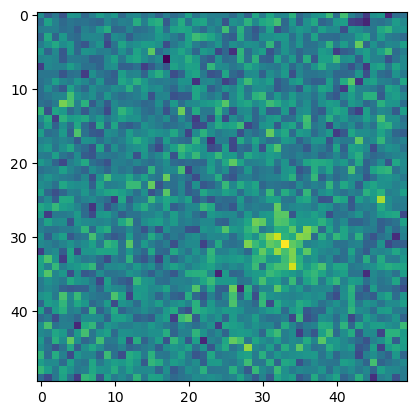

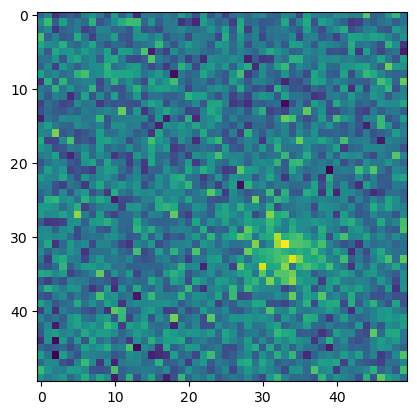

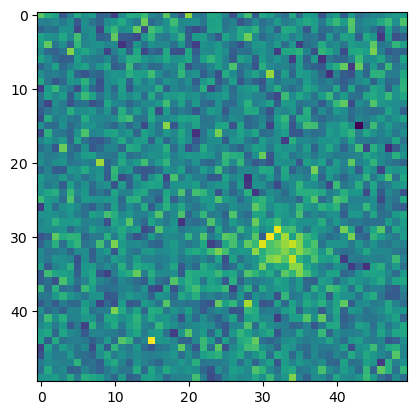

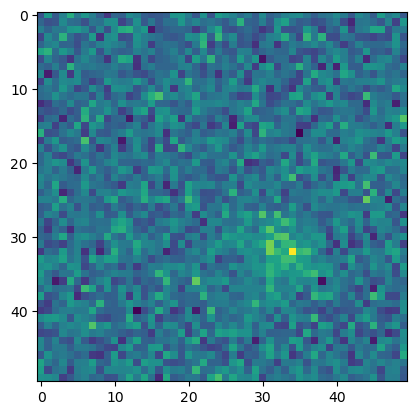

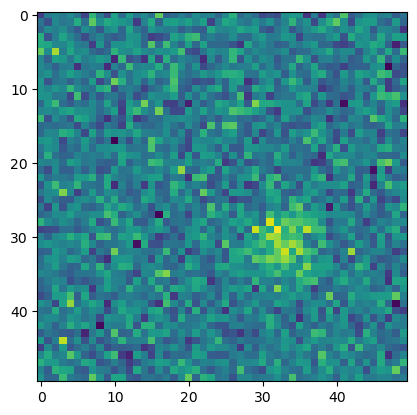

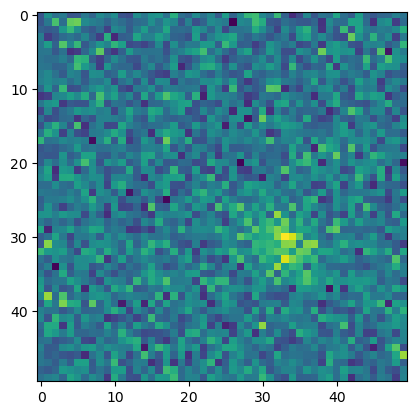

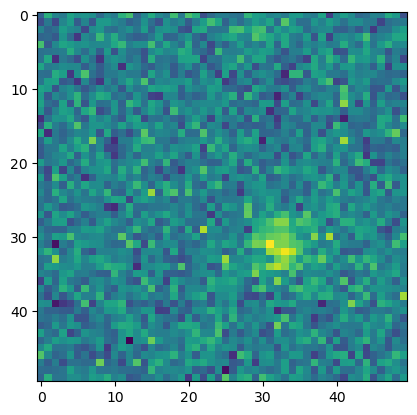

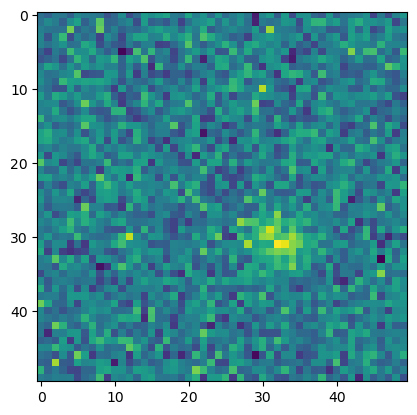

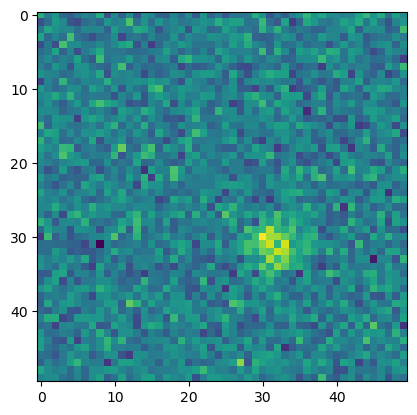

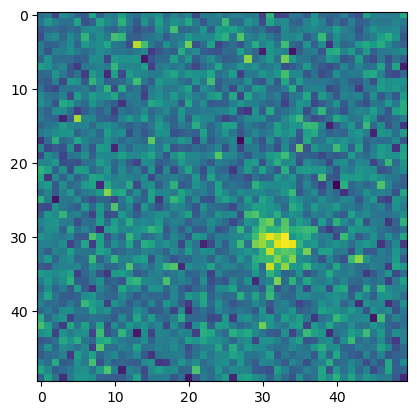

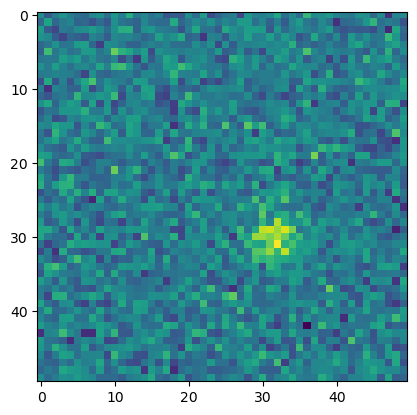

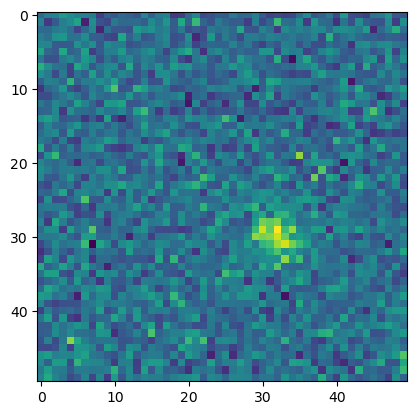

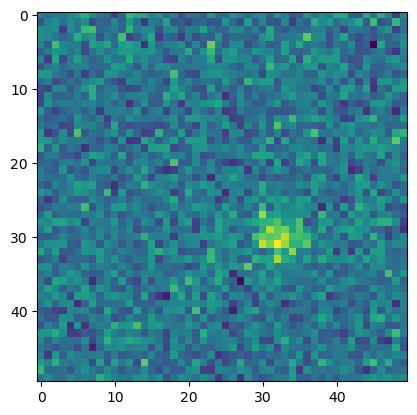

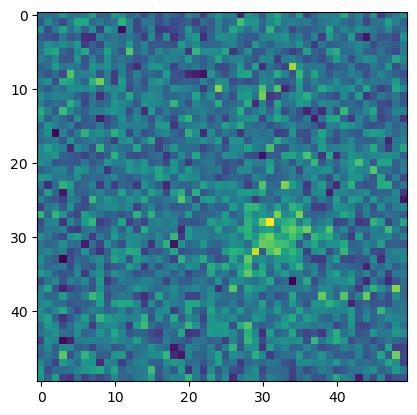

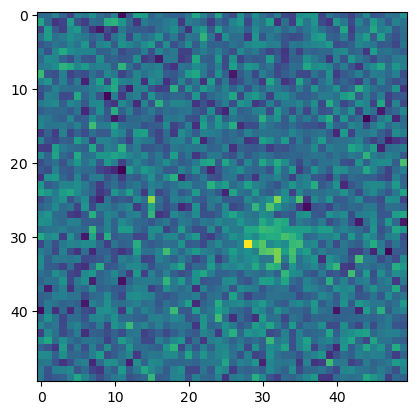

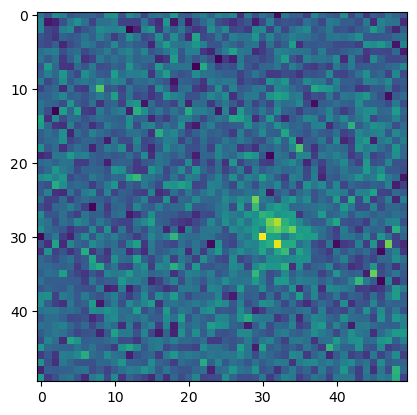

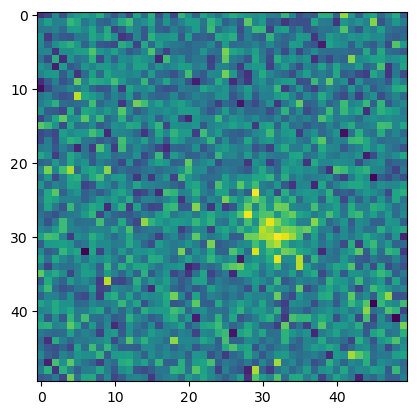

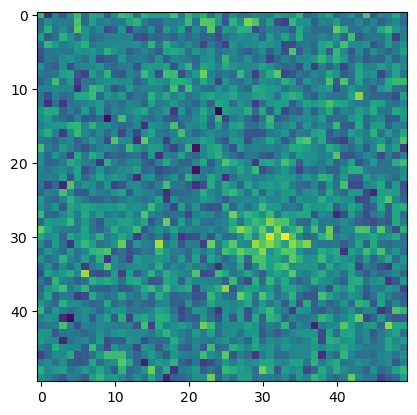

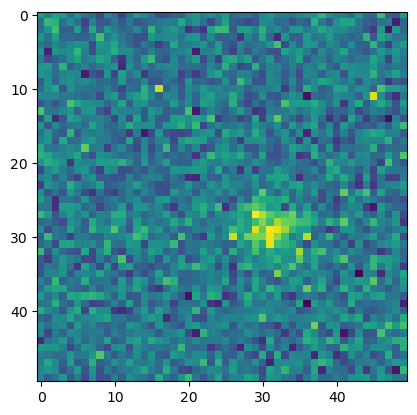

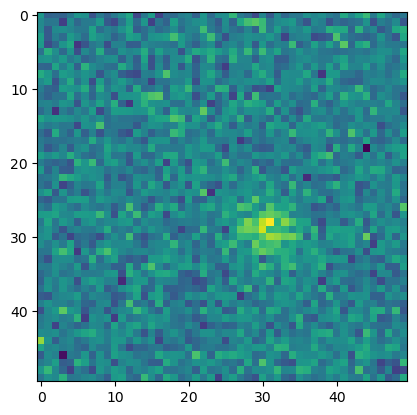

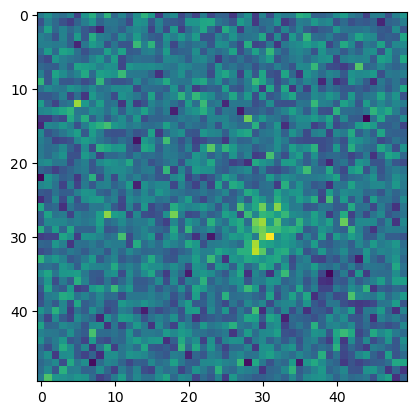

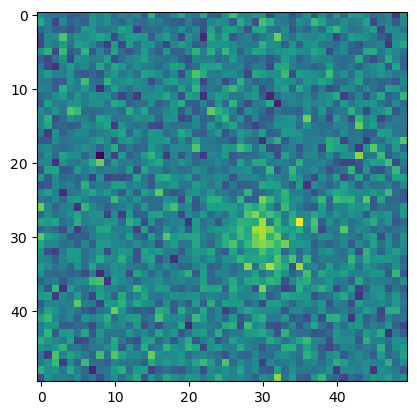

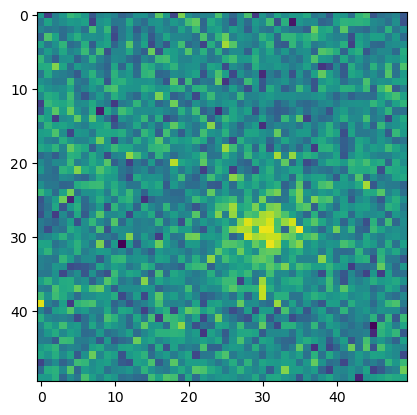

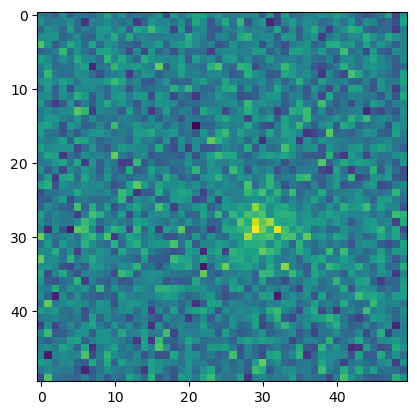

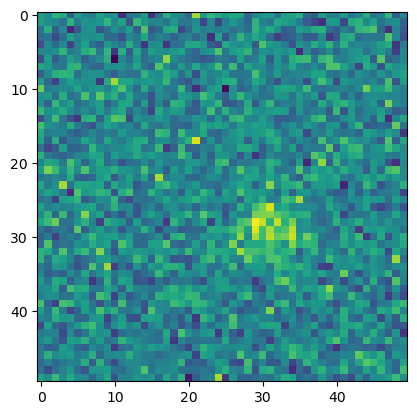

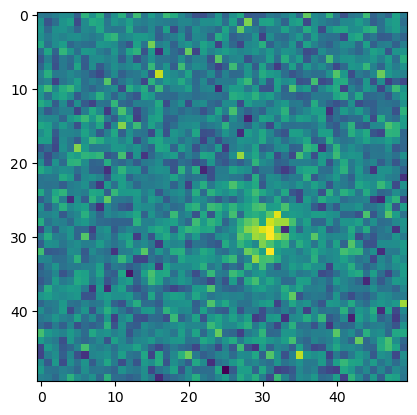

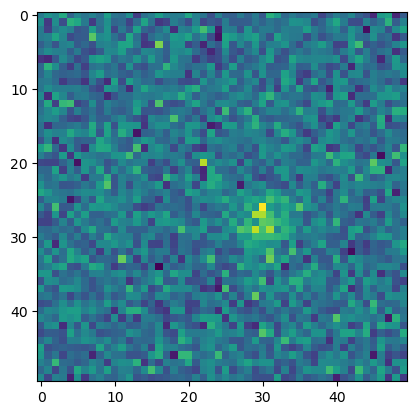

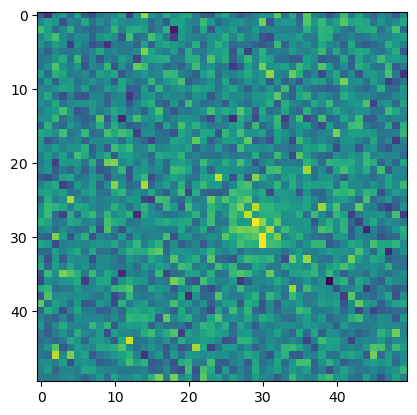

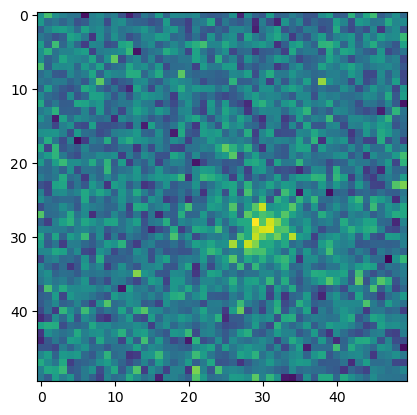

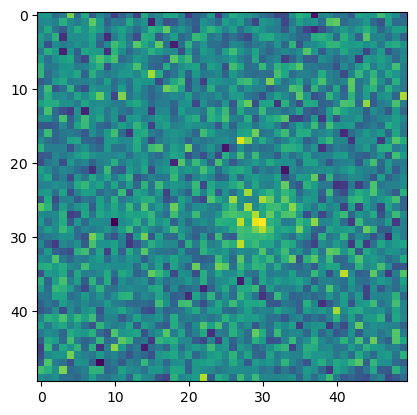

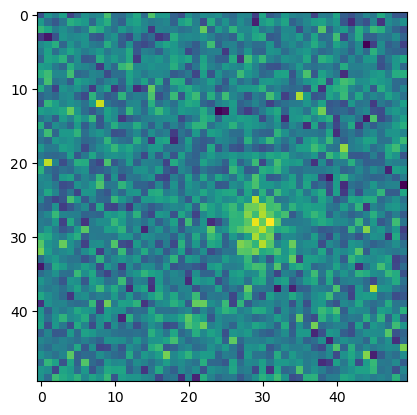

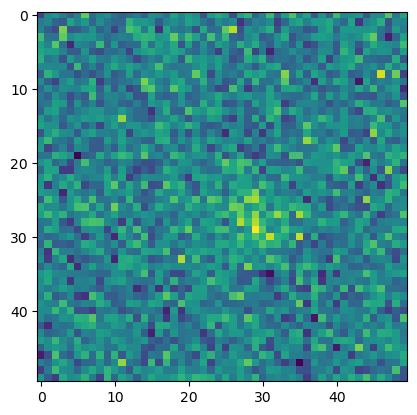

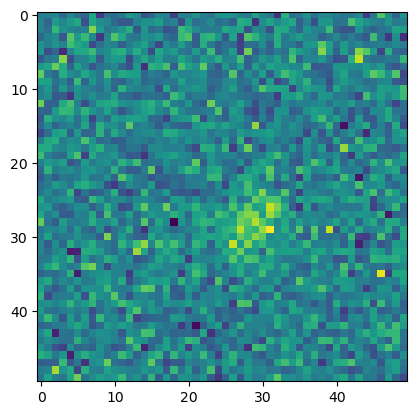

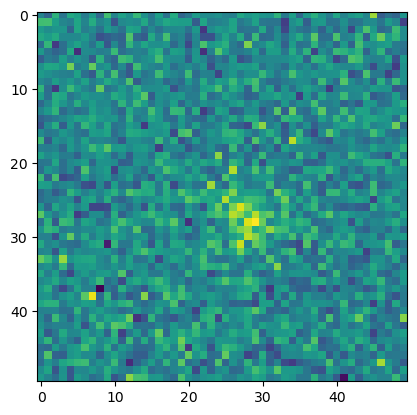

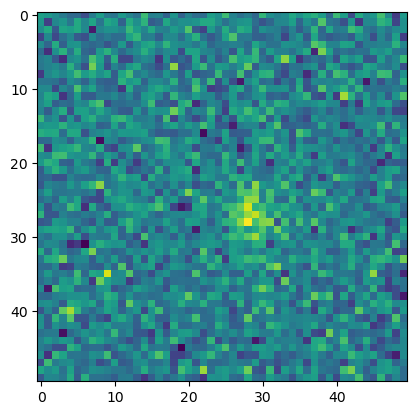

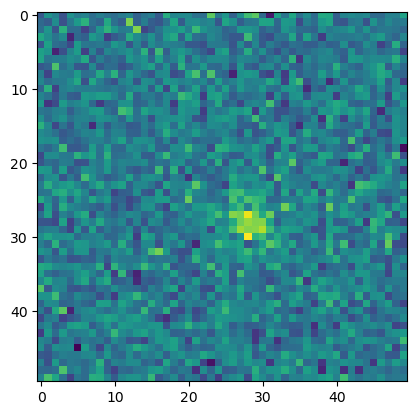

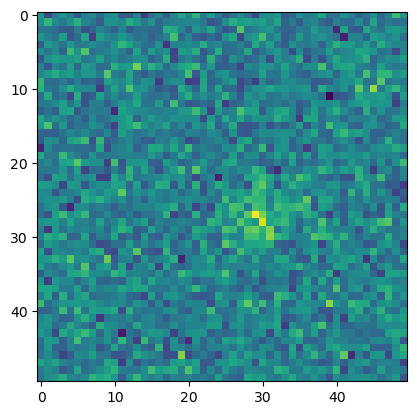

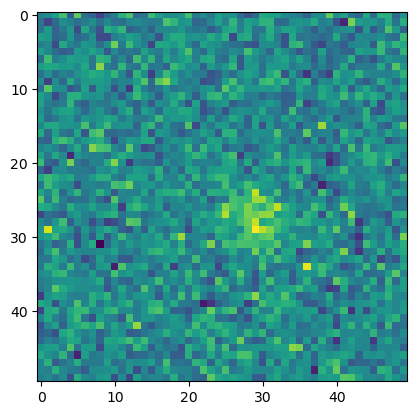

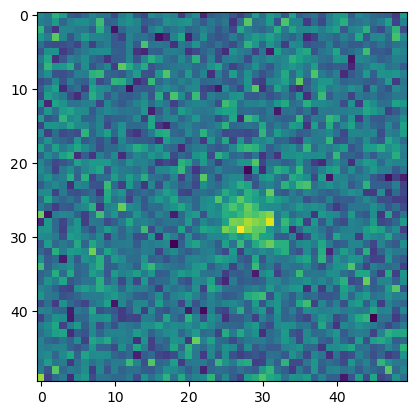

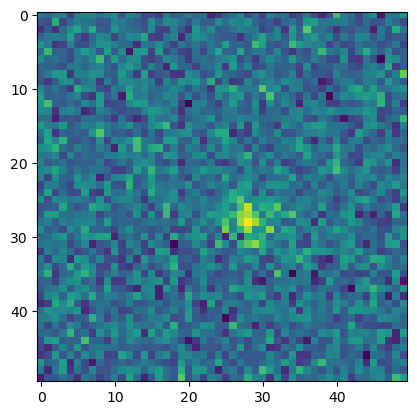

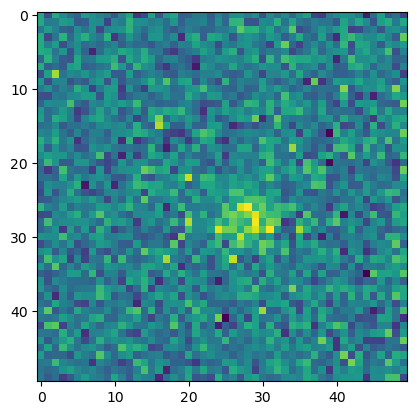

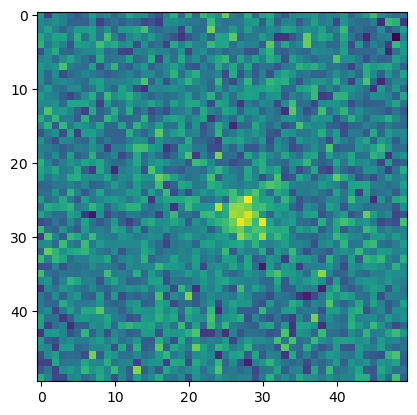

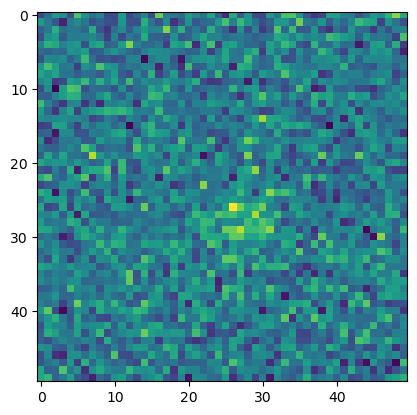

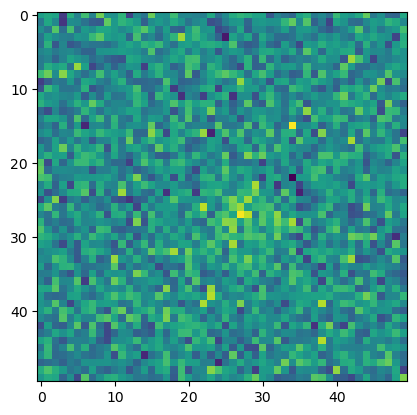

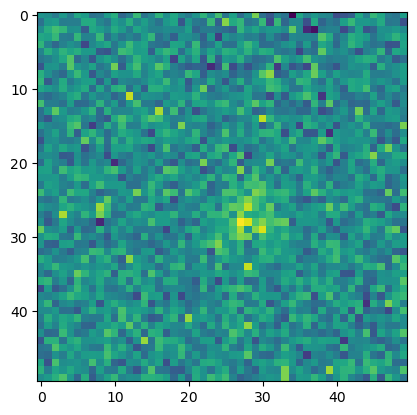

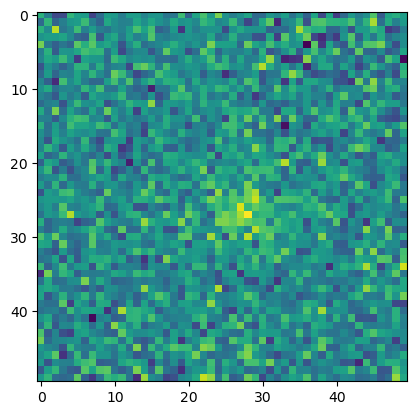

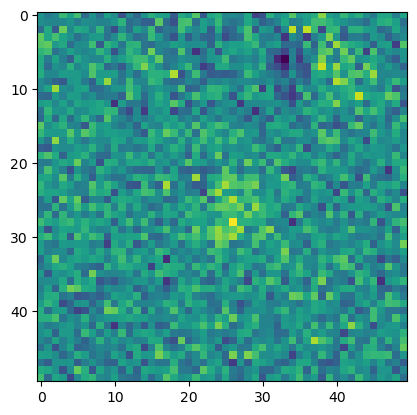

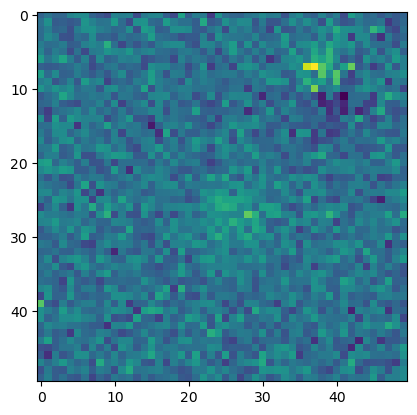

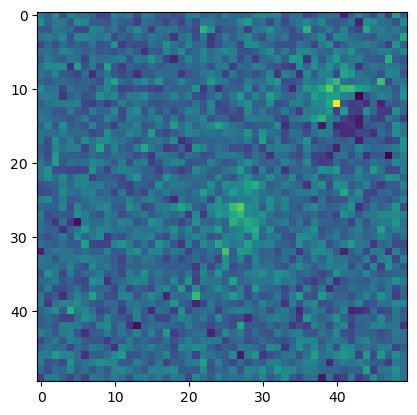

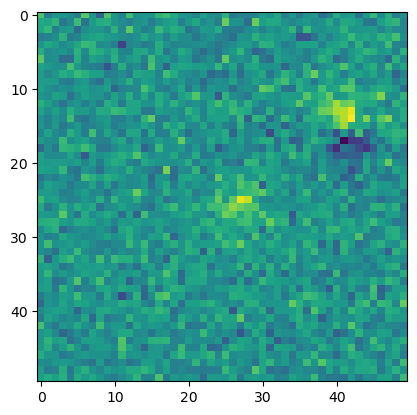

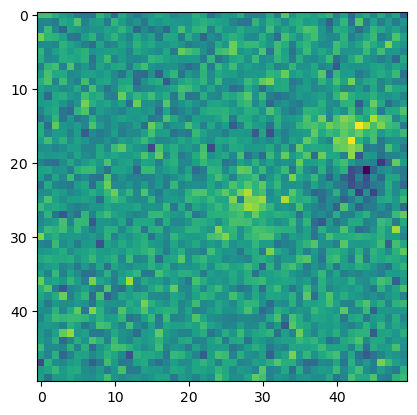

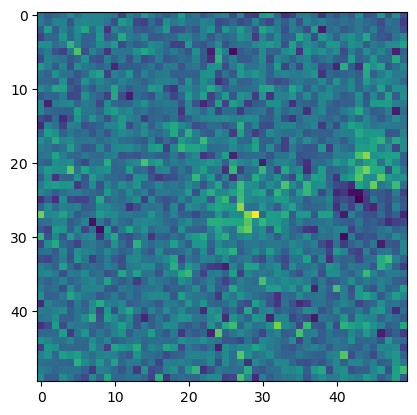

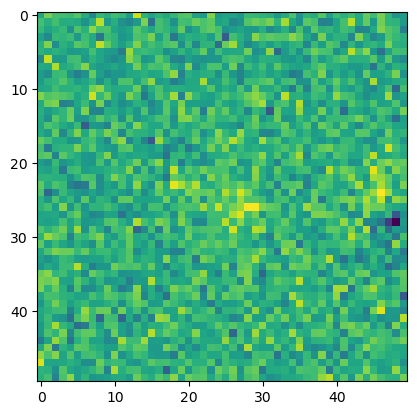

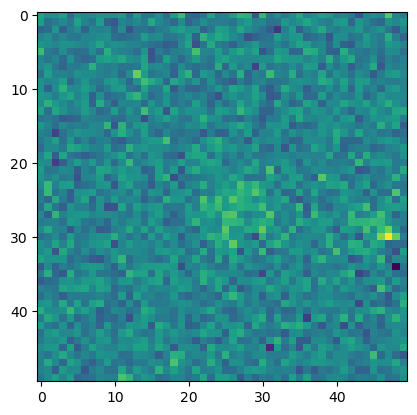

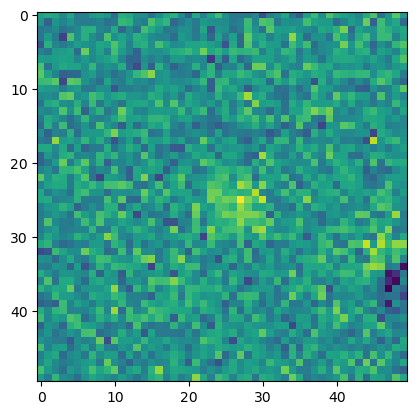

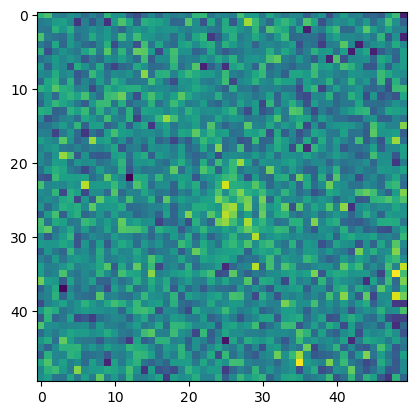

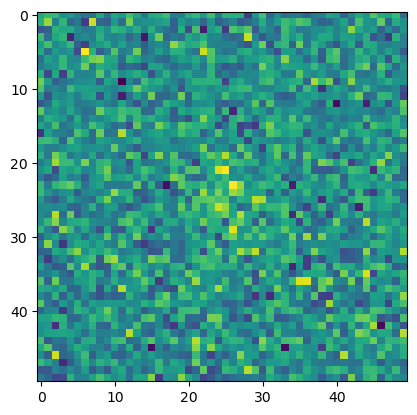

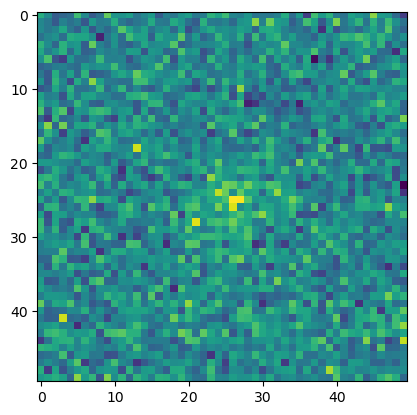

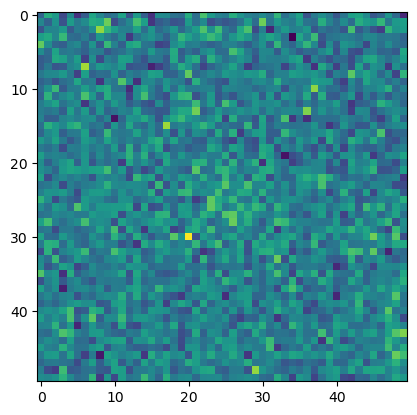

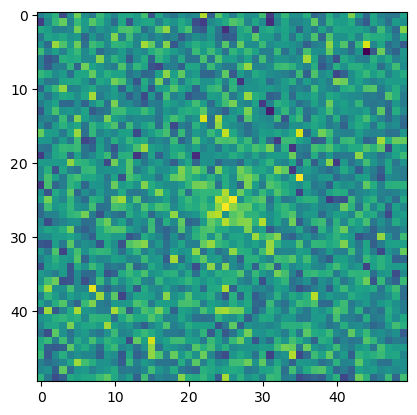

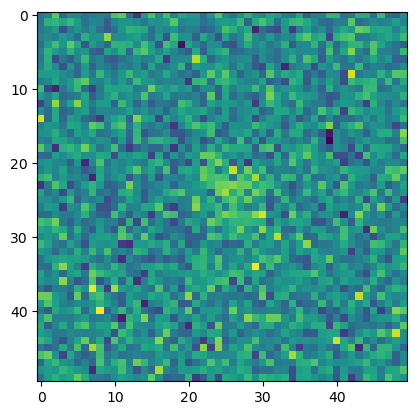

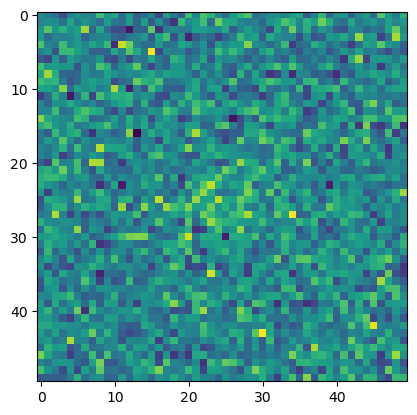

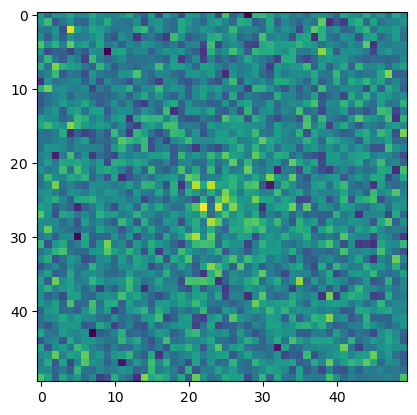

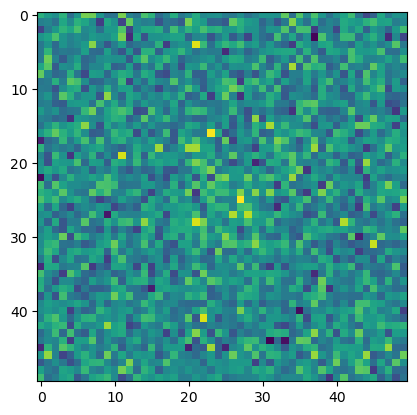

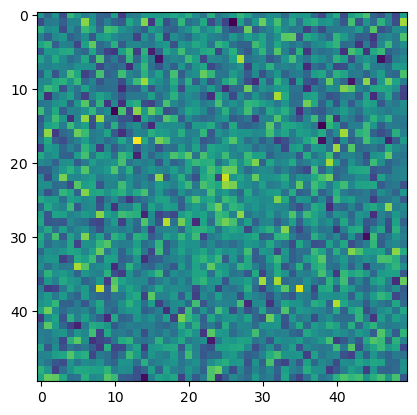

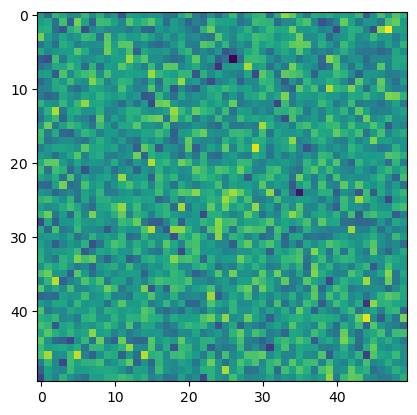

In [358]:
s = clusters[24].summary
plot_summary_coadds(s)
plt.show()
for i in s['image'][order]:
    plt.imshow(i)
    plt.show()


In [374]:
from salad.measure.fitting import logL_position
import lsst.afw.image

In [ ]:
lsst.

In [371]:
times = [i.mjd_mid for i in images]

In [373]:
clusters[24].line.predict(times * u.day)

<Quantity [[216.27081553, -11.1136681 ],
           [216.26719953, -11.11230865],
           [216.26771175, -11.11250123],
           [216.25843665, -11.10901423],
           [216.26902079, -11.11299337],
           [216.26515411, -11.11153967],
           [216.27575498, -11.1155251 ],
           [216.27158371, -11.1139569 ],
           [216.263873  , -11.11105804],
           [216.28011114, -11.11716281],
           [216.27549906, -11.11542889],
           [216.27030349, -11.1134756 ],
           [216.26049098, -11.10978656],
           [216.27473143, -11.11514029],
           [216.26822408, -11.11269384],
           [216.27805635, -11.11639031],
           [216.26438434, -11.11125028],
           [216.25504239, -11.10773815],
           [216.25792218, -11.10882081],
           [216.2552973 , -11.10783398],
           [216.2770333 , -11.11600569],
           [216.26876405, -11.11289684],
           [216.2610577 , -11.10999962],
           [216.26023232, -11.10968931],
           [216.

In [370]:
clusters[24].centers

{845908: Point2D(1666.8962581497112, 3849.946232075964),
 845922: Point2D(1667.9446098167662, 3794.311656714196),
 845920: Point2D(1672.4944974650973, 3802.1577149502127),
 845956: Point2D(1650.1115844490132, 3692.886500927304),
 845915: Point2D(1658.8464591605652, 3846.2527275412376),
 845930: Point2D(1661.0825140108764, 3780.9893683621149),
 845889: Point2D(1688.0199215446696, 3911.4124351584173),
 845905: Point2D(1680.765211404861, 3863.4559864849207),
 845935: Point2D(1660.9218858219056, 3778.911159618362),
 845872: Point2D(1716.0668346047687, 3941.7749118345),
 845890: Point2D(1684.2842247288086, 3905.9776759897363),
 845910: Point2D(1667.2766239221282, 3848.1436512977366),
 845948: Point2D(1639.1151946199154, 3738.5679941068156),
 845893: Point2D(1675.2302805356062, 3902.899964819866),
 845918: Point2D(1673.031094058819, 3812.8912686295071),
 845880: Point2D(1698.926313557891, 3931.2788612481036),
 845933: Point2D(1660.3808457346554, 3777.1163796476367),
 845969: Point2D(1612.266

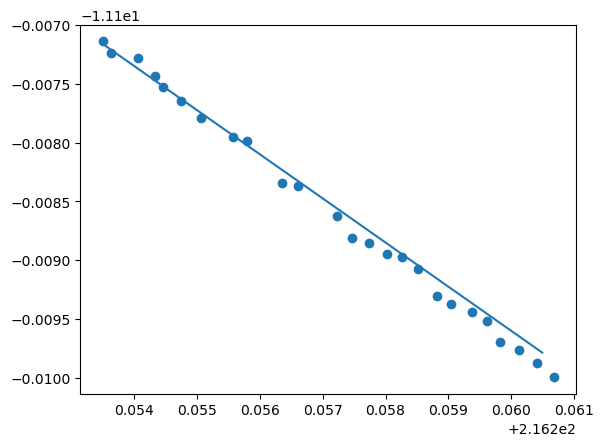

In [366]:
from astropy.coordinates import SkyCoord

def plot_result(result, x, **kwargs):
    _x = np.linspace(x.min(), x.max(), 100)[:, None]
    if hasattr(result.alpha, "unit"):
        _x *= result.alpha.unit / result.beta.unit
        
    _y = _x @ result.beta + result.alpha
    if not hasattr(result.alpha, "unit"):
        _y *= u.deg
    
    coord = (SkyCoord(_y[:, 0], _y[:, 1]))
    plt.plot(coord.ra, coord.dec, **kwargs)

plot_cluster(clusters[24])
plot_result(clusters[24].extra['result'], clusters[24].points[:, 2])

In [309]:
clusters[15].extra['result'].outliers_r.shape

(20,)

In [314]:
refine(clusters[15])['result'].outliers_x.shape

(20,)

In [315]:
from salad.regression import regression

In [322]:
regression(clusters[15].points[:, 2][:, None], clusters[15].points[:, :2])

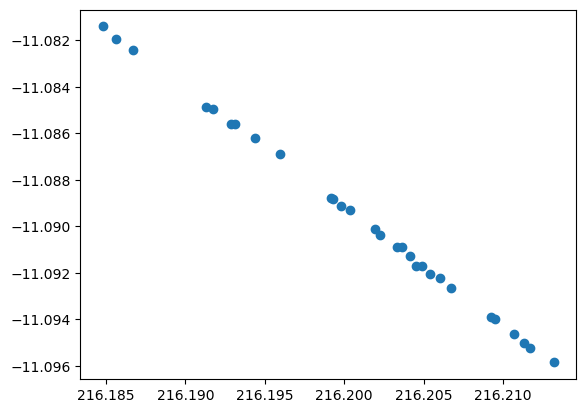

In [305]:
plot_cluster(clusters[15])

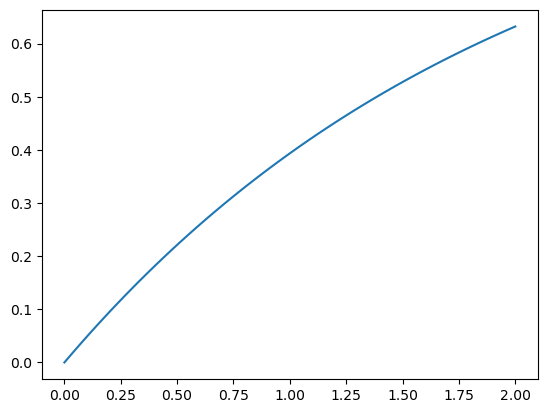

In [150]:
from scipy.stats import chi2

dx = 1


x = np.array([0, dx])
md = (mean - x).T @ np.linalg.inv(cov) @ (mean - x) # mahalanobis distance
# dx**2 / sigma_x**2
x = np.linspace(0, 2, 100)
prob_inside = chi2(2).cdf(x) # probability to get a point that is this far away
plt.plot(x, prob_inside)
plt.show()